# This notebook contains the Stacks parameter tests, final scripts used and analyses to identify sex linked markers for the ddRADseq dataset of <i>Rana iberica</i> 
## Sample set:

This sample set is big and consists of several populations across Iberia.

<b>Portugal</b>

Population <b>"Ript"</b> - Pouço da Gola. 40.607905, -8.201109
    - 17 samples, 11 Male, 6 female
  

<b>Spain</b>

Population <b>"Stn"</b> - Rib_Santianes, Tejido. 43.597706, -6.095901
    - 30 samples, 14 males, 16 females
   
Population <b>"Lv"</b> - Llovio, Tejido, 43.439916, -5.055578
    - 17 samples, 11 males, 6 females

Population <b>"Str"</b> - SanTirso, Tejido, 43.305495, -5.758295
    - 10 samples, 6 males, 4 females

Population <b>"Cv"</b> - Covaenes, Tejido (can't find on map)
    - 4 samples, 2 males, 2 females
   
Population <b>"Zd"</b> - Zardón, Tejido, 43.511444, -5.023540
    - 3 samples, 2 males, 1 females

<b>Spainish family</b>

Population - "Fam" - Unknown Northern Spain location
    - 2 parents, 62 offspring. 





In [1]:
%matplotlib inline
from __future__ import division
import os
import Incremental_U as IncU 
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [2]:
%load_ext rpy2.ipython

In [11]:
%%R
library(maps)
library(mapplots)
library(mapdata)
library(calibrate)

/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: MASS

  warnings.warn(x, RRuntimeWarning)


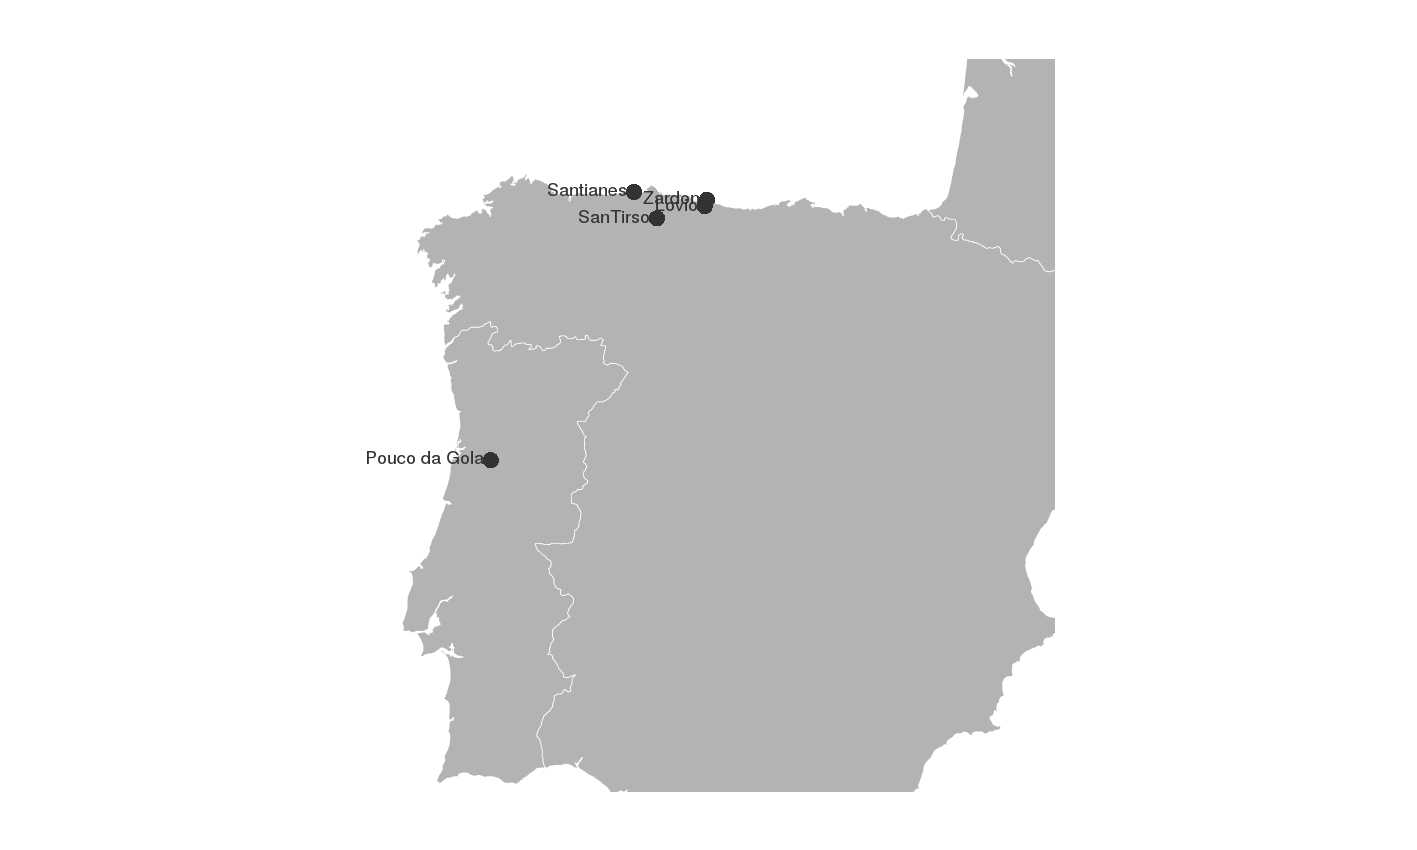

In [25]:
%%R -w 50 -h30 -u cm


map("worldHires", xlim = c(-10, 0), ylim = c(37, 45), col="gray70", fill=TRUE, border = "white")

coords <- read.delim("/home/djeffrie/Data/RADseq/Riberica/Stacks/sample_info/Sample_coordinates.txt", header = F)

names(coords) = c("Pop", "lat", "long")

points(coords$long, coords$lat, pch = 16, col = "grey20", cex = 3)
textxy(coords$lon, coords$lat, coords$Pop, col = 'grey20',  pos = 2, cex = 1.5)



So there is a little spread in the populations in northern Spain, There is about 100km between Santianes and Lovio/Zardon. And around 600 Km between the Spanish populations and the Portuguese populations. 

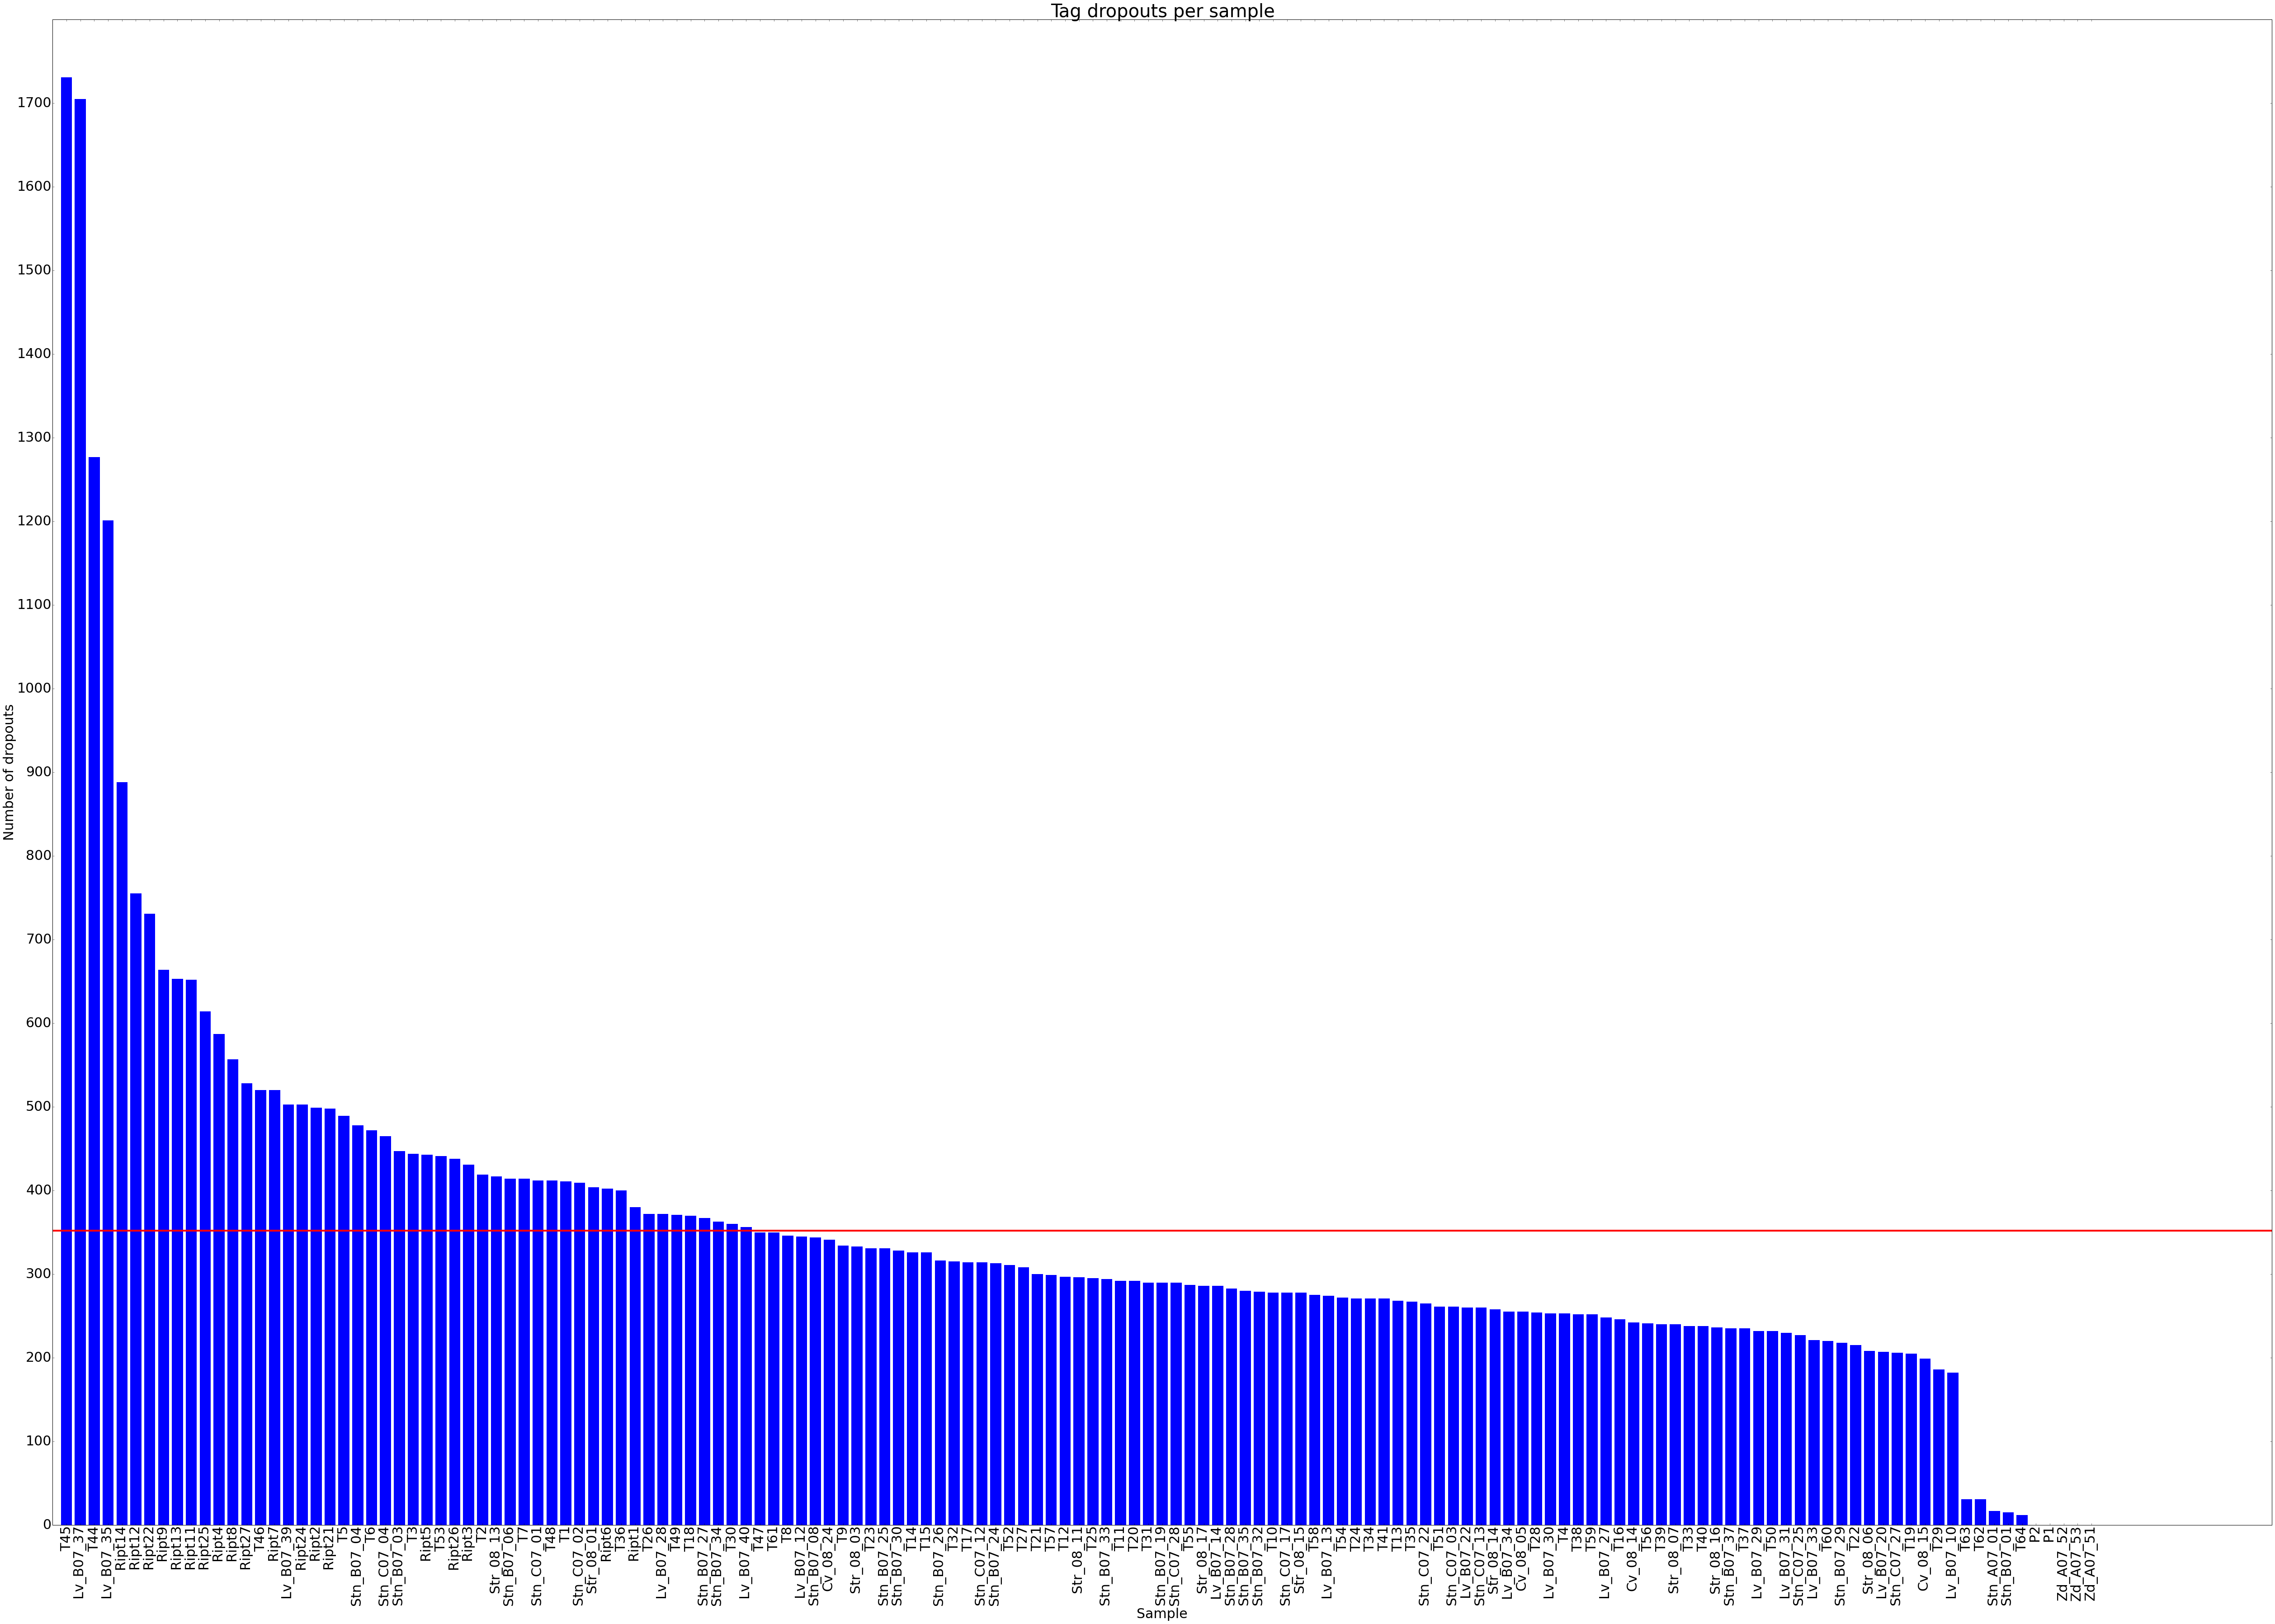

Outputs written to:
/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all//blacklist.txt


In [93]:
wd = "/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

So a couple of bad samples, but still very few dropouts and only two bad samples are unlikely to have a big impact on the number of loci. Continue as is for now. 

### Now run a PCA to look at the structure in the data . . . 

In [106]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all  ## just change this line

## All data 
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/batch_1.vcf > /home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all/batch_1_altered_adegenet.vcf




shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Error: File read failure.


In [107]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks/Populations_all") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("../popmap.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



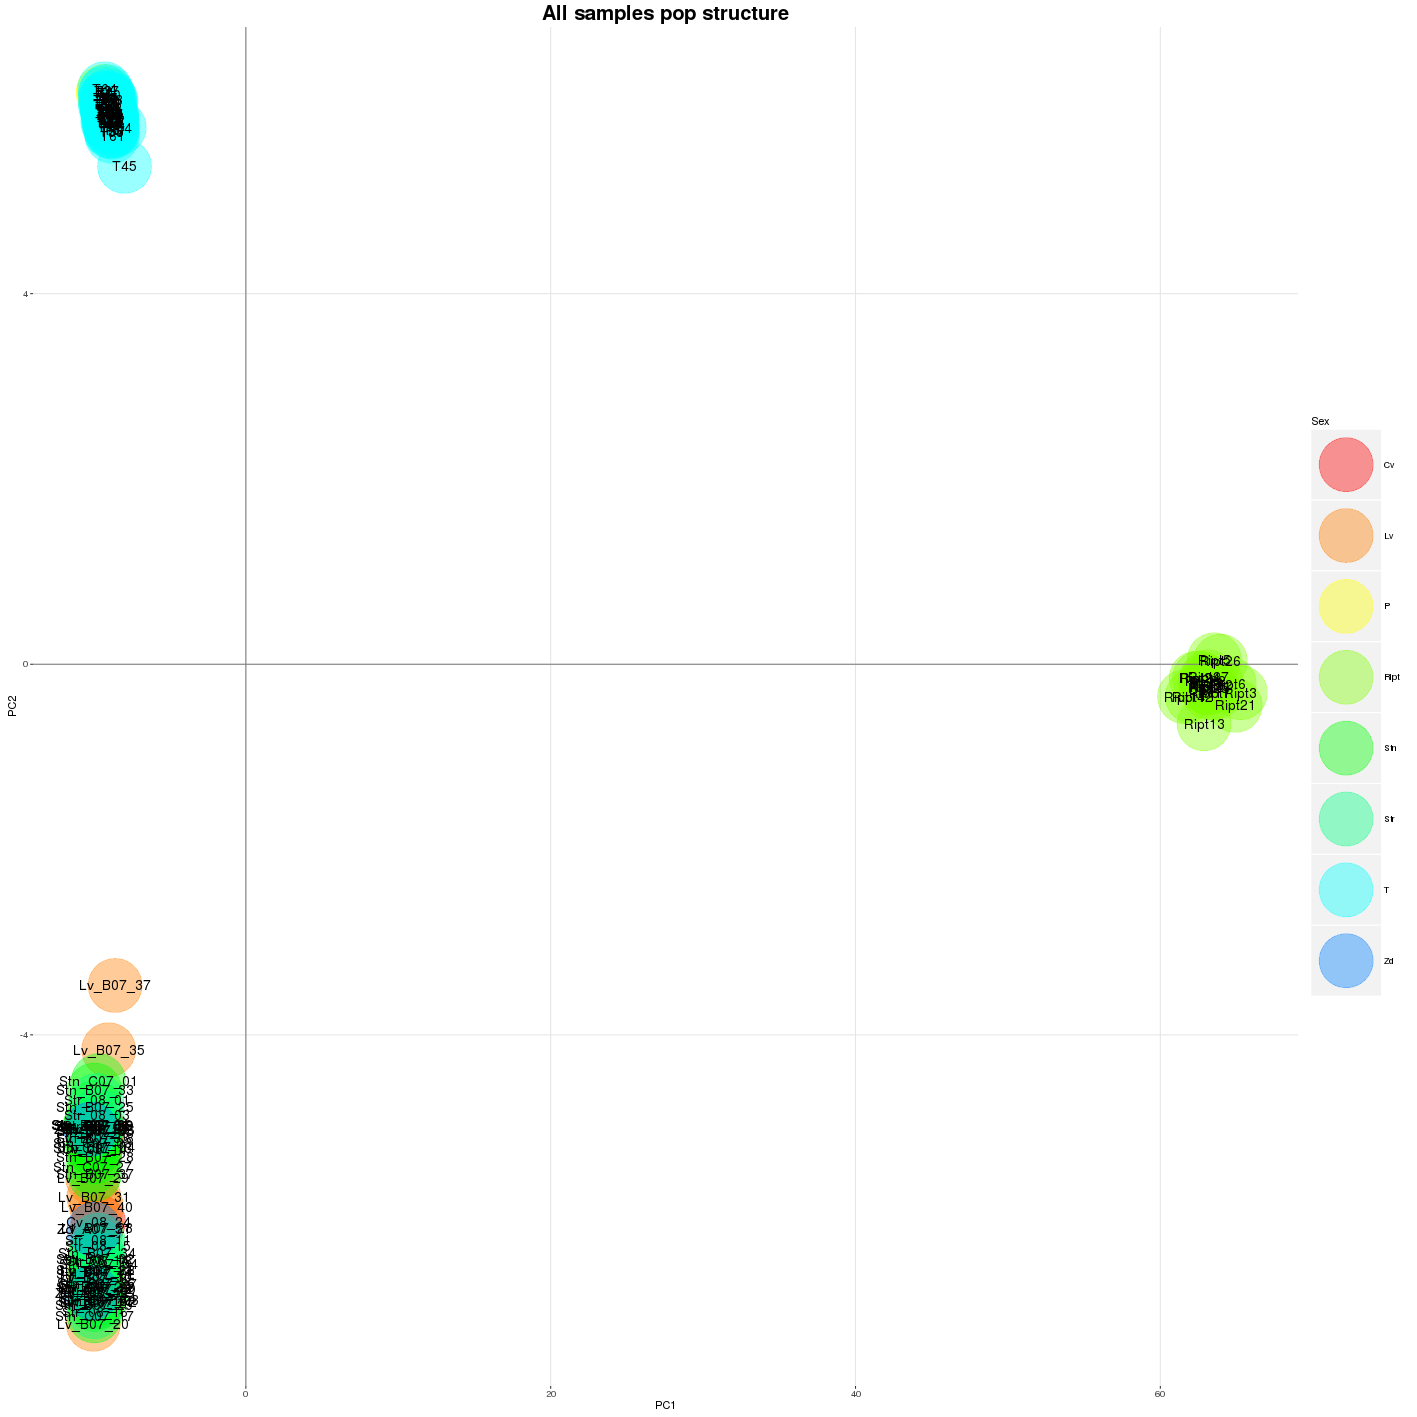

In [108]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "All samples pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

So there is, as expected, a lot of structure bettween northern Spain and Portugal. The family is somewhat separate from the rest of northern spain, but still a lot closer than the Portuguese pop. 

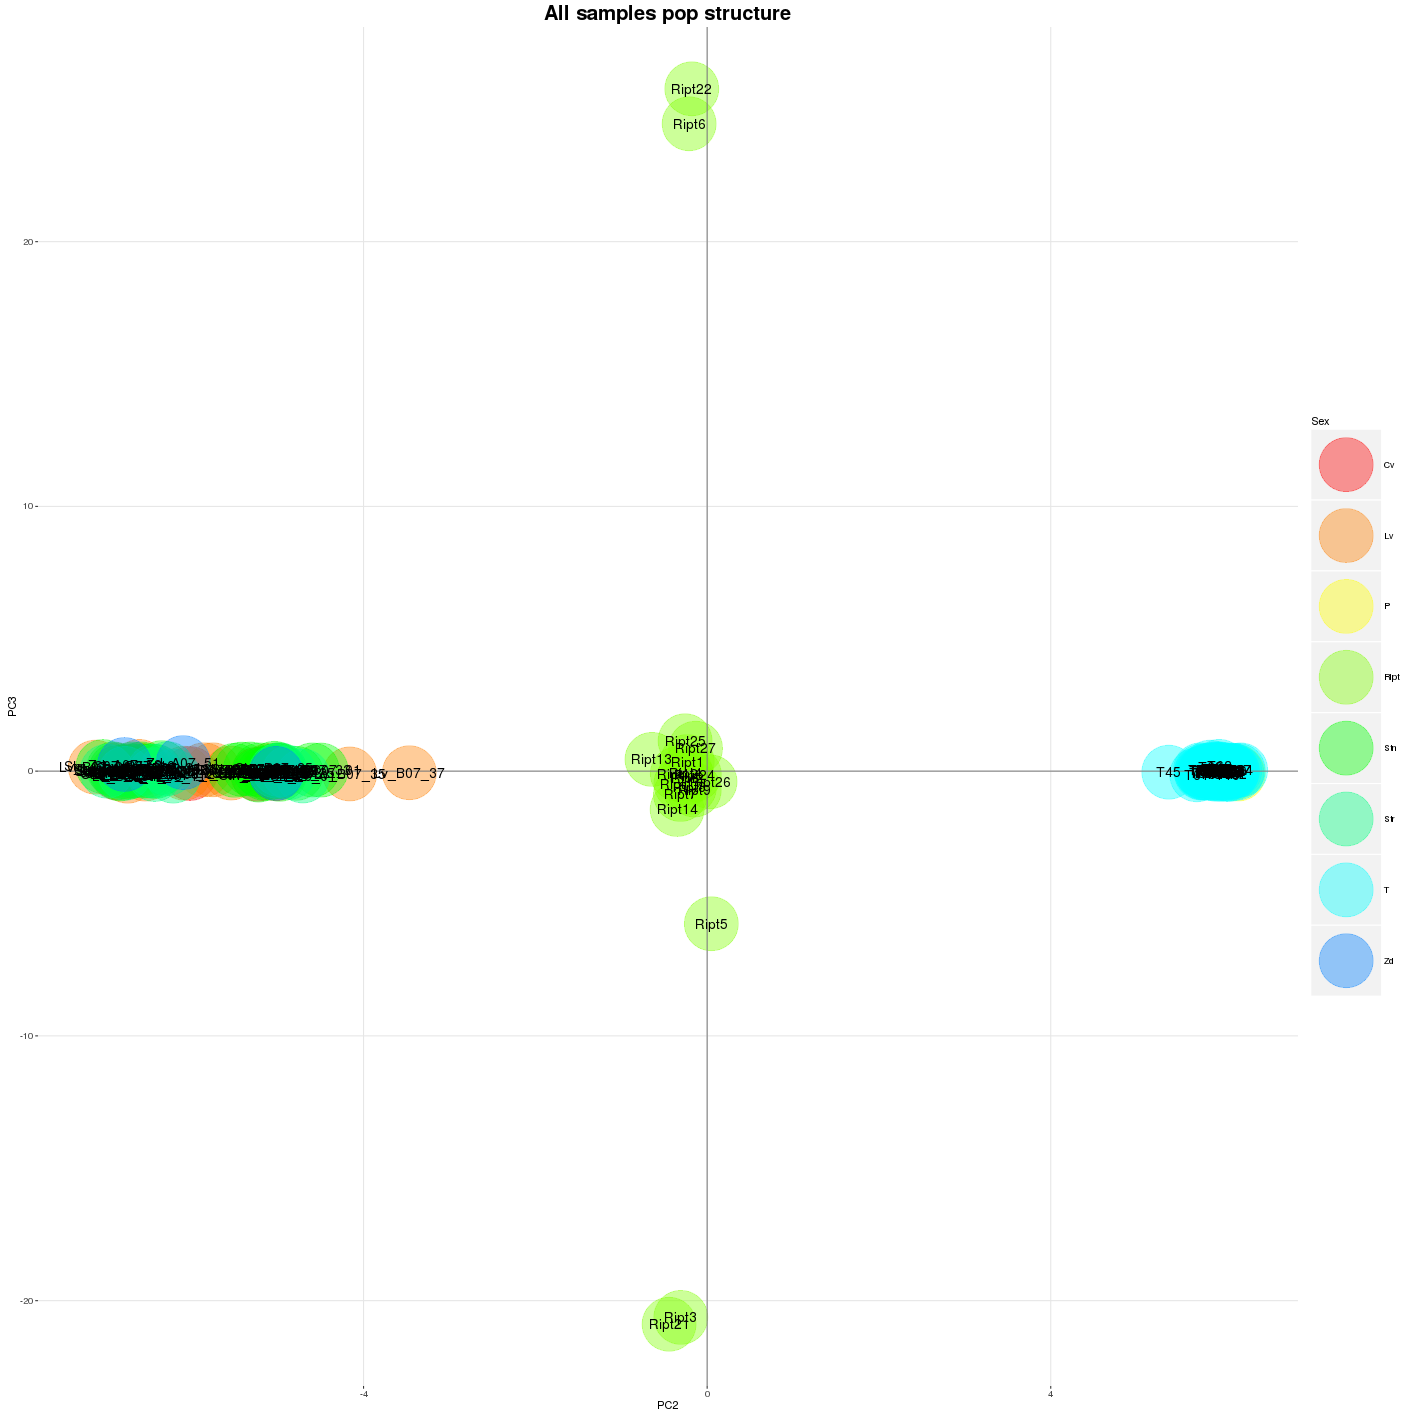

In [110]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(2,3), ## which components to plot
           Title = "All samples pop structure", ## plot title
           xtitle = "PC2", ## X axis title
           ytitle = "PC3", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

So there is structure, there seems to be quite a bit in the portuguese population too.

Now I will look at the amount of structure in just the northen Spanish populations without the family.

In [17]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 4k variants complete.
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//batch_1_altered_adegenet_

In [20]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_N_spain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



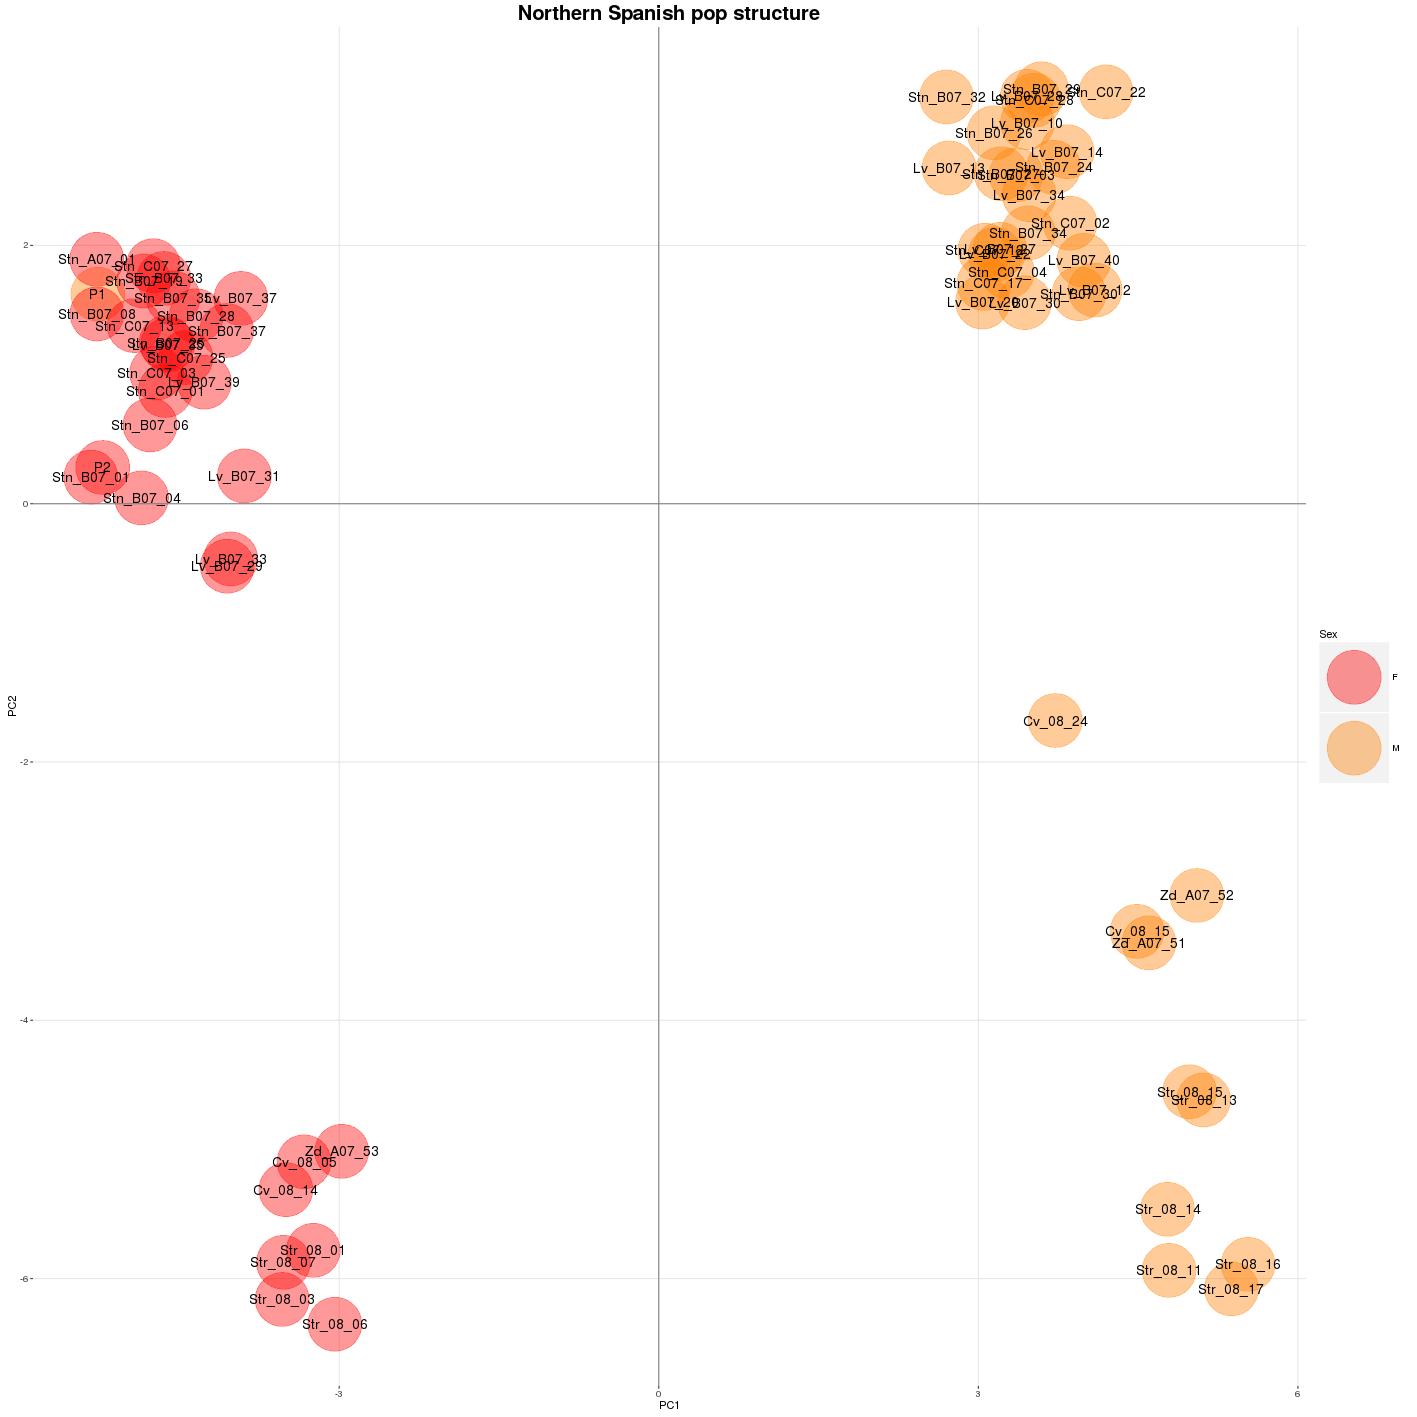

In [21]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "Northern Spanish pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

So there is already male and female signal here. Although the Male and female in the family both cluster with the females of the rest of northern Spain. . . . this is interesting, come back to this later. 

Lets take a look on the heatmap

In [22]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_altered_adegenet_plink.raw  $wd/batch_1_heatmap_input


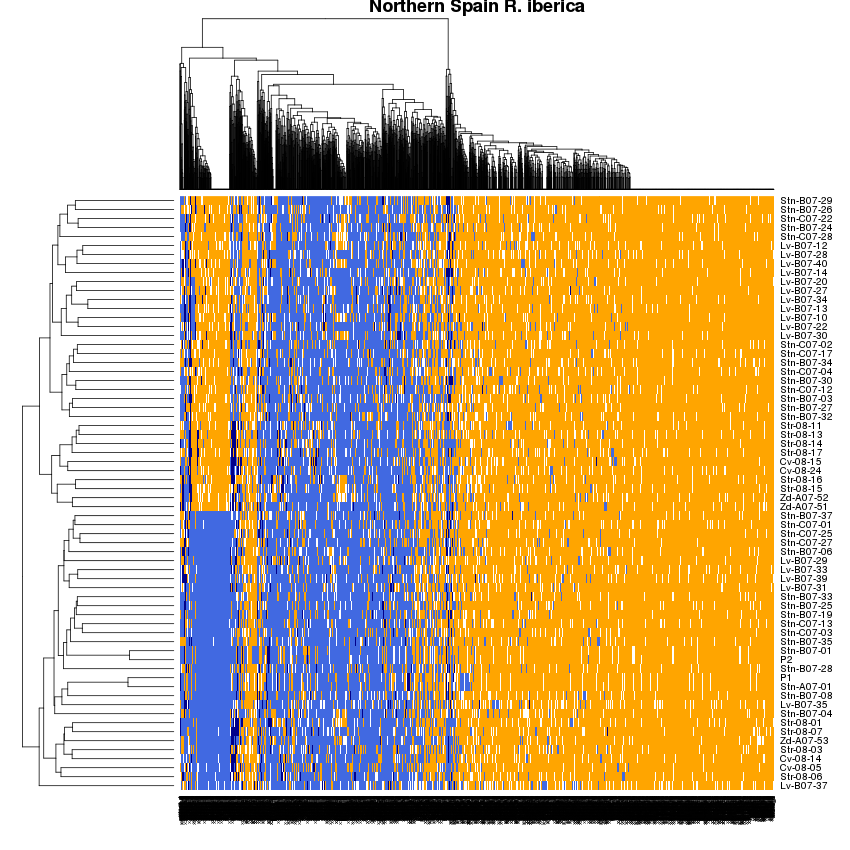

In [23]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


So there is a worrying about of loci that are heterozygous at all samples. This is indicative of over merging paralogs in the Stacks pipeline. Here it is not so important as the sex linked loci will not be affected and can clearly be seen even before testing for them. However, it would be interesting to know the cause. Perhaps it is transposons, and just by chance there is an active family with RAD sites in it and these were kept in the library. This could be these bands we see in the size selection. 

### Finding sex linked markers


### Northern Spanish populations first (with parents from family)

Number of tags =  4122
Average tag coverage 24.2919037537 (+- 19.5006010318 )


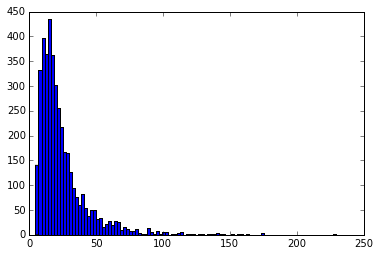

In [1]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [46]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/Sex_ID_info_N_spain.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 4122
Number of samples = 66
Number of loci with too few samples = 555
Number of loci with low MAF = 0
Number of loci with enough data = 3566
Number of putative X linked snps = 196
Number of putative X linked tags = 196
Number of putative Z linked markers = 4
Number of putative Z linked tags = 4


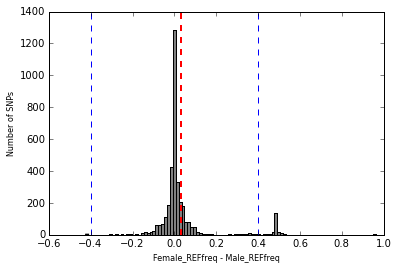


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 4122
Number of samples = 66
Number of loci with too few samples = 555
Number of loci with low MAF = 0
Number of loci with enough data = 3566
Number of putative X linked snps = 220
Number of putative X linked tags = 220
Number of putative Z linked markers = 4
Number of putative Z linked tags = 4

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 30
Number of males: 36
Number of Putative Y linked tags: 304
Number of Putative W linked tags: 1

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd

 ## After merging tags accross methods ## 

Final number of XY tags = 527
Final number of ZW tags = 5


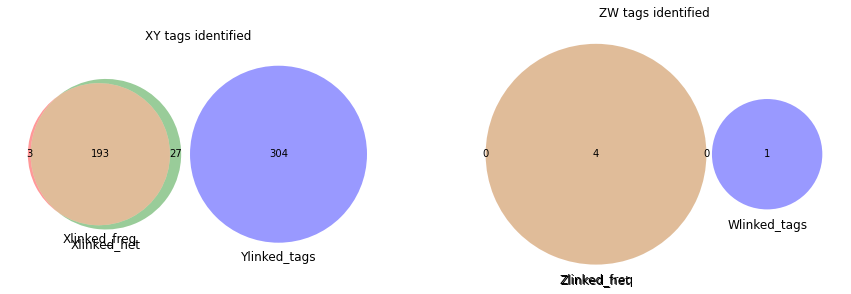

In [47]:
N_Spain_XYset, N_Spain_ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So this dataset is beautiful! Clearly it is very bottlenecked so a large chunk of the variation comes from the sex chromosome. I would bet that there is only one Y haplotype too if the bottleneck is that strong!

### PCA

In [26]:
vcf_path = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/batch_1.vcf"

MISC.filter_vcf(vcf_path, N_Spain_XYset , "XY_linked_snps_freq_het.vcf")

In [27]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/  ## just change this line

## All data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_linked_snps_freq_het_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/XY_linked_snps_freq_het_altered.vcf --recode A --allow-extra-chr -out $wd/XY_linked_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//XY_linked_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//XY_linked_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//XY_linked_snps_freq_het_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//XY_linked_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//XY_linked_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain//XY_linked_plink-temporary.fam
written.
223 variants loaded from .bim file.
66 people (0 males, 0 fem

In [28]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('XY_linked_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_N_spain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



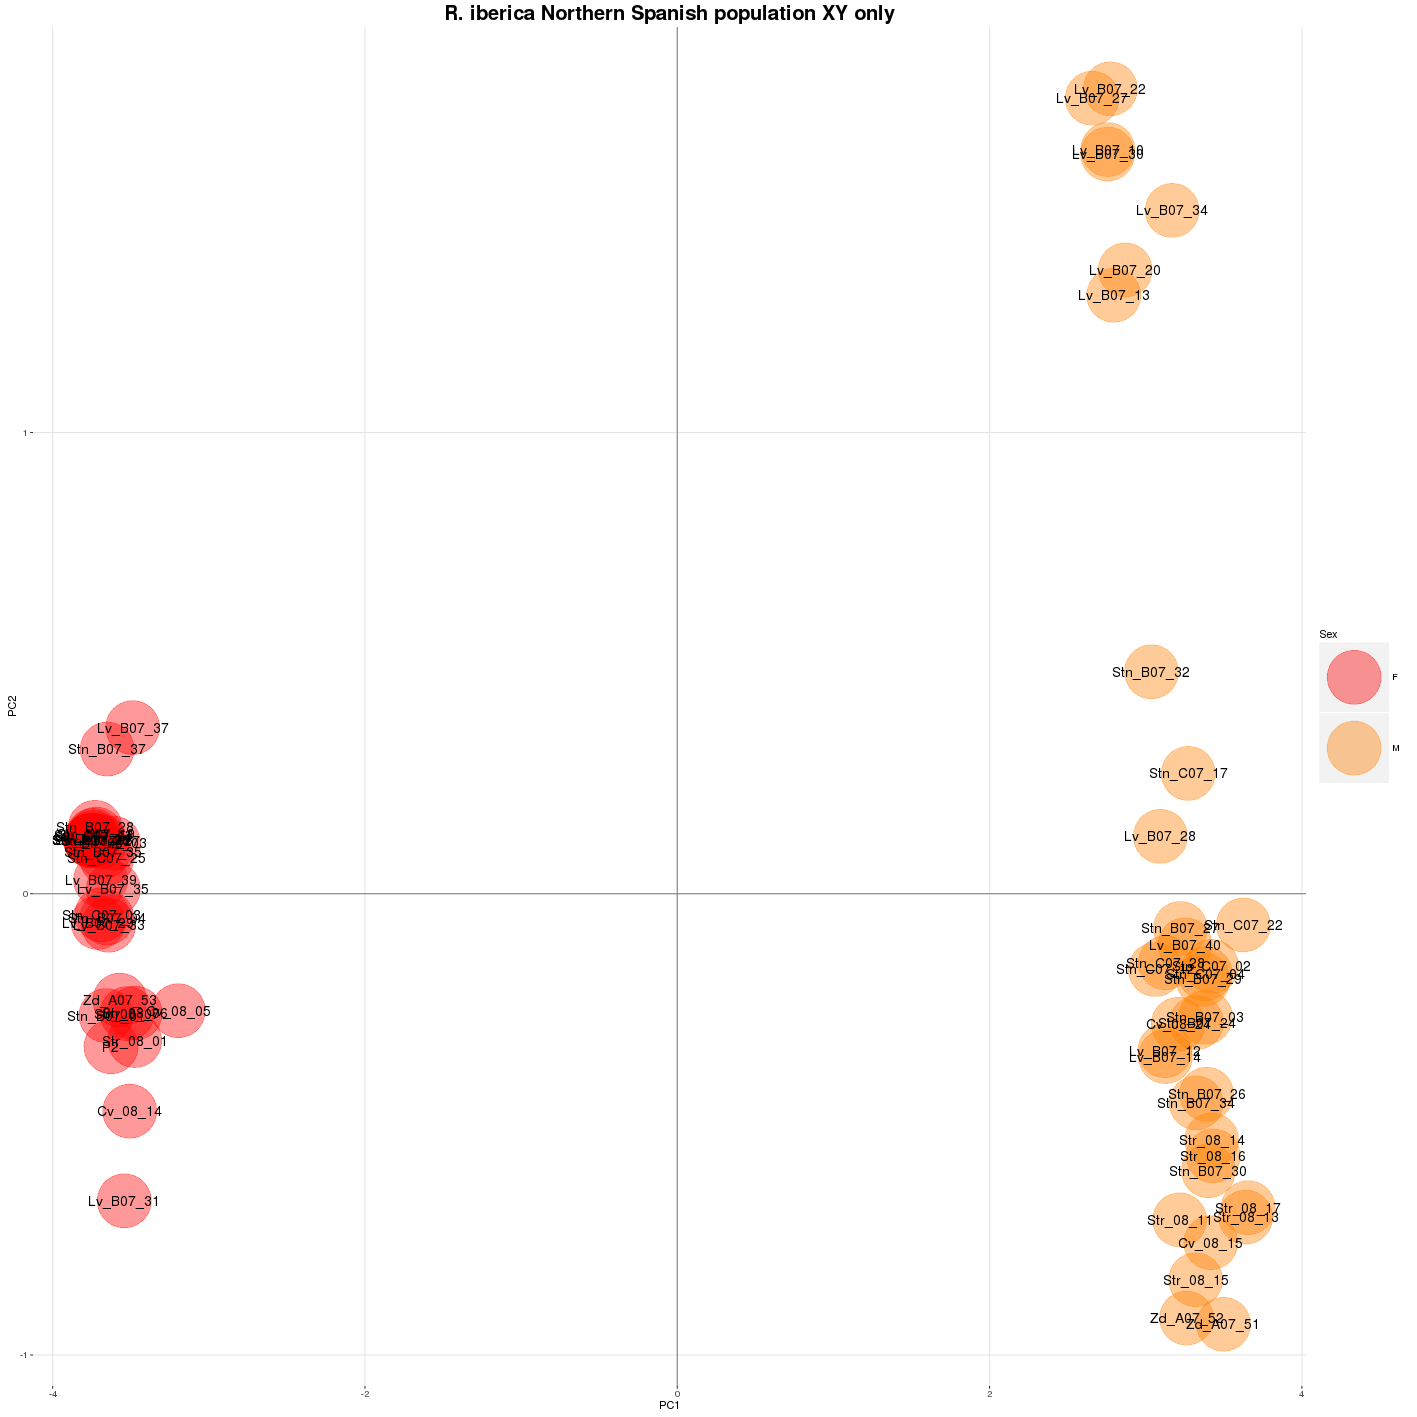

In [29]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Northern Spanish population XY only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

In [32]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/XY_linked_plink.raw  $wd/XY_linked_heatmap_input


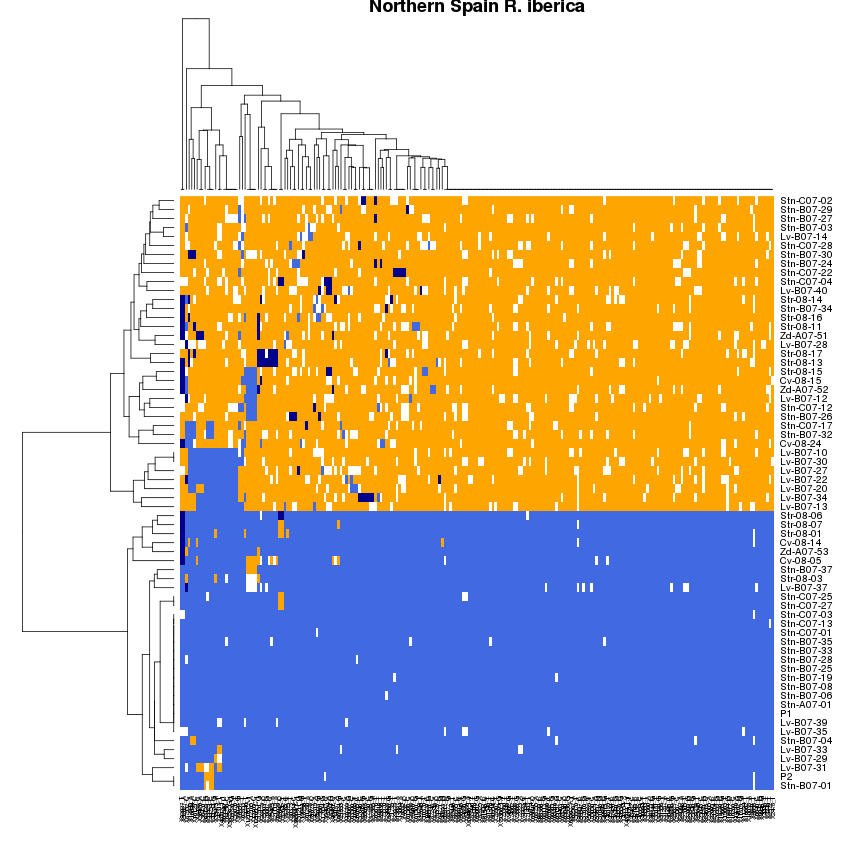

In [33]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/XY_linked_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


Beautiful!


### Portuguese population

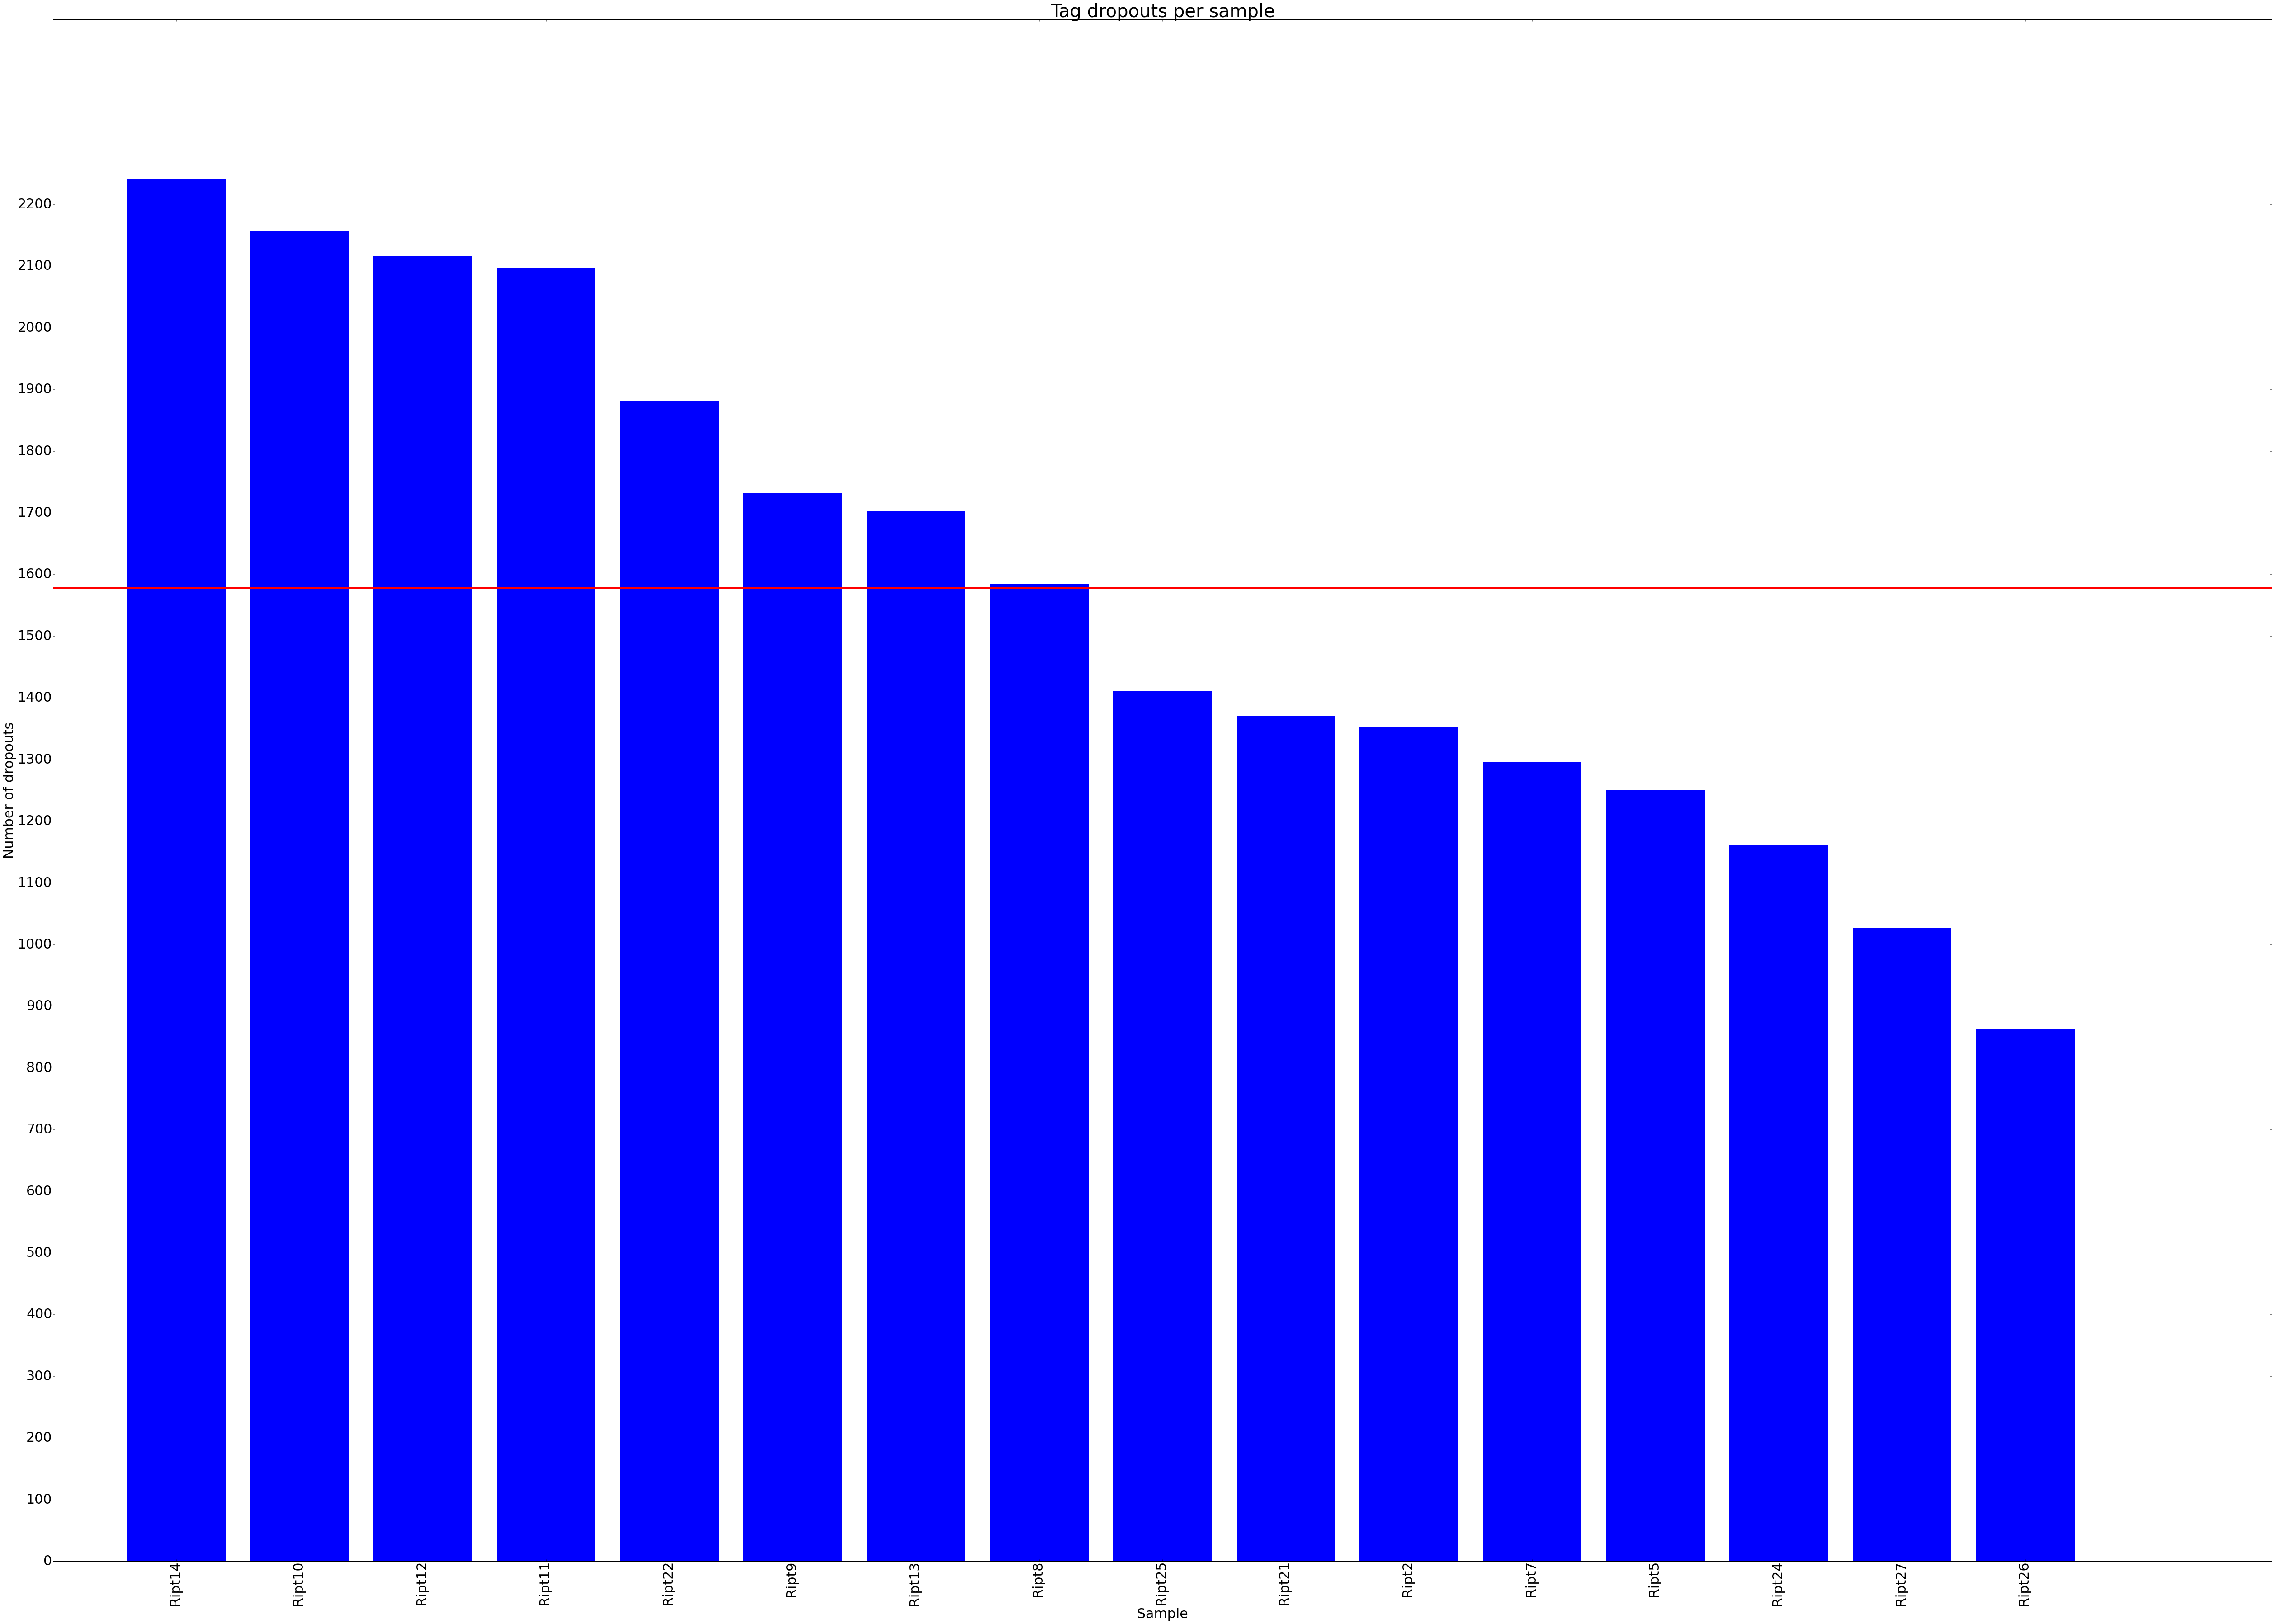

Outputs written to:
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//blacklist.txt


In [34]:
wd = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)


Looks good. Lets have a look for any pop structure

In [35]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//batch_1_altered_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//batch_1_altered_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//batch_1_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 36k variants complete.
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//batch_1_altered_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//batch_1_altered_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//batch_1_altered_plink-temporary.fam
written.
36232 variants loaded from .bim file.
16 p

In [37]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_altered_plink.raw  $wd/batch_1_heatmap_input

In [39]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



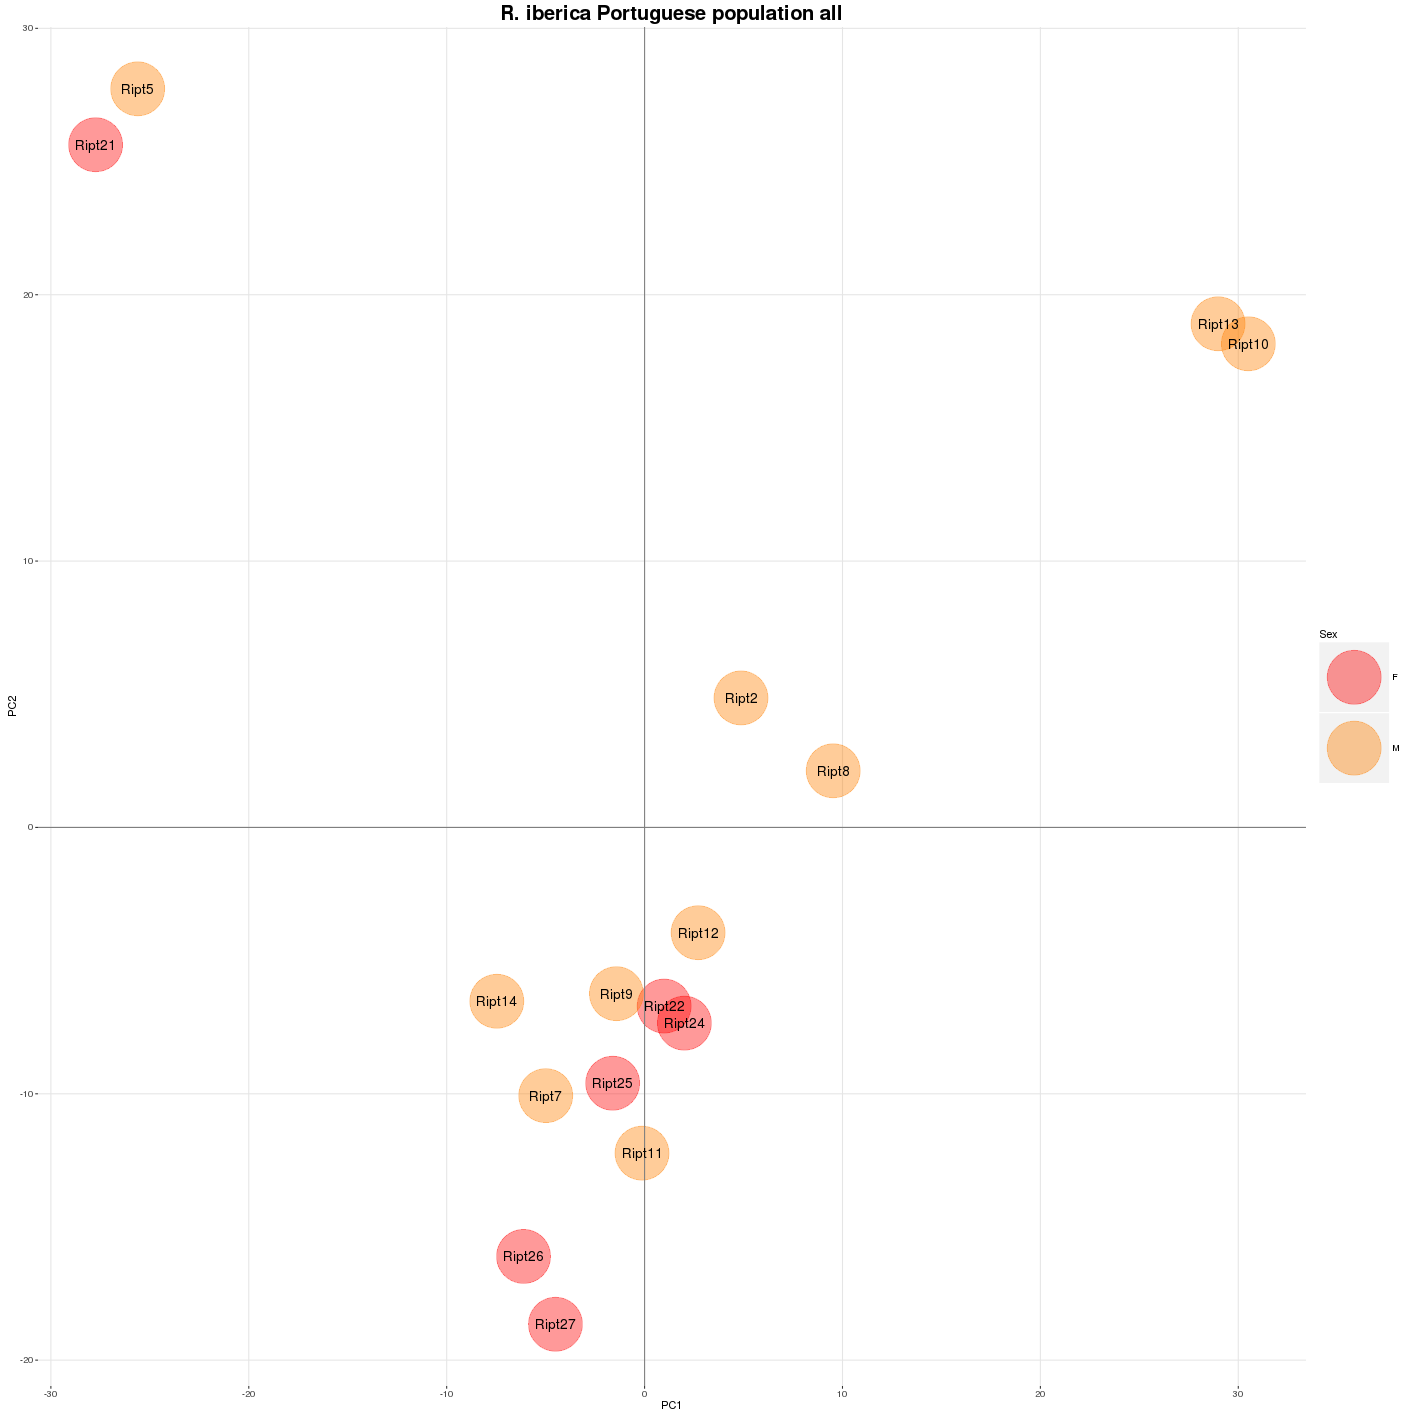

In [40]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Portuguese population all", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

So there are a couple of outliers here, but we already have very few samples for this population, so I would like to keep them in if possible. 

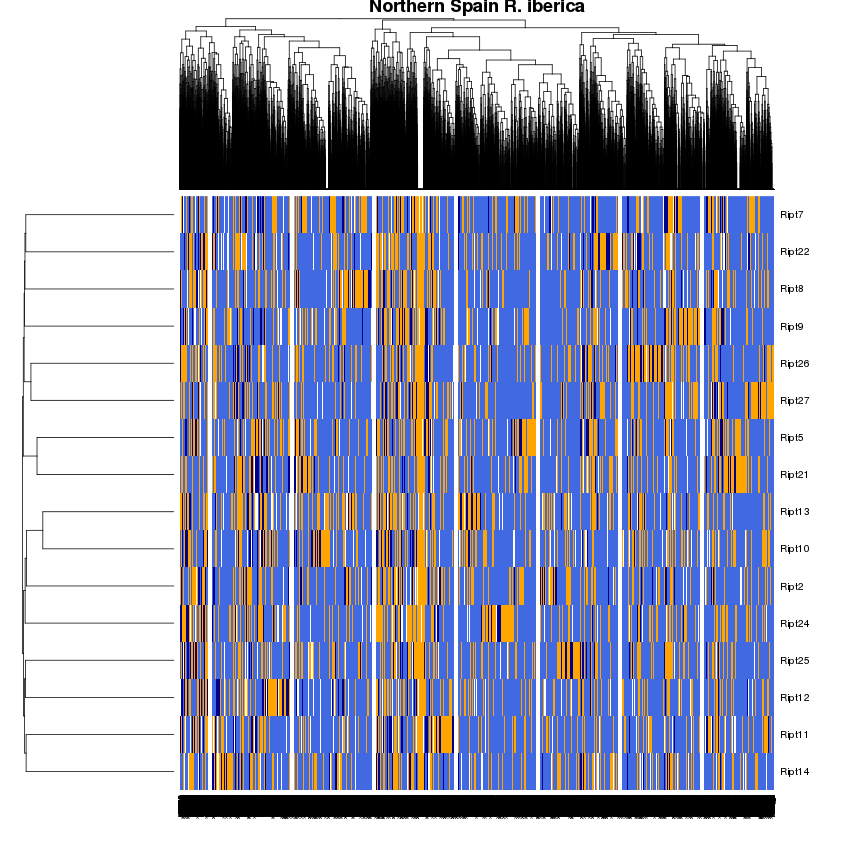

In [41]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


Number of tags =  36232
Average tag coverage 25.261255589 (+- 16.2368019154 )


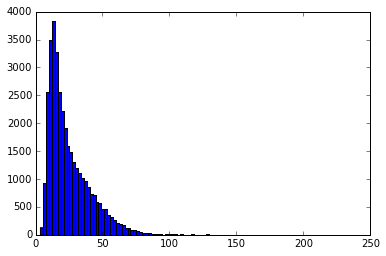

In [2]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [5]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 36232
Number of samples = 16
Number of loci with too few samples = 3105
Number of loci with low MAF = 0
Number of loci with enough data = 33126
Number of putative X linked snps = 85
Number of putative X linked tags = 85
Number of putative Z linked markers = 45
Number of putative Z linked tags = 45


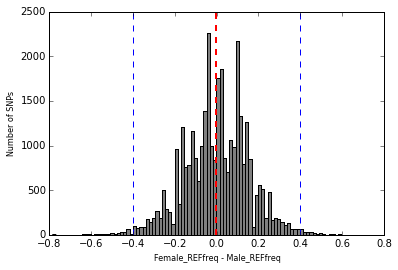


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 36232
Number of samples = 16
Number of loci with too few samples = 3081
Number of loci with low MAF = 0
Number of loci with enough data = 33126
Number of putative X linked snps = 132
Number of putative X linked tags = 132
Number of putative Z linked markers = 85
Number of putative Z linked tags = 85

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 6
Number of males: 10
Number of Putative Y linked tags: 474
Number of Putative W linked tags: 132

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 668
Final number of ZW tags = 256


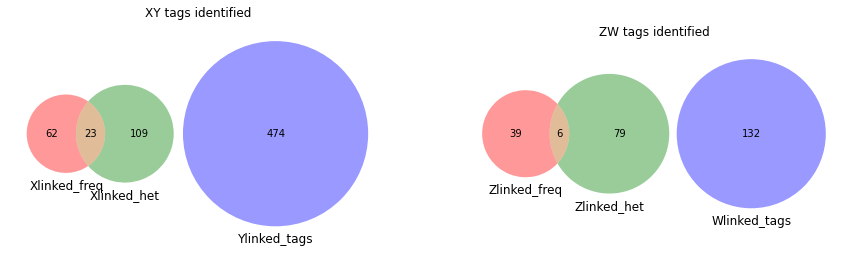

In [6]:
N_Ript_XYset, N_Ript_ZWset = MISC.Super_SLM_finder(Parameter_dict, "111", write_files= False)

In [70]:
vcf_path = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/batch_1.vcf"

MISC.filter_vcf(vcf_path,N_Ript_ZWset, "XY_linked_snps_freq_het.vcf")

In [71]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/  ## just change this line

## All data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/XY_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//XY_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//XY_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//XY_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//XY_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//XY_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//XY_plink-temporary.fam
written.
124 variants loaded from .bim file.
16 people (0 males, 0 females, 16 ambiguous) loaded from .fam.
Ambiguous sex IDs written t

In [72]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('XY_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



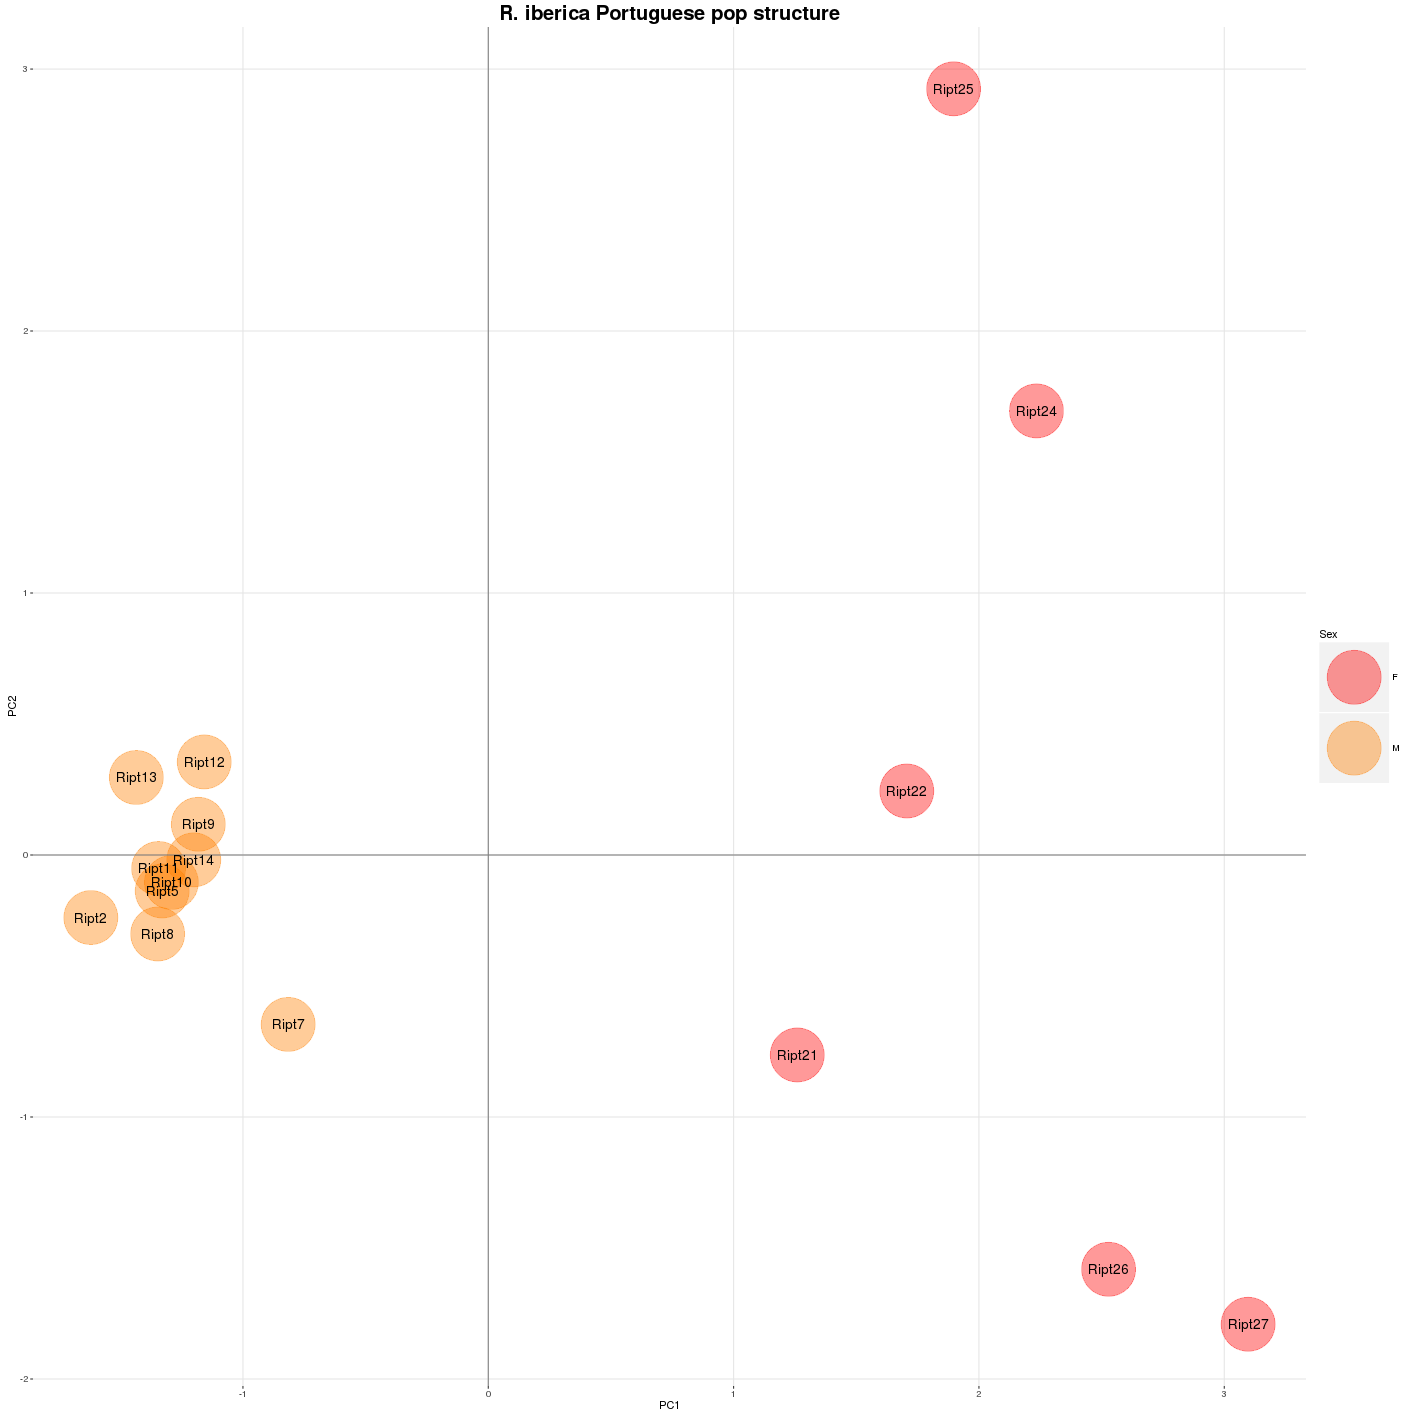

In [73]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Portuguese pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

So the signal is not strong enough here, so really I can't determine what the sex linked markers are here. See above, I can plot with either the XY set or the ZW set and it will give me male - female signal. 

So now to check whether the sex linked markers in the northern population are sex linked in the south. . . 


In [66]:
vcf_path = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/batch_1.vcf"

MISC.filter_vcf(vcf_path, N_Spain_XYset, "N_spain_XY_linked_snps_freq_het.vcf")

In [67]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/  ## just change this line

## All data 
sed 's/_/-/g' $wd/N_spain_XY_linked_snps_freq_het.vcf > $wd/N_spain_XY_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/N_spain_XY_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/N_spain_XY_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//N_spain_XY_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//N_spain_XY_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//N_spain_XY_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//N_spain_XY_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//N_spain_XY_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript//N_spain_XY_plink-temporary.fam
written.
91 variants loaded from .bim file.
16 people (0 males, 0 females, 16 ambiguous

In [68]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('N_spain_XY_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



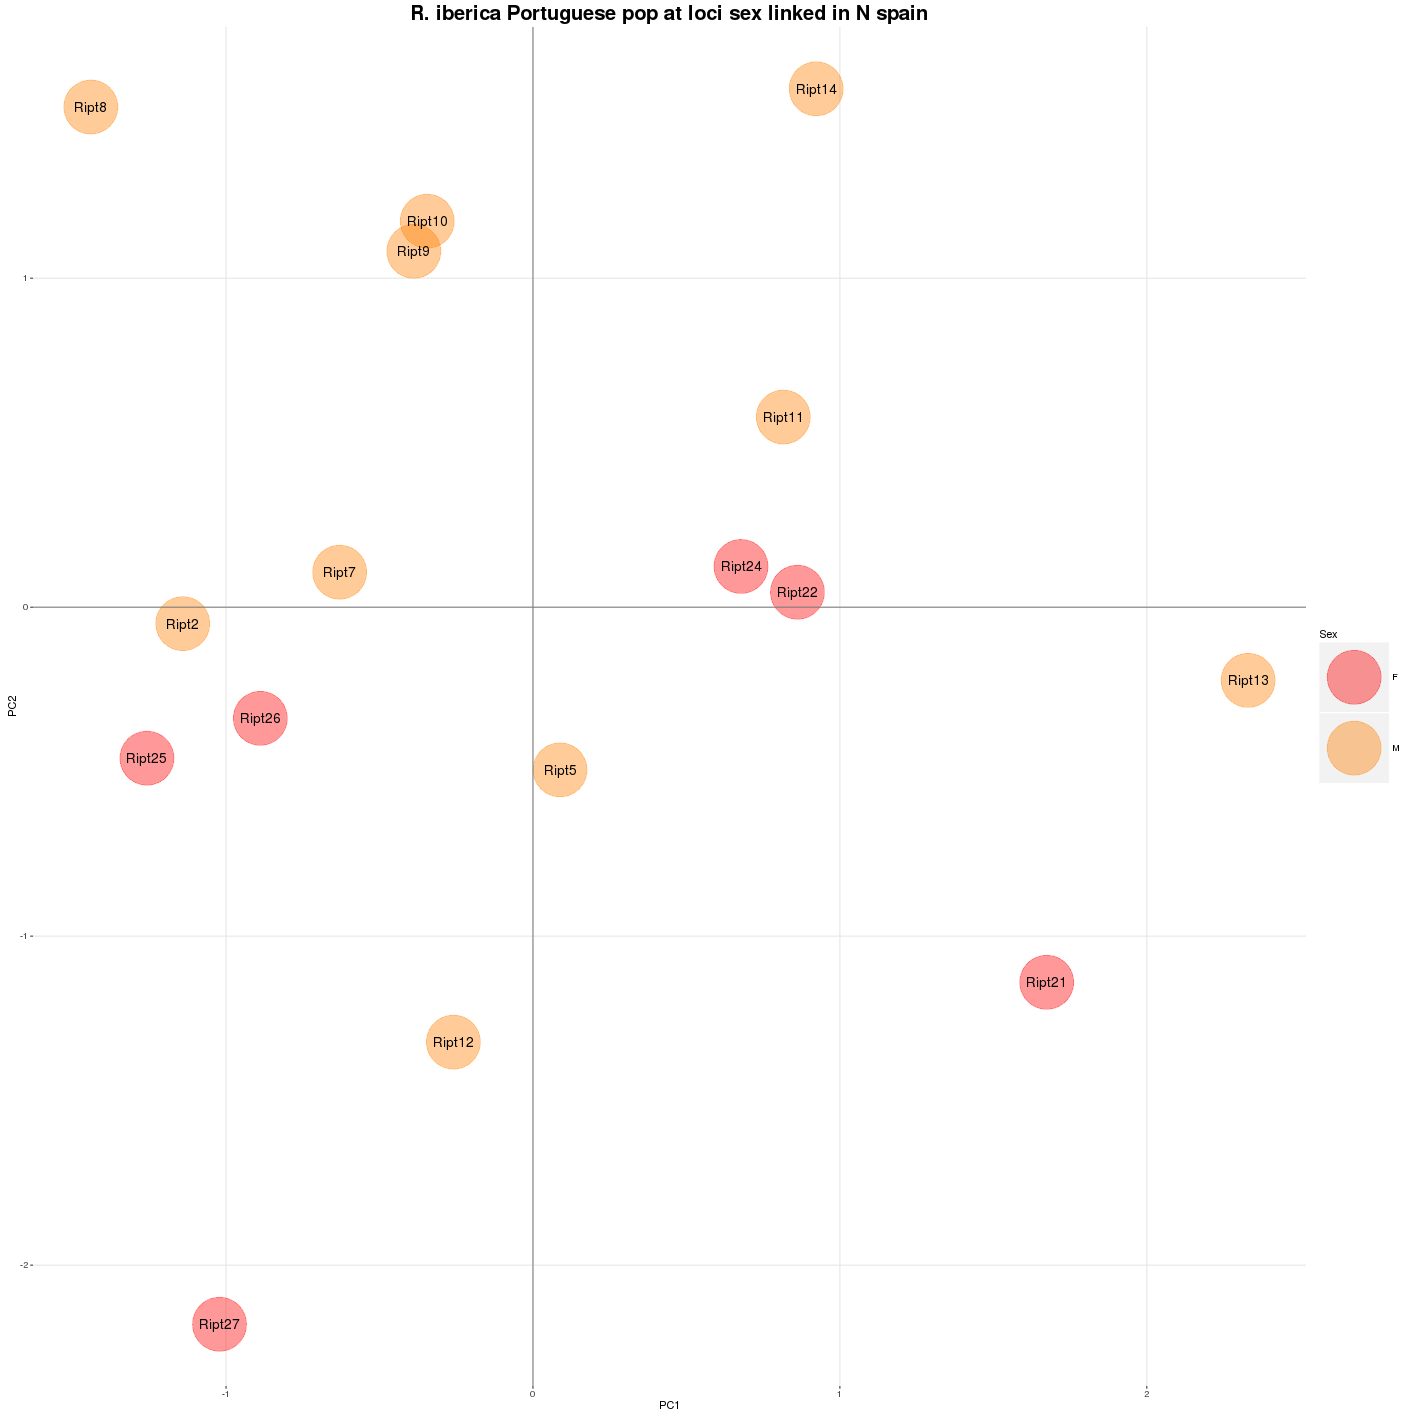

In [69]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Portuguese pop at loci sex linked in N spain", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

###So the answer is no, the loci which are sex linked in Northern Spain show no sex linked signal in portugal!! 

## Family

Finally then, it is time to analyse the family! This linkage map won't be great as there are so few markers in the dataset which are polymorphic. However it should resolve the sex linkage group well enough, as most snps are on this linkage group. Comparing male and females will show which LG is the sex linked on, and then I can map the tags found above onto this to see where they are. 

Constructing linkage map in LEPmap. Input file made manually from VCF using custom script. 



In [10]:
## Prepare the XY tag numbers so they match to the linkage map. 

new_spain_XYs = []
for i in N_Spain_XYset:
    if len(i.split("_")) == 2:
        new_spain_XYs.append(i.split("_")[0])
        

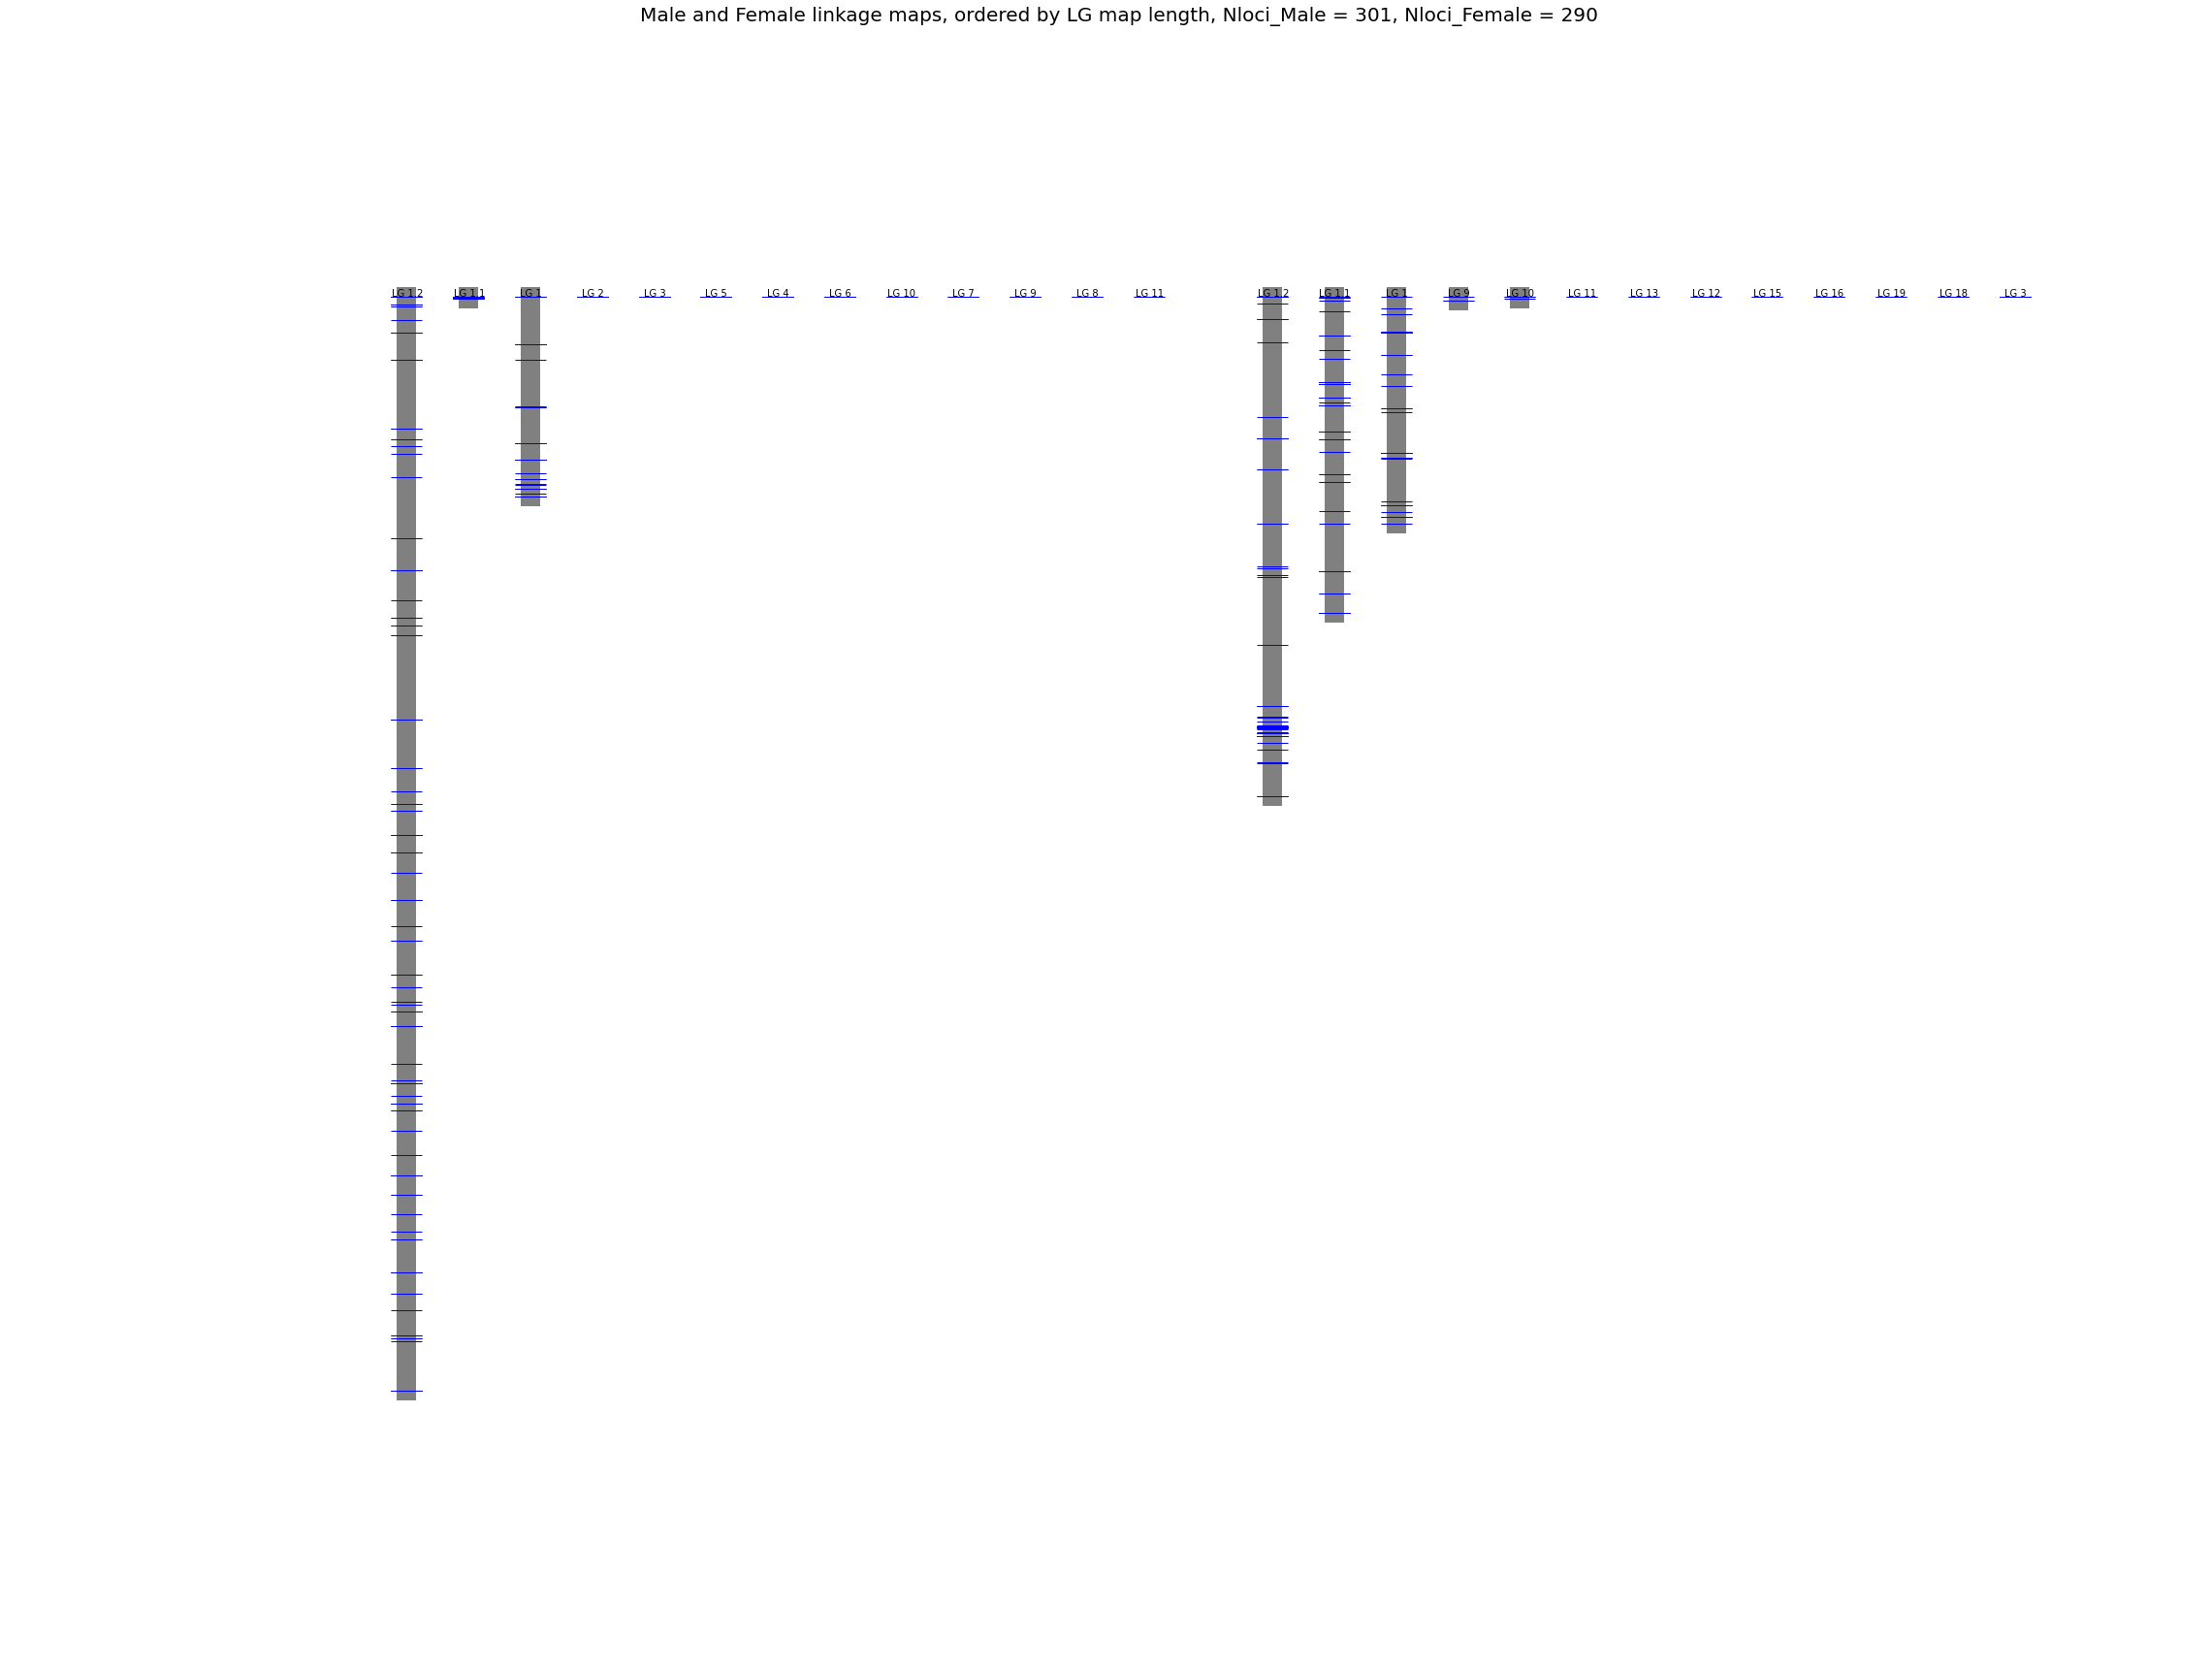

In [8]:
LEPmap_outpath = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/LEPMAP/MAP_LOD_2_ordered1.txt"

MISC.Sexy_LEPmap_plotter(LEPmap_outpath, 3 , new_spain_XYs, "D", 13, 1, "Both_sexes_map.pdf")

### Ok so this isn't great. But what I can do is try to sex the offspring using the sex linked markers that I found in the northern pop. Perhaps if I add sex info then LEPmap will be able to make a better map. 

In [11]:
vcf_path = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1.vcf"

MISC.filter_vcf(vcf_path,N_Spain_XYset, "N_Spain_adults_XY_linked_snps_freq_het.vcf")

In [17]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 3k variants complete.
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1_altered_adegenet_plink-temporary.fam
written.
3792 variants loaded from .bim file.
64 people (0 males

In [18]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



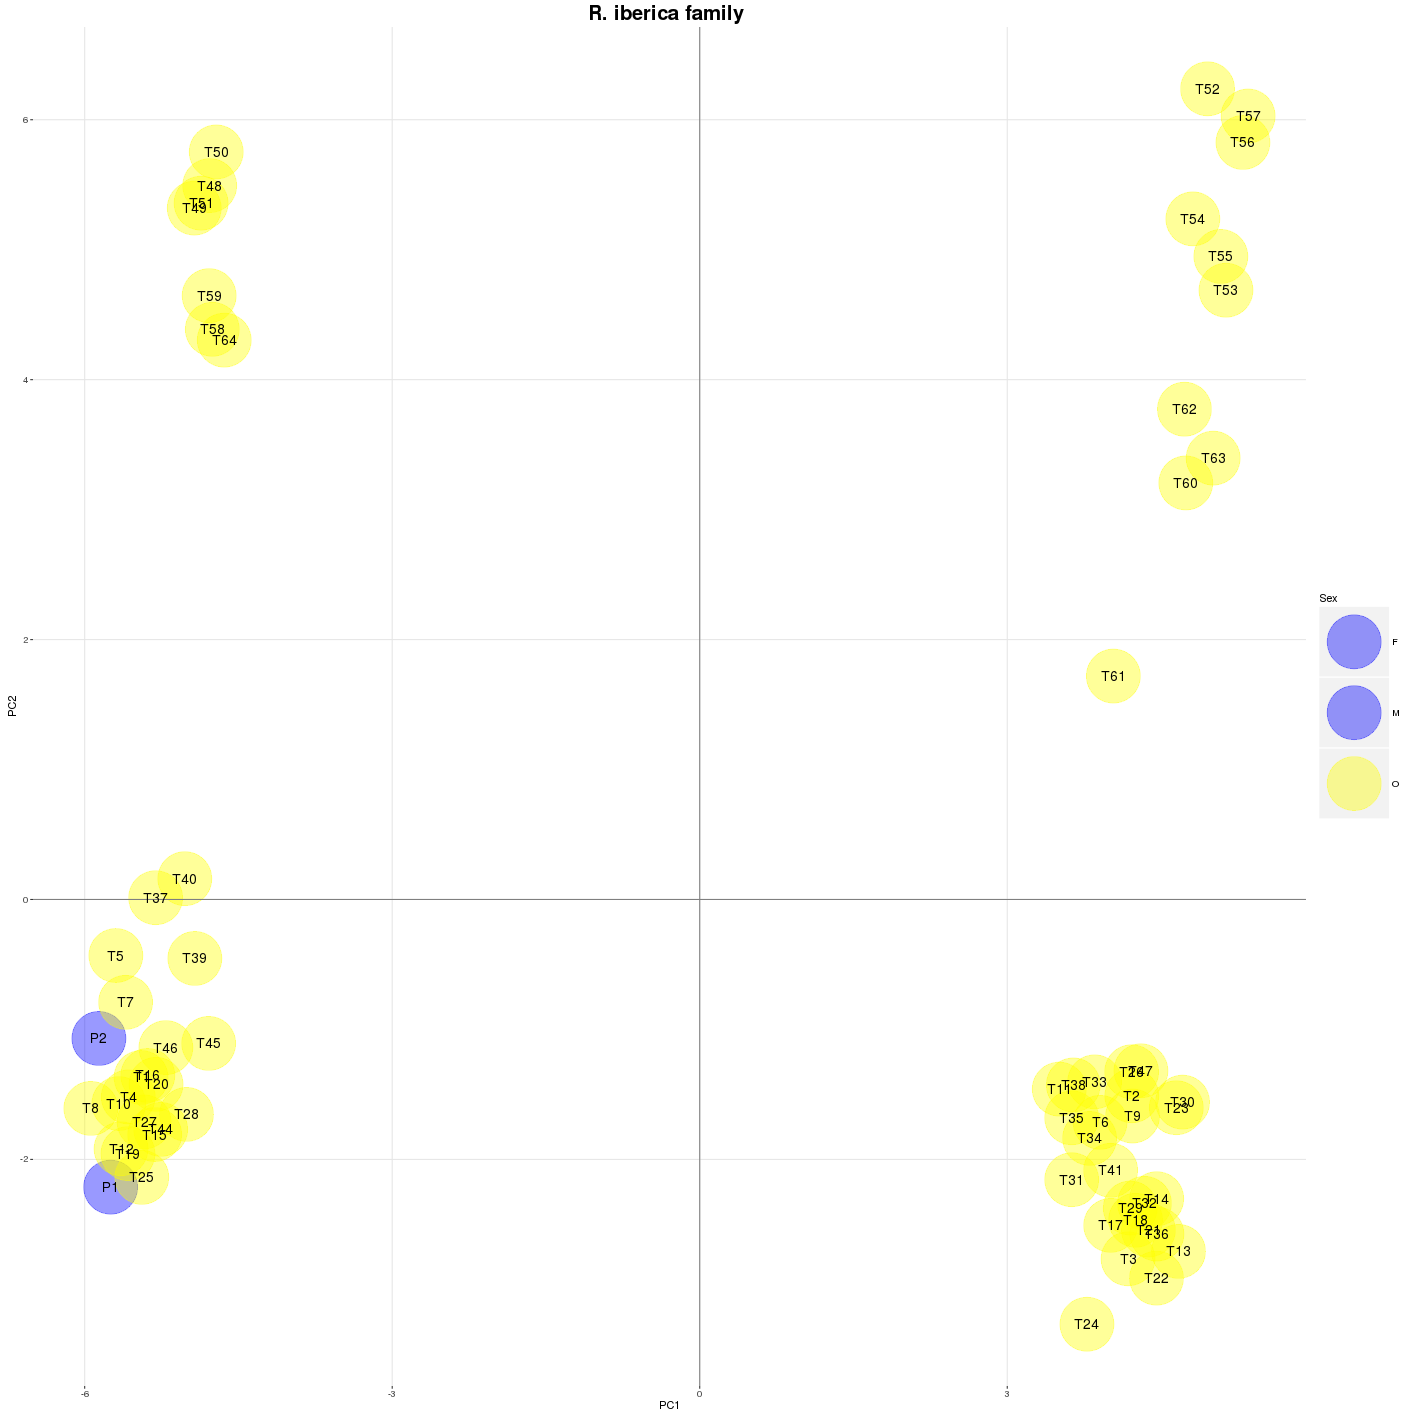

In [19]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica family ", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("blue", "blue", "yellow"), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

Ok so there is something not right about this "family"! There are distinct clusters and in a family, the only clusters present should correspond to males and females. However firstly there are more than two clusters, and secondly, both of the "parents" cluster together. The data quality is pretty good, no clear "clusters" of bad samples for dropout etc.  

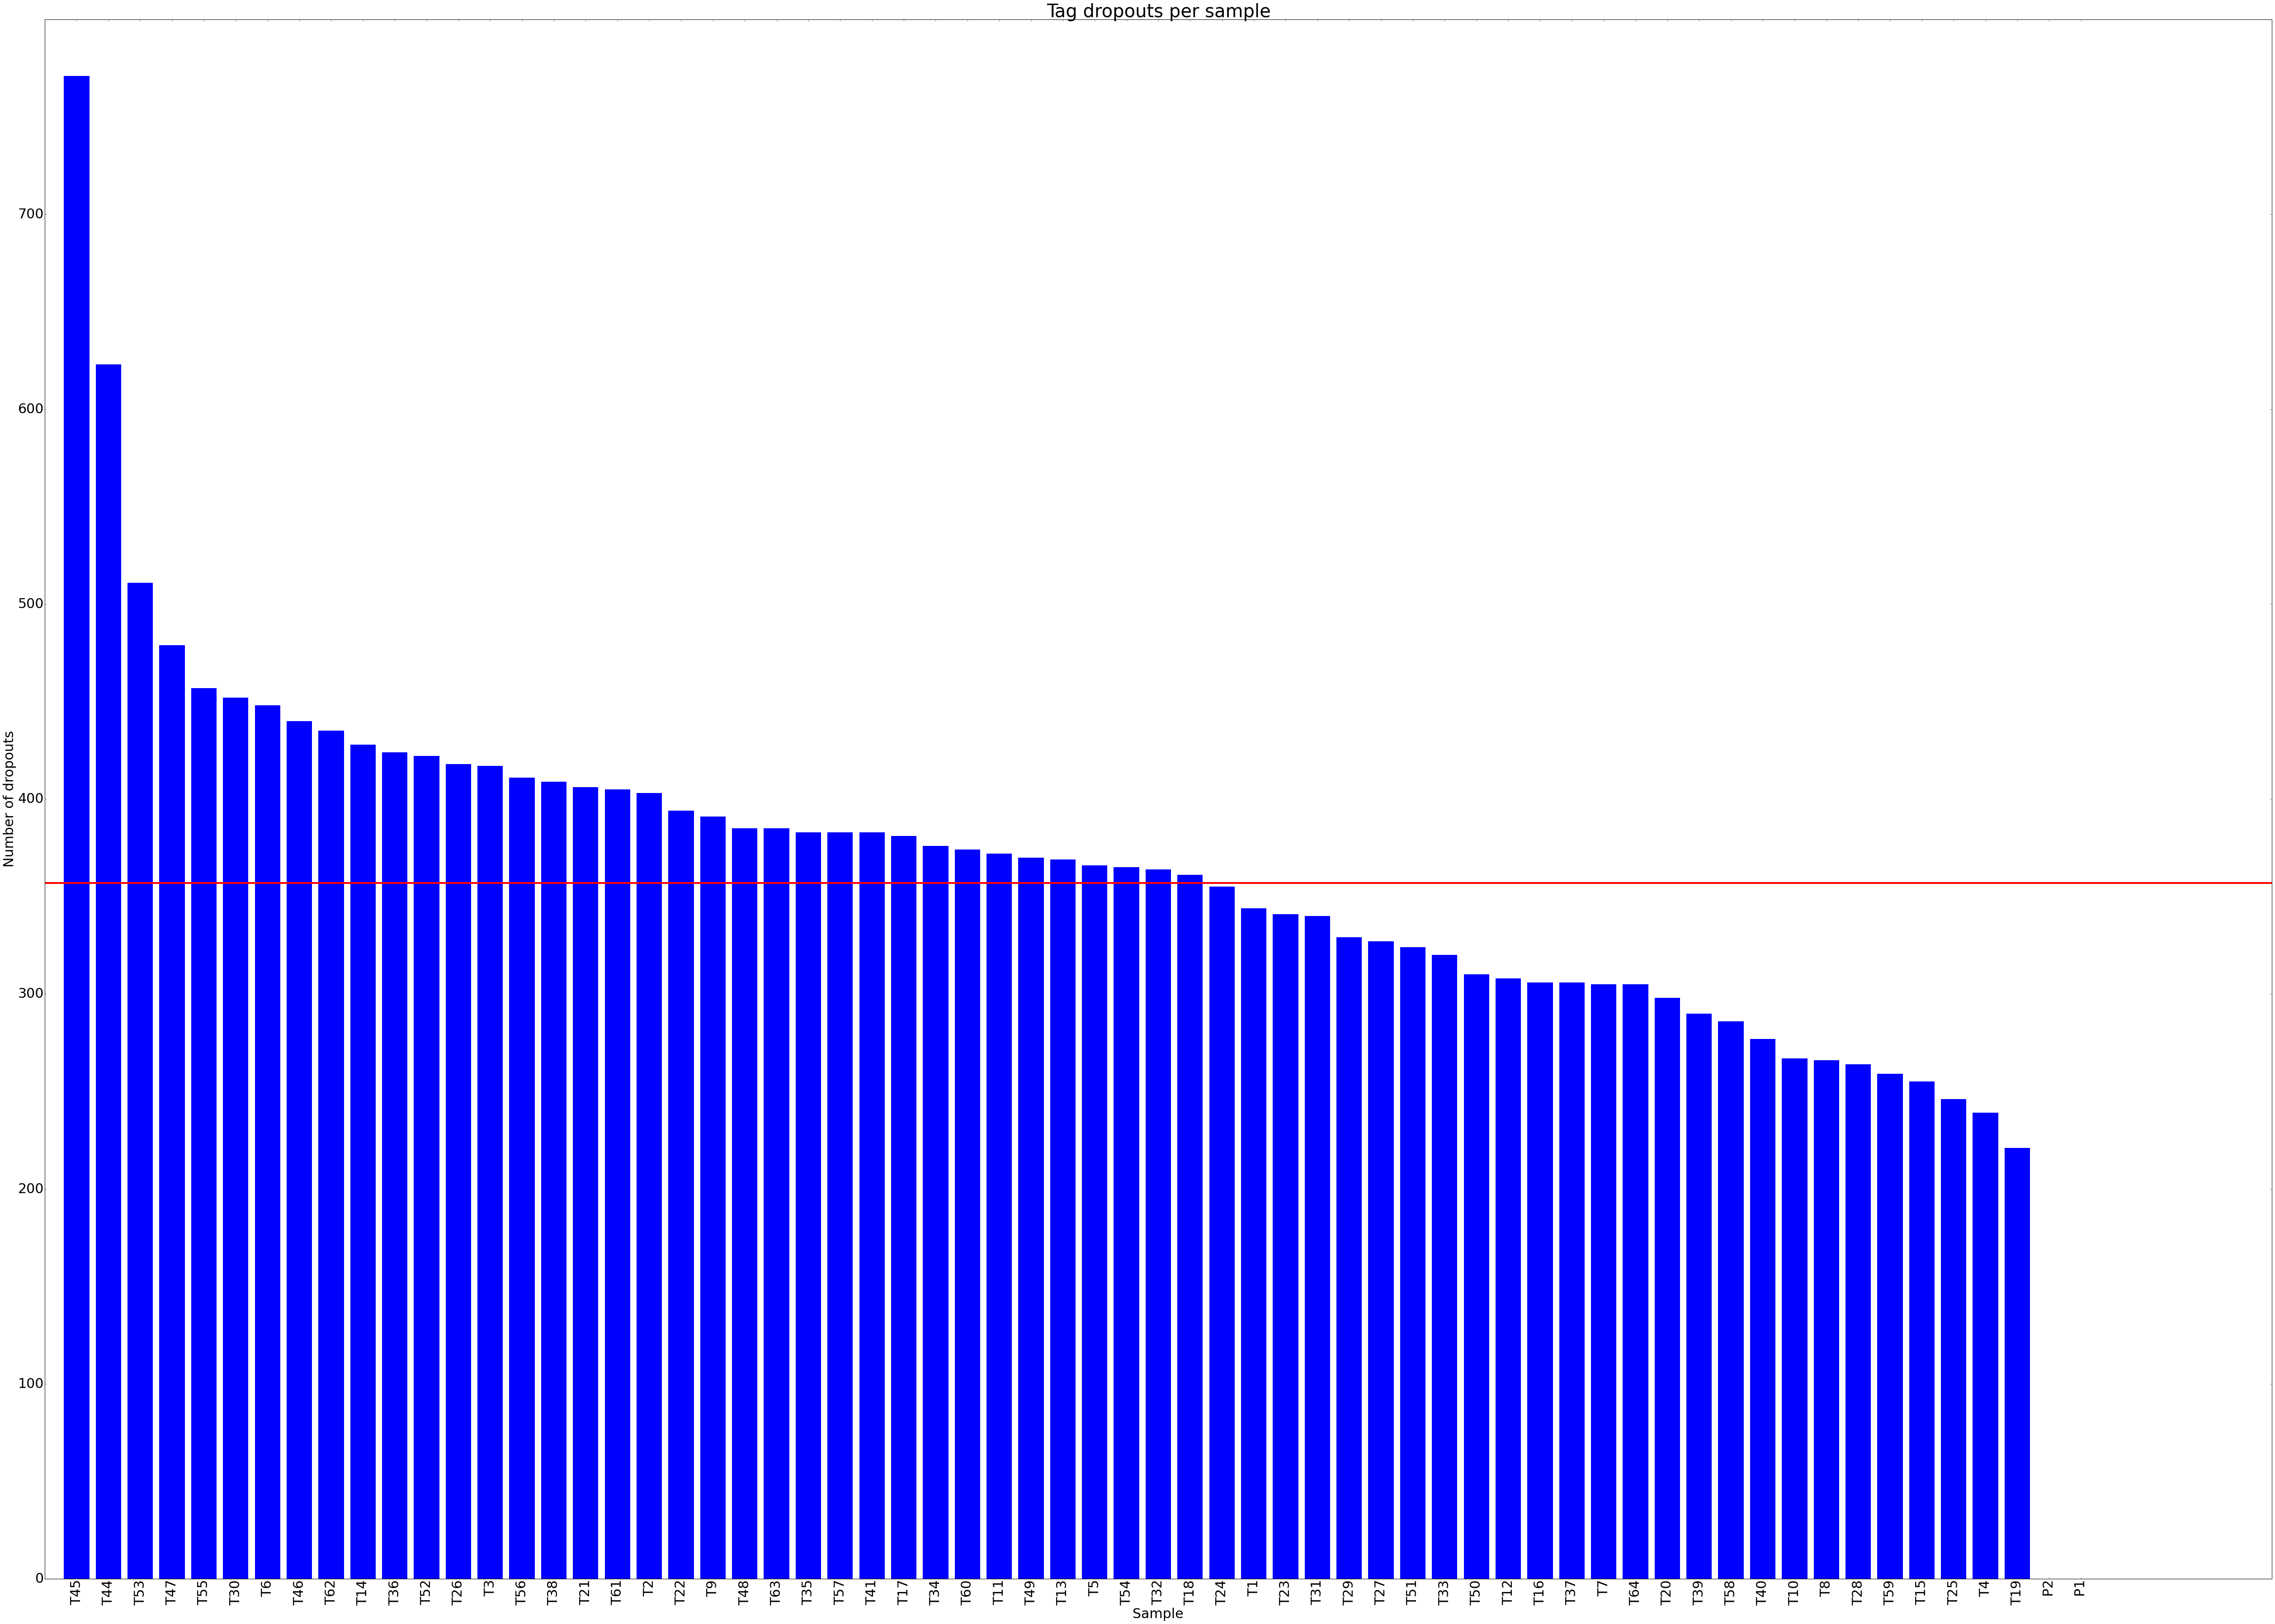

Outputs written to:
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY//blacklist.txt


In [20]:
wd = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)


Number of tags =  3792
Average tag coverage 23.7046825554 (+- 19.6048451034 )


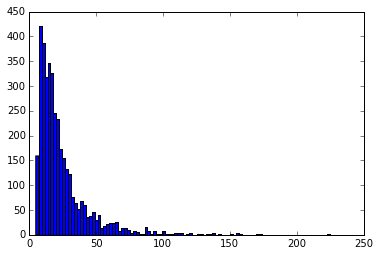

In [9]:
MISC.av_tag_cov("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/batch_1.vcf", "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/sample_coverages.txt")

Mean sample coverage = 23.71 (+/1.65) 


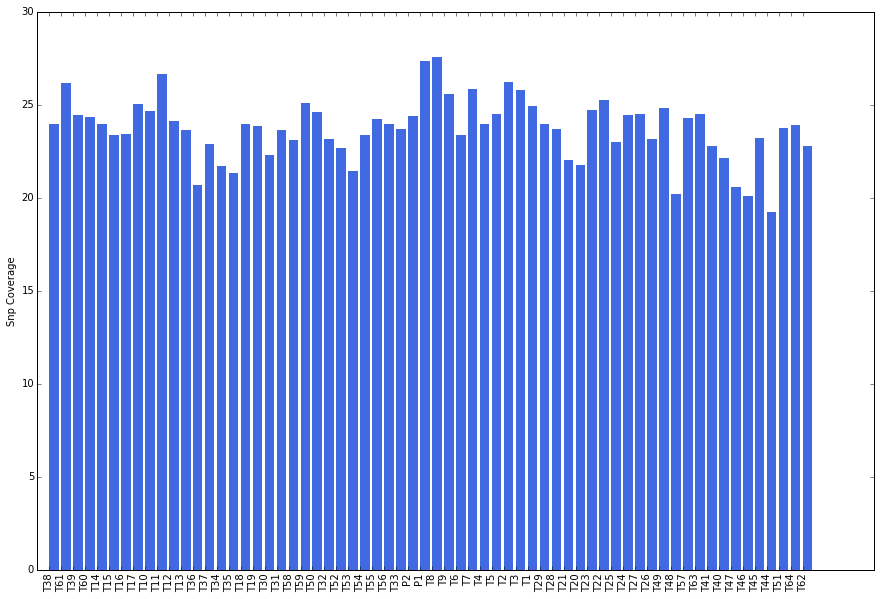

In [3]:
sample_covs = MISC.sample_Avcov_from_vcf("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/batch_1.vcf")

Find the mean sample coverages and output to file. 

In [23]:
import numpy as np
mean_sample_covs = {}
for i in sample_covs:
    mean_sample_covs[i] = np.mean(sample_covs[i])

In [27]:
sample_covs_out = open("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/Mean_sample_coverages.txt", 'w')
for i in mean_sample_covs:
    sample_covs_out.write("%s\t%s\n" % (i, mean_sample_covs[i]))
    
sample_covs_out.close()

What is the Standard deviation like?

In [24]:
import numpy as np
STD_sample_covs = {}
for i in sample_covs:
    STD_sample_covs[i] = np.std(sample_covs[i])

In [28]:
sample_STDs_out = open("/home/djeffrie/Data/Transposable_elements/RAD_TE_pipeline/sample_coverages_STDs.txt", 'w')
for i in STD_sample_covs:
    sample_STDs_out.write("%s\t%s\n" % (i, STD_sample_covs[i]))
    
sample_STDs_out.close()

In [29]:
np.mean(STD_sample_covs.values())

21.311500874862695

So that is less than one copy number. 

Is this the correct way to look at the mean and STD? Stacks has already got rid of things that look repetitive, everything else should be in single copy. So although it is a subset, it should still be indicative of the coverage variation at single copy loci in within individuals. So this is good news. That means there's an error of about  copy number. 


In [21]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_altered_adegenet_plink.raw  $wd/batch_1_heatmap_input


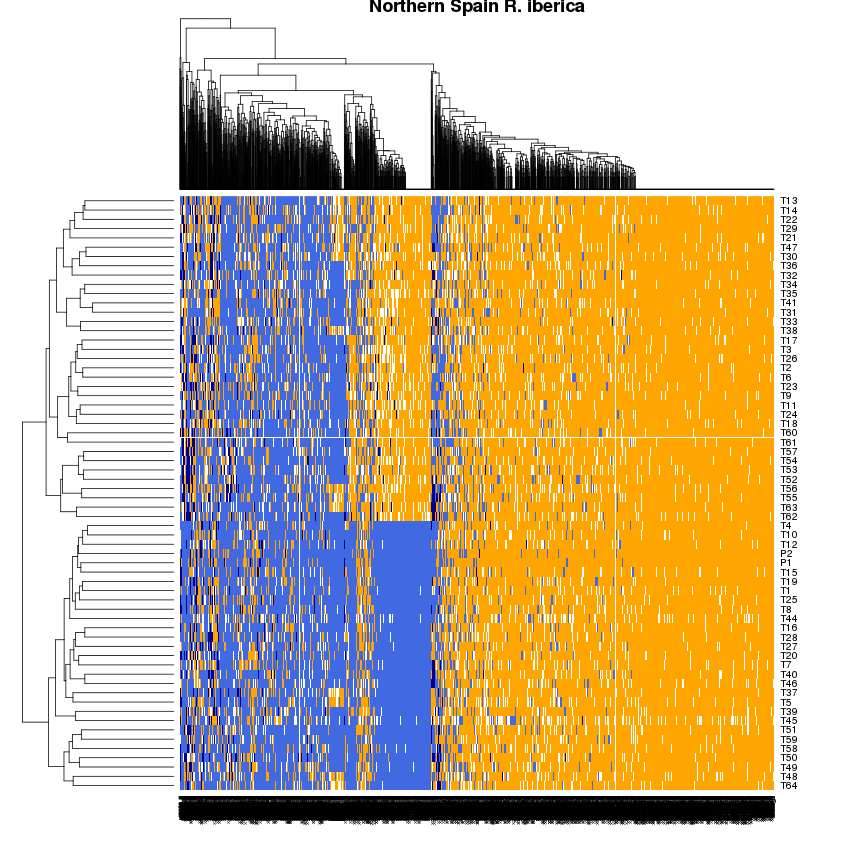

In [23]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/batch_1_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


So it does look like the assignments are wrong!!! Firstly there are clear males and females. Secondly both! Parents cluster with females. This is either because they were mis-assigned during labelling, barcoding or demultiplexing. Or because the male was actually XX. But if the male was XX then there would be no Ys in the offspring and the heterozygous signal in half of the offspring would not exist. So it must be a mis-assignment. 

However it doesn't account for the presence of other cluster in the PCA, separated by PC2. These must be a second family. Maybe even more than one family judging by the separation among the Y chromosomes in the top right. 

What I can do is treat this as a normal populaion. It will do very well in the analysis. I can't make the linkage map, but this is not so important given that I will be able to map a decent number of these markers to the genomes. . . 


Number of tags =  3792
Average tag coverage 23.7046825554 (+- 19.6048451034 )


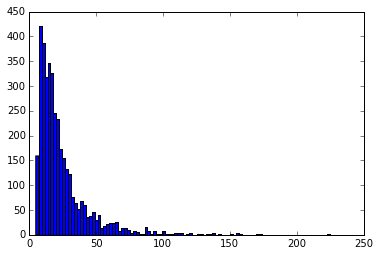

In [3]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [44]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 3792
Number of samples = 64
Number of loci with too few samples = 642
Number of loci with low MAF = 0
Number of loci with enough data = 3149
Number of putative X linked snps = 201
Number of putative X linked tags = 201
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


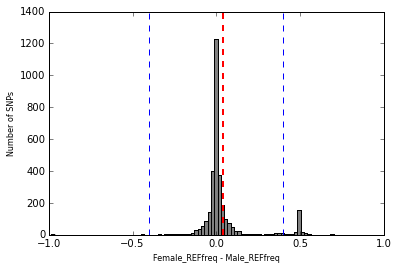


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 3792
Number of samples = 64
Number of loci with too few samples = 642
Number of loci with low MAF = 0
Number of loci with enough data = 3149
Number of putative X linked snps = 223
Number of putative X linked tags = 223
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 29
Number of males: 35
Number of Putative Y linked tags: 297
Number of Putative W linked tags: 6

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd

 ## After merging tags accross methods ## 

Final number of XY tags = 520
Final number of ZW tags = 6


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:56: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


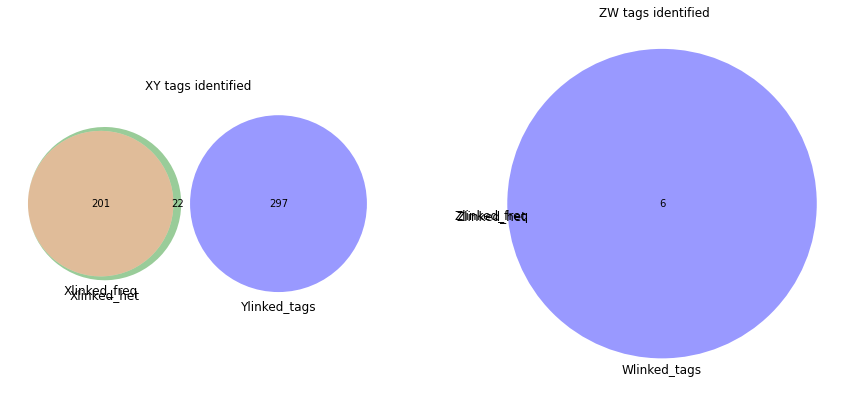

In [45]:
Fam_XYset, Fam_ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So I find hundreds, and they are almost all shared by the datasets of the adults in Spain. . . 

<matplotlib_venn._common.VennDiagram instance at 0x7f823b81e518>

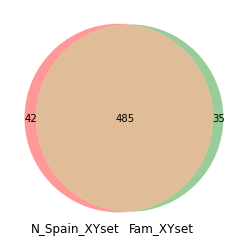

In [29]:
from matplotlib_venn import venn2

venn2([N_Spain_XYset, Fam_XYset], set_labels=("N_Spain_XYset", "Fam_XYset"), set_colors=('r', 'g') )

So I think it is time to do one big Populations run with all Northern Spanish samples and to plot them out using the sex linked markers I found here. Nonetheless I have a huge number of sex linked markers now - no need for a linkage map. 

In [37]:
x = set(list(N_Spain_XYset) + list(Fam_XYset)) ## combine the sex linked markers from the datasets

In [40]:
vcf_path = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain/batch_1.vcf"

MISC.filter_vcf(vcf_path,x, "N_Spain_all_XY_linked_snps_freq_het.vcf")

In [45]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain/  ## just change this line

## All data 
sed 's/_/-/g' $wd/N_Spain_all_XY_linked_snps_freq_het.vcf > $wd/N_Spain_all_XY_linked_snps_freq_het_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/N_Spain_all_XY_linked_snps_freq_het_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/N_Spain_all_XY_linked_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain//N_Spain_all_XY_linked_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain//N_Spain_all_XY_linked_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain//N_Spain_all_XY_linked_snps_freq_het_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain//N_Spain_all_XY_linked_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain//N_Spain_all_XY_linked_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/I

In [47]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/N_Spain_all_XY_linked_plink.raw  $wd/N_Spain_all_XY_linked_heatmap_input


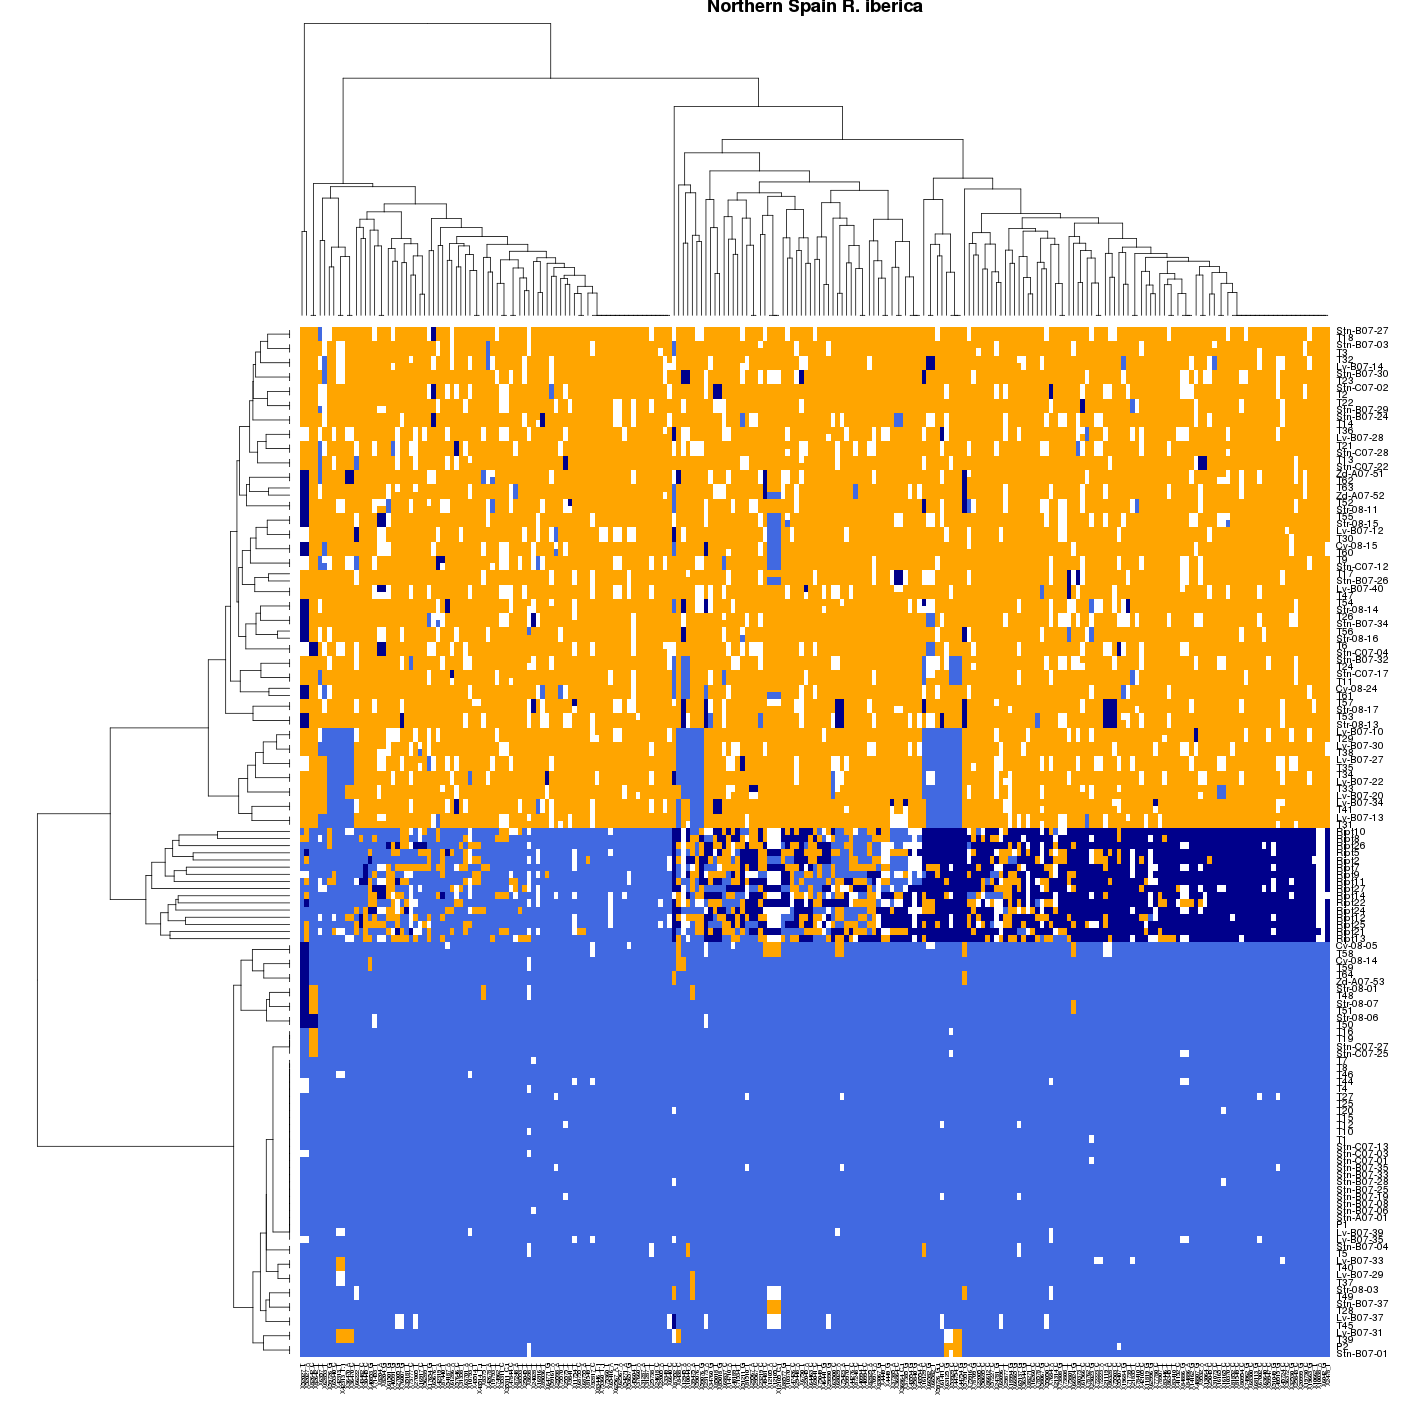

In [49]:
%%R -w 50 -h 50 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_all_Northern_Spain/N_Spain_all_XY_linked_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


So there it is - males, females and then the mess that is Portugal. We really need more samples from Portugal!

### Ok, so i will try to figure out the identity of the parents in the family dataset  . . . 

Essentially my approach will be to look for mendelian segregation for each combination of males and females. However instead of looking at all loci, I will look only at loci which are fixed between the samples. 

If the samples are the parents, then all offspring (the other samples) should be heterozygous.

If the samples are not the parents, then they are offspring. If they are offspring then the only way their genotypes could arise would be if both of their parents were




In [64]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2//batch_1_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2//batch_1_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 1k variants complete.
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2//batch_1_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2//batch_1_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2//batch_1_plink-temporary.fam
written.
1060 variants loaded from .bim file.
47 people (0 males, 0 females, 47 ambiguous) loaded from .fam.
Ambiguous sex IDs writ

In [65]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("sex_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



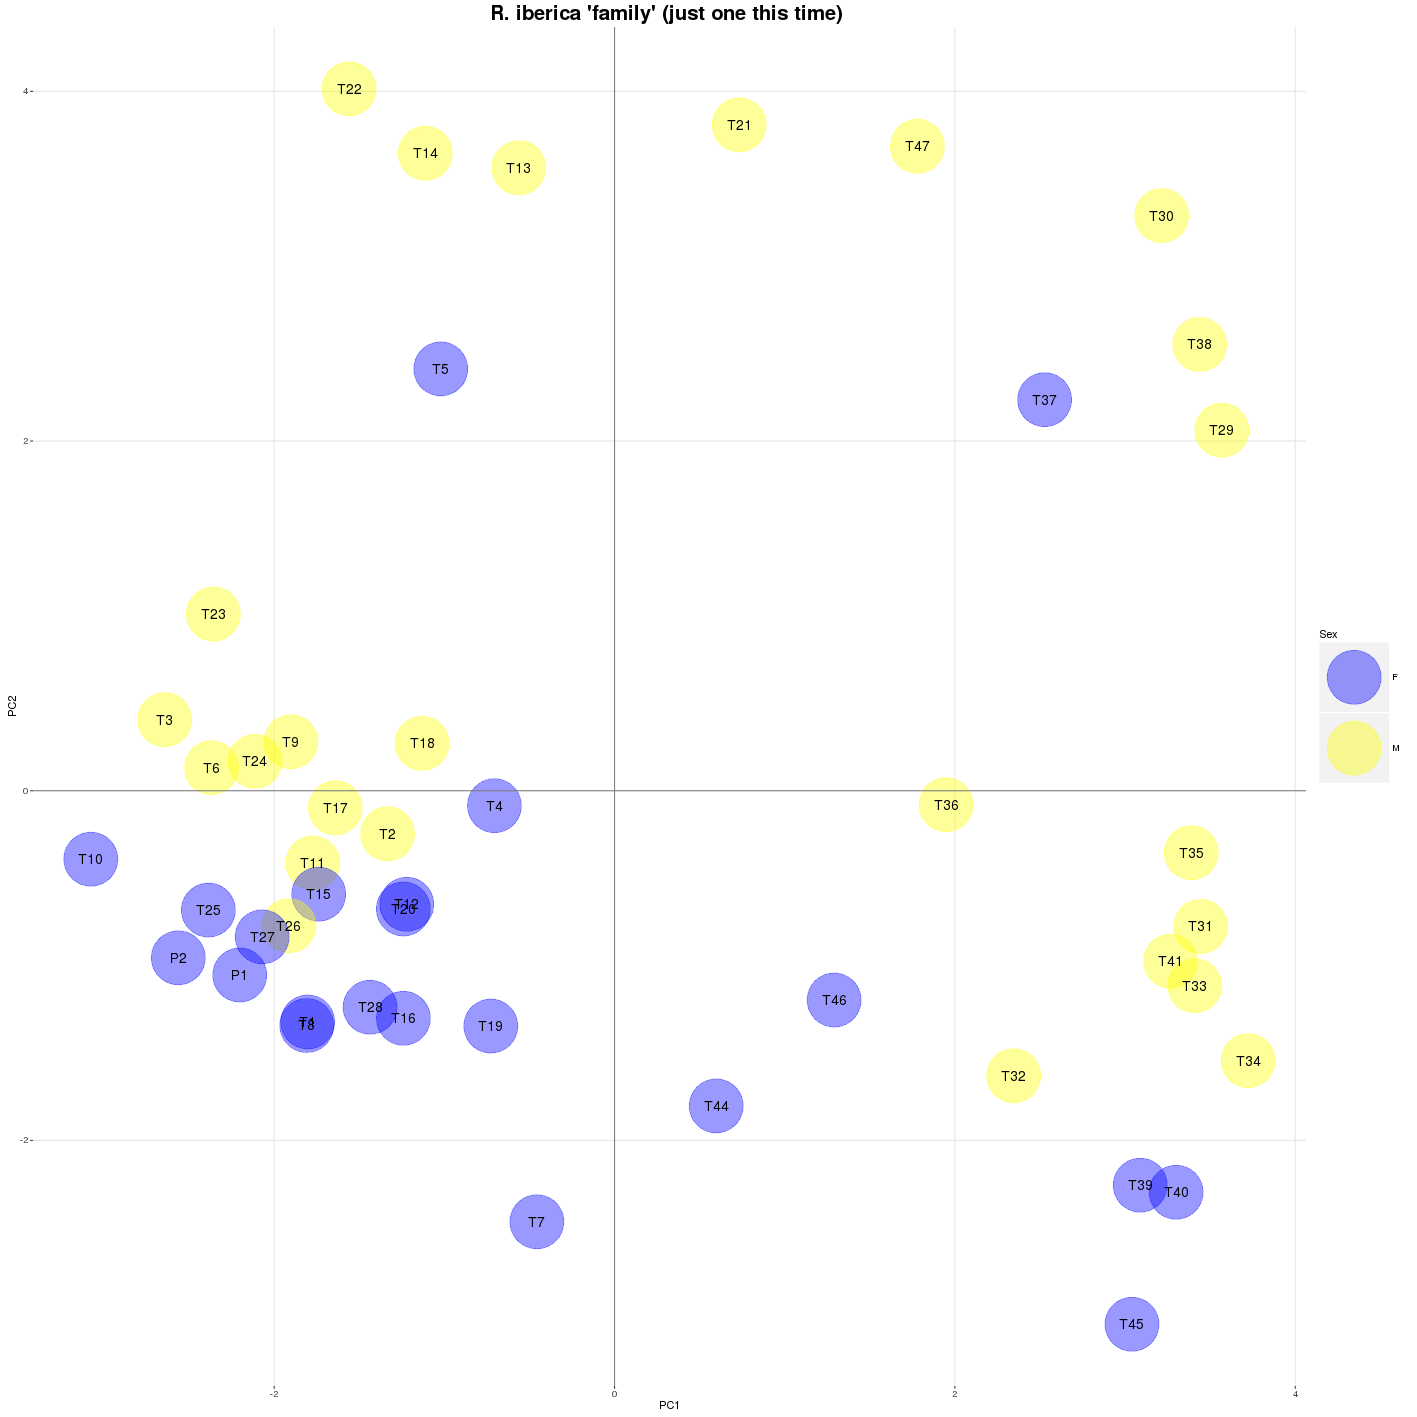

In [66]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica 'family' (just one this time) ", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("blue", "yellow"), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

In [67]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_plink.raw  $wd/batch_1_plink_heatmap_input


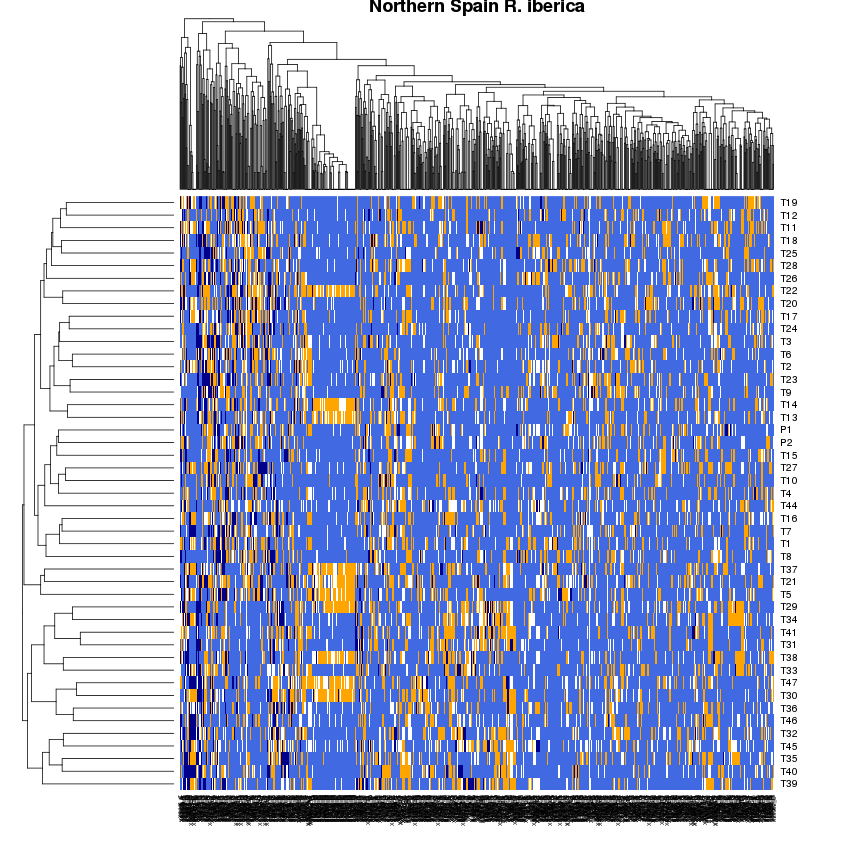

In [68]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/batch_1_plink_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


In [91]:
import vcf

popmap = open("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/sex_info.txt", 'r').readlines()

males = []
females = []

for line in popmap:
    line = line.strip()
    if line.split()[1] == "m" or line.split()[1] == "M":
        males.append(line.split()[0])
    elif line.split()[1] == "f" or line.split()[1] == "F":
        females.append(line.split()[0])
        
print "N males:", len(males)
print "N females:",  len(females)
print "N putative offspring:",  (len(males) + len(females)) -2

my_vcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/batch_1.vcf", 'r'))

combos = []

for male_sample in males:
    father = male_sample
    for female_sample in females:
        mother = female_sample
        combos.append((father, mother))

print len(combos)

## so, there are 47 samples altogether. 

sample_dict = {}


for record in my_vcf:
    for sample in record.samples:
        focal_sample = sample.sample ## this sample is called . . . X
        
        if focal_sample not in sample_dict: ## add it to the dict
            sample_dict[focal_sample] = []
                
        if sample.is_het == False: ## if this sample is homozygous
            other_hom_counter = 0 ## begin the counter for the number of other homozygotes
            GT = sample['GT']  ## get its genotype

            ## loop over other samples and find ones with a different homozygous genotype
            for other_sample in record.samples:
                other_sample_name = other_sample.sample
                if not other_sample_name == focal_sample:

                    if other_sample.is_het == False and not other_sample['GT'] == GT:
                        other_hom_counter += 1


        sample_dict[focal_sample].append(other_hom_counter)

N males: 25
N females: 22
N putative offspring: 45
550


In [115]:
import vcf

popmap = open("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/sex_info.txt", 'r').readlines()

males = []
females = []

for line in popmap:
    line = line.strip()
    if line.split()[1] == "m" or line.split()[1] == "M":
        males.append(line.split()[0])
    elif line.split()[1] == "f" or line.split()[1] == "F":
        females.append(line.split()[0])
        
print "N males:", len(males)
print "N females:",  len(females)
print "N putative offspring:",  (len(males) + len(females)) -2

my_vcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Family_2/batch_1.vcf", 'r'))

combos = []

for male_sample in males:
    father = male_sample
    for female_sample in females:
        mother = female_sample
        combos.append((father, mother))

print len(combos)

## so, there are 47 samples altogether. 

sample_dict = {}

samples = males + females


for record in my_vcf:
    for sample in record.samples:
        
        
        loci_counted = 0
        focal_sample = sample.sample ## this sample is called . . . X
        
        if focal_sample not in sample_dict: ## add it to the dict
            sample_dict[focal_sample] = []
                
        if sample.called == True and sample.is_het == False: ## if this sample is homozygous
            
            #print sample.sample, record.ID, sample['GT']
            loci_counted += 1
            other_hom_counter = 0 ## begin the counter for the number of other homozygotes
            GT = sample['GT']  ## get its genotype

            ## loop over other samples and find ones with a different homozygous genotype
            for other_sample in record.samples:
                other_sample_name = other_sample.sample
                #print record.ID, sample.sample, GT, other_sample_name, other_sample['GT']
                if not other_sample_name == focal_sample:

                    if other_sample.called == True and other_sample.is_het == False and not other_sample['GT'] == GT:
                        other_hom_counter += 1
                        #print record.ID, sample.sample, GT, other_sample_name, other_sample['GT'], "*****************"

        sample_dict[focal_sample].append(other_hom_counter)

N males: 25
N females: 22
N putative offspring: 45
550


In [120]:
import numpy as np

for i in sample_dict:
    print i, np.mean(sample_dict[i])/len(samples)
    

T38 0.0679847450823
T13 0.0622440786833
T14 0.062645523886
T15 0.0625250903252
T16 0.0593938177439
T17 0.0594941790446
T10 0.0639903653151
T11 0.0660578081092
T12 0.0638097149739
T39 0.075150541951
T36 0.0711561621839
T37 0.0692894419912
T34 0.0742874347652
T35 0.070293054998
T18 0.0614813327981
T19 0.0598755519872
T30 0.061621838619
T31 0.0634082697712
T32 0.0699116820554
T33 0.0728623042955
P2 0.0652549177037
P1 0.0648735447611
T8 0.0710758731433
T9 0.0678040947411
T6 0.0634684865516
T7 0.0689482135688
T4 0.0640305098354
T5 0.0721196306704
T2 0.0627458851867
T3 0.0670814933762
T1 0.0597551184263
T29 0.0667001204336
T28 0.0665596146126
T21 0.0708350060217
T20 0.0700923323966
T23 0.0667804094741
T22 0.0641509433962
T25 0.0627258129265
T24 0.0654556403051
T27 0.0666599759133
T26 0.0688679245283
T41 0.0732436772381
T40 0.0782617422722
T47 0.0690485748695
T46 0.0601967081493
T45 0.074849458049
T44 0.0740867121638


Ok, so there are no parents in this dataset by the looks of it! Can still make a linkage map from this I guess, just with no parents. 

## Manual mapping

In [121]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

Rtemp_fasta = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa"
Rtemp_db = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2-blastn-db"

Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-5
Eval_threshold = 1e-20
Window = 8000

wd = "/home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_iberica/"
prefix = "R_ibe"

### Tags to Rtemp

print "\n##  Mapping tags to R. temporaria  ##\n"

tags ="%s/%s" % (wd, "R_iberica_fam.fa")
tags_to_Rtemp_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rtemp_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Rtemp_db, outfmt=5, out=tags_to_Rtemp_blastnouts)
stdout, stderr = blastn_cline()

Rtemp_records = MISC.BlastParseExtra(tags_to_Rtemp_blastnouts, Rtemp_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_blast_chunks = "%s/%s" % (wd,  "%s_%s" % (prefix, "Rtemp_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_blast_chunks)


### Rtemp chunks to Nanorana

print "\n##  Mapping Rtemp chunks Nanorana  ##\n"

tags_Rtemp_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_blast_chunks, db=Nanorana_db, outfmt=5, out=tags_Rtemp_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Rtemp_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_8k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Rtemp_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Rtemp_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Rtemp_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Rtemp_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_Xen_8kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_8000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping tags to R. temporaria  ##

Number of multi-alingments kept: 55
Number of unique alingments kept: 68
Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa . . . 
123 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_iberica//blast_8000_chunks.fa

##  Mapping Rtemp chunks Nanorana  ##

Number of multi-alingments kept: 64
Number of unique alingments kept: 2
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
60 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_iberica//blast_8000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 9
Number of unique alingments kept: 2
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/

## R. iberica central spain

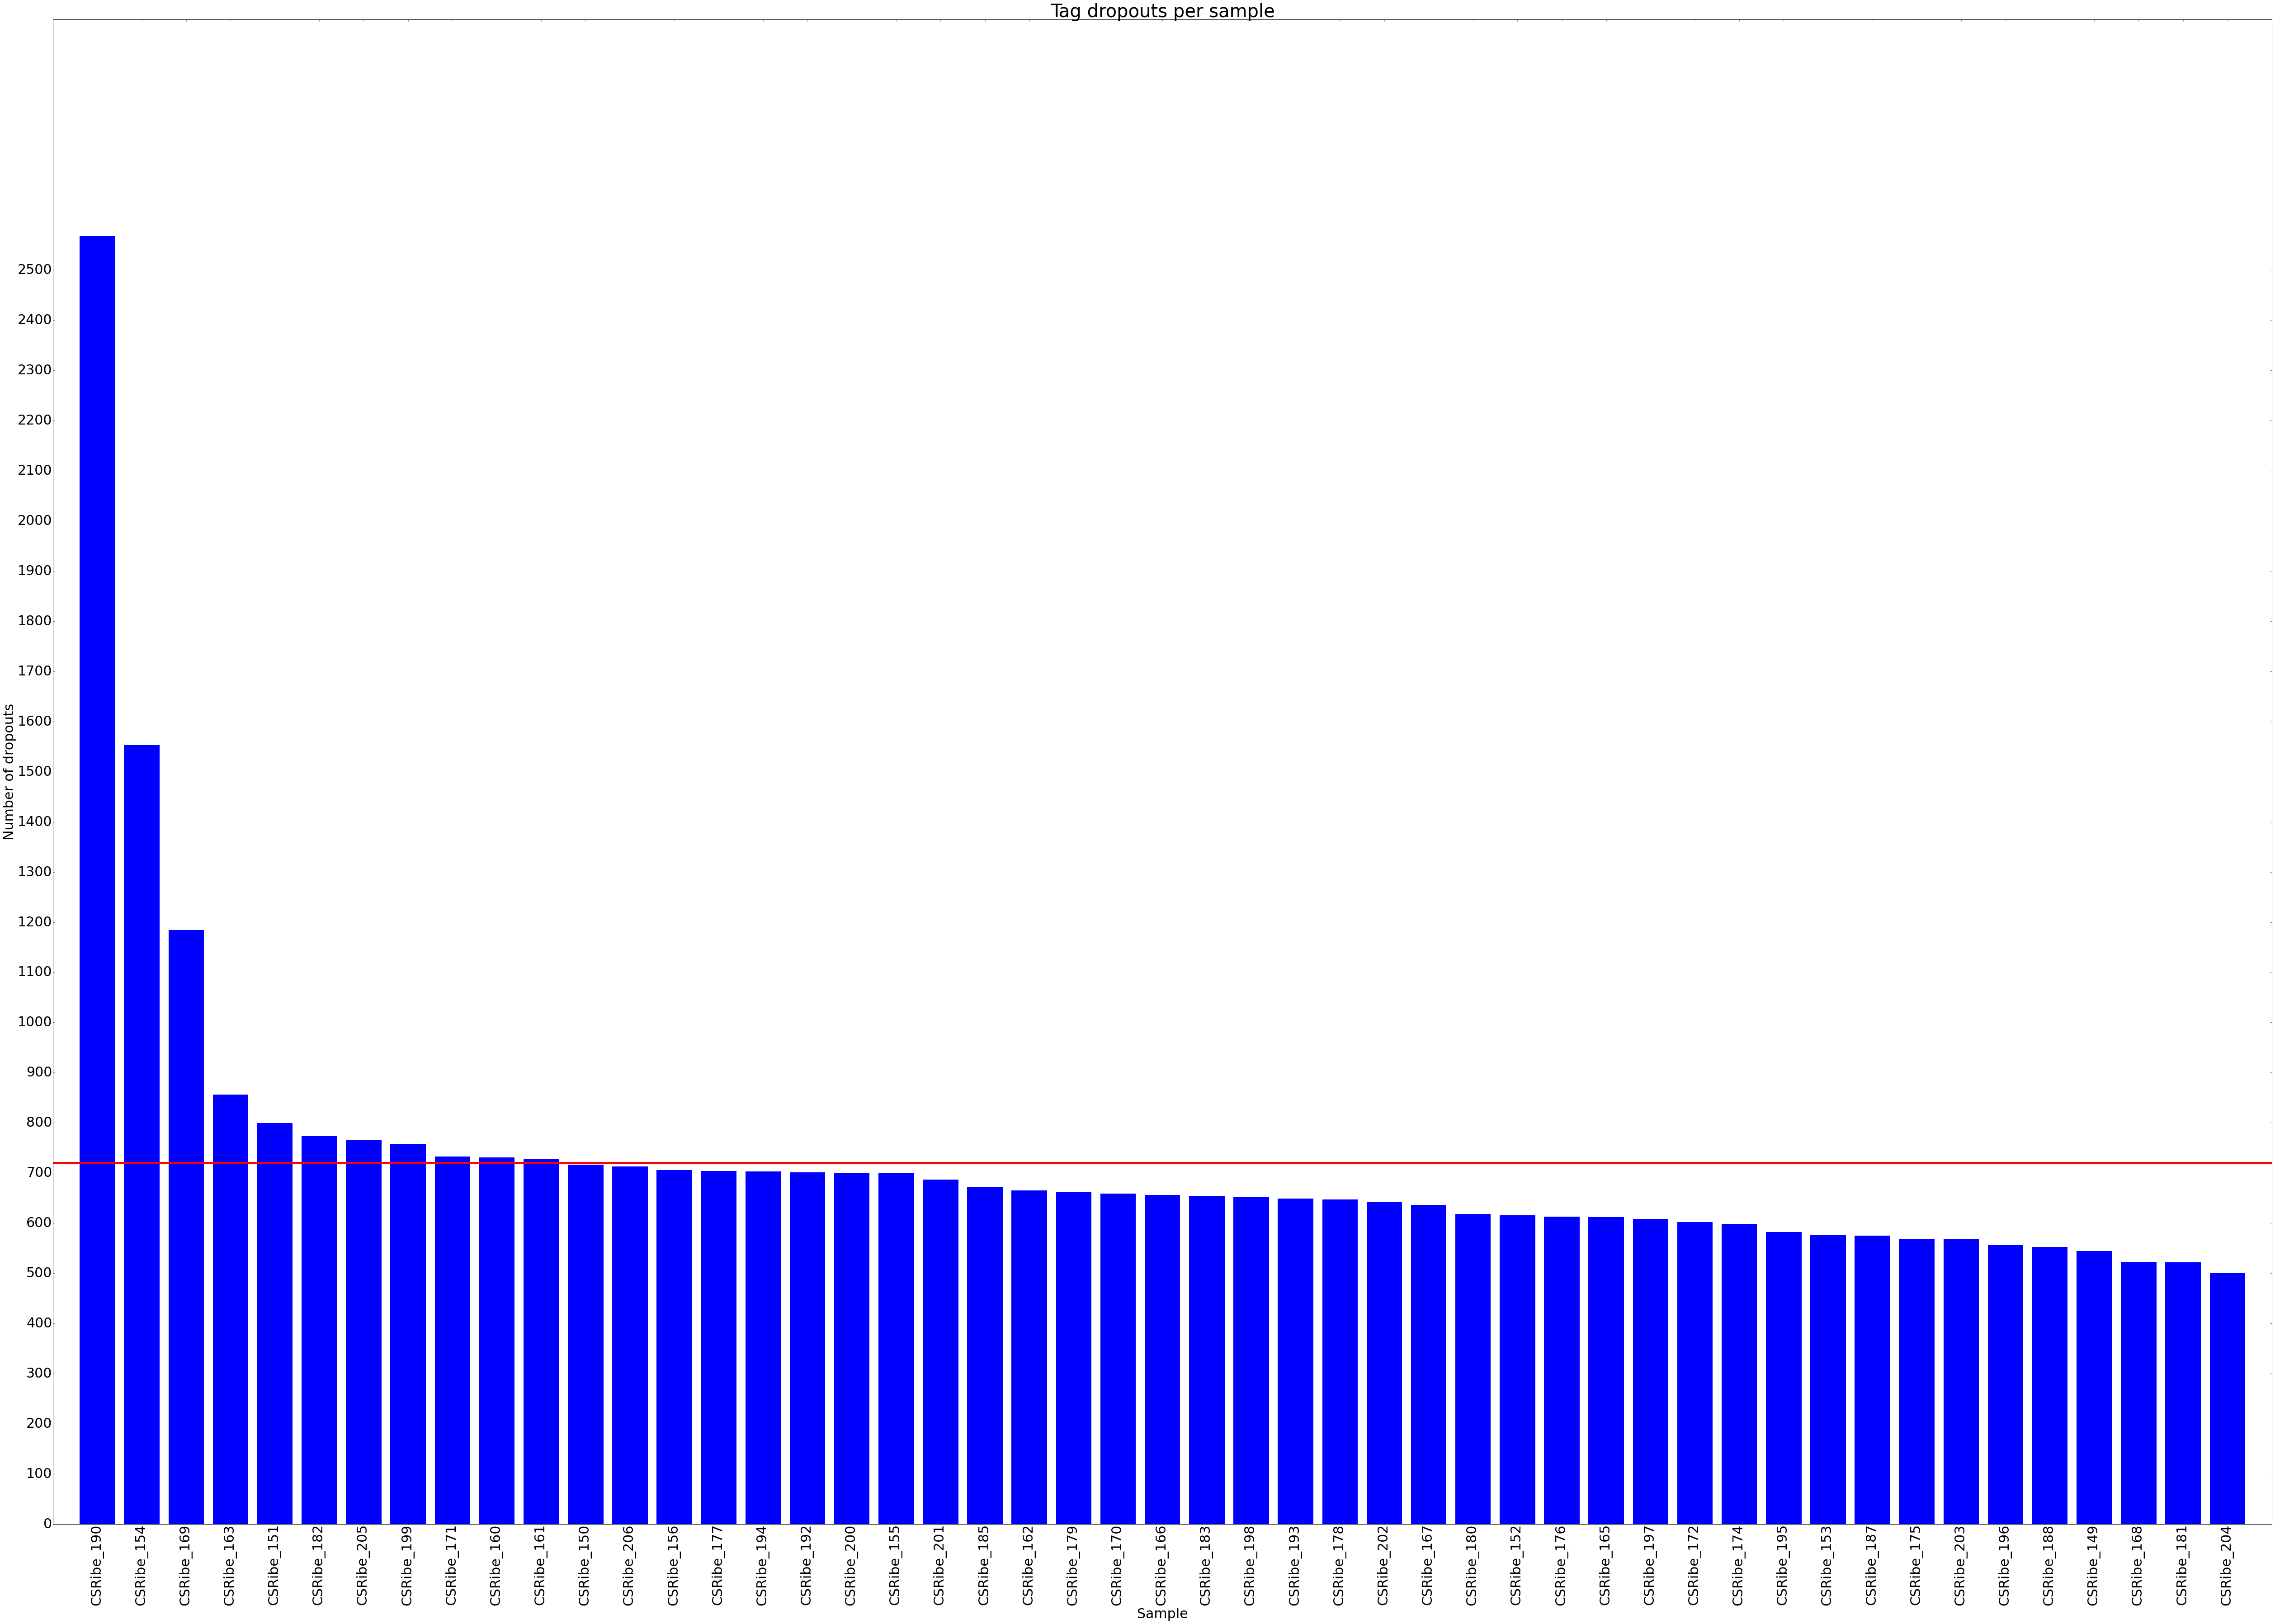

Outputs written to:
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//blacklist.txt


In [5]:
wd = "/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)


A couple of bad samples, but won't affect N snps

In [6]:
%%bash

wd=/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_plink

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//batch_1_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//batch_1_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 10k variants complete.
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//batch_1_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//batch_1_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//batch_1_plink-temporary.fam
written.
10977 variants loaded from .bim file.
49 people (0 males, 0 females, 49 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//bat

In [25]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:


## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



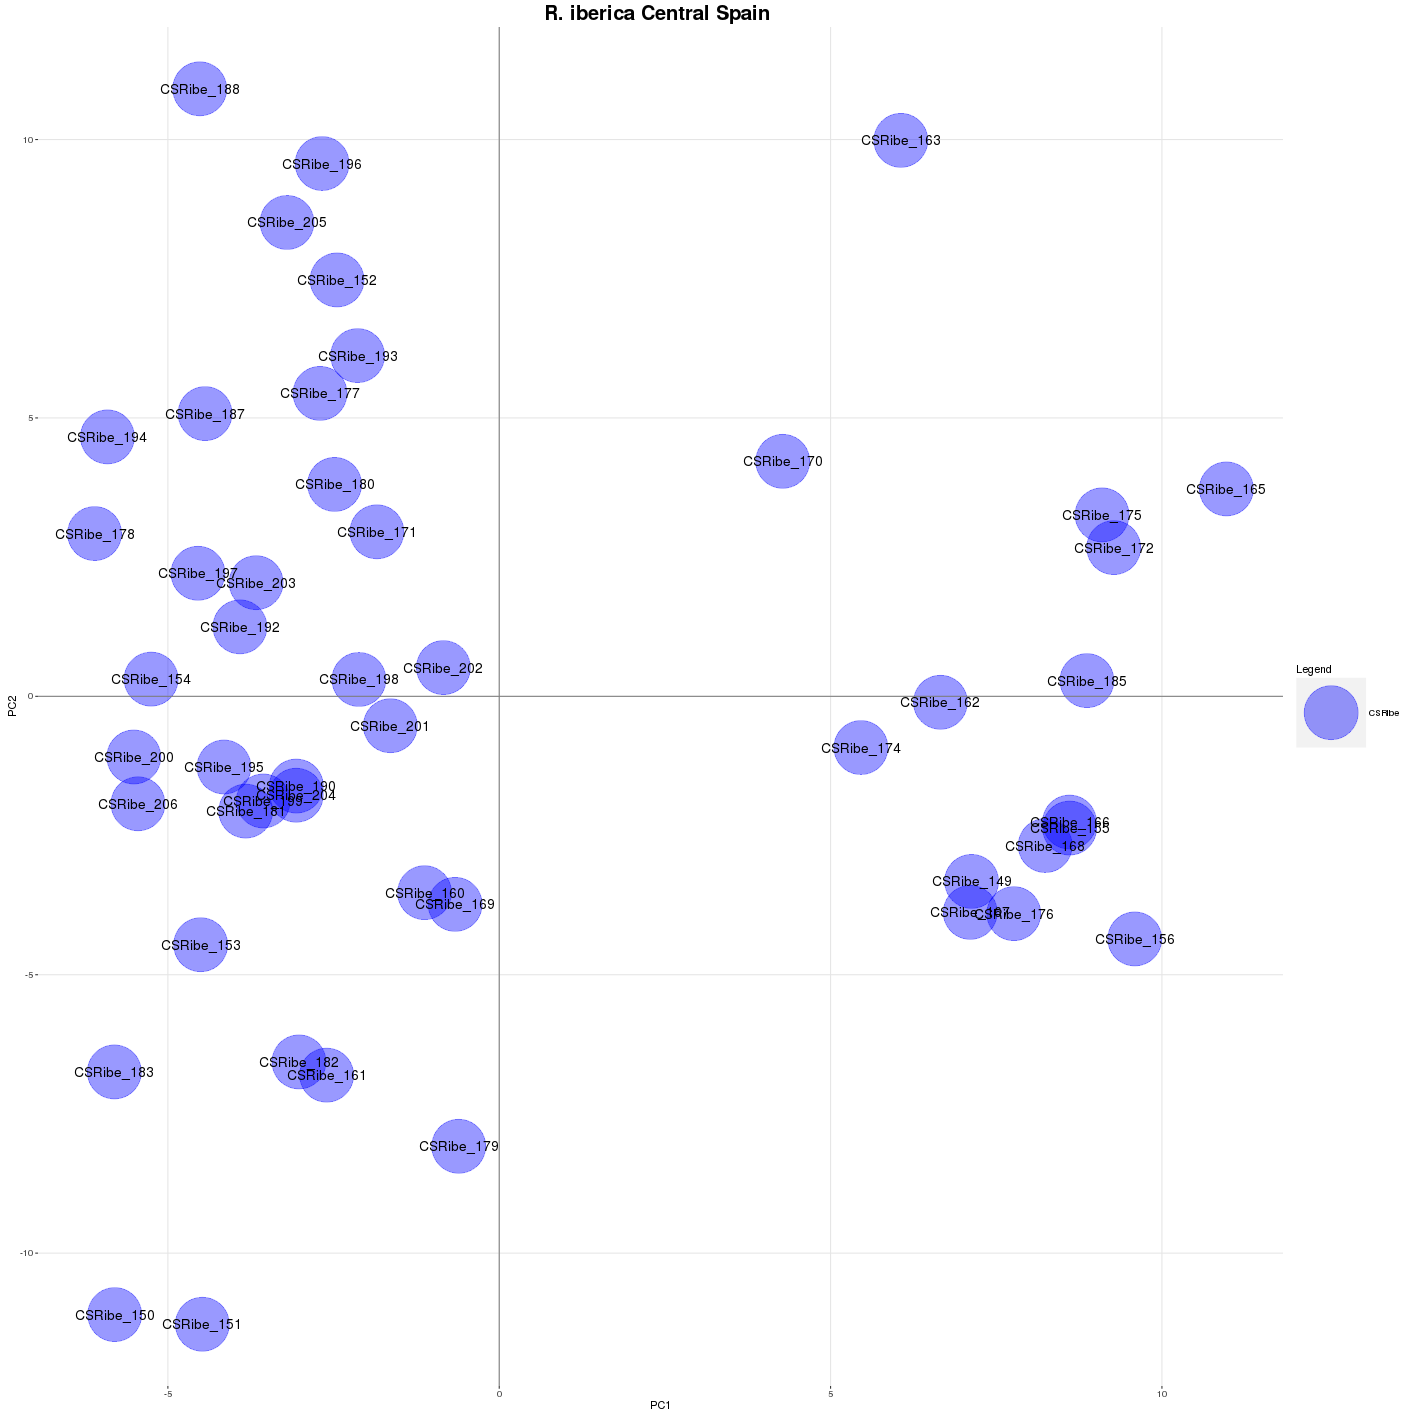

In [26]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

sexes <- read.delim("popmap.txt", header = F)

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Central Spain ", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("blue", "yellow"), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

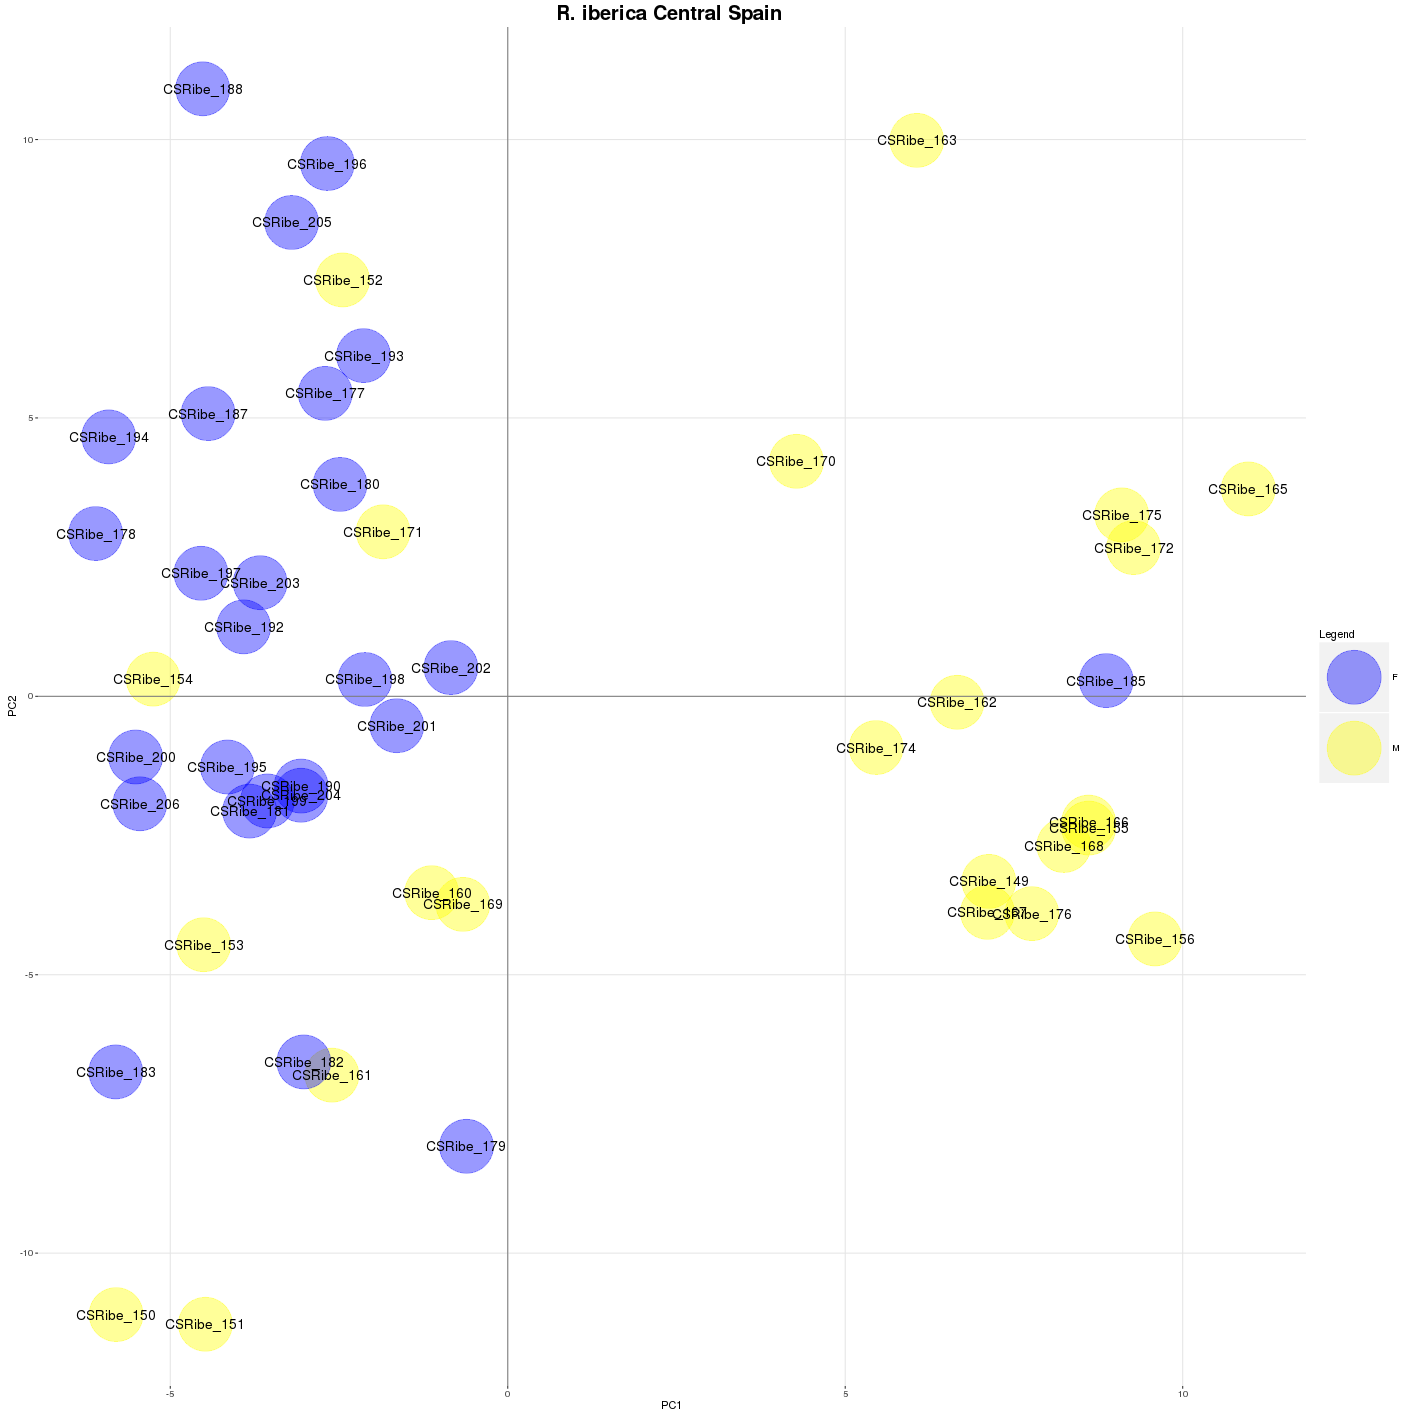

In [14]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

sexes <- read.delim("sex_info.txt", header = F)

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Central Spain ", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("blue", "yellow"), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

In [9]:

%%bash

wd=/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/batch_1_plink.raw  $wd/batch_1_plink_heatmap_input


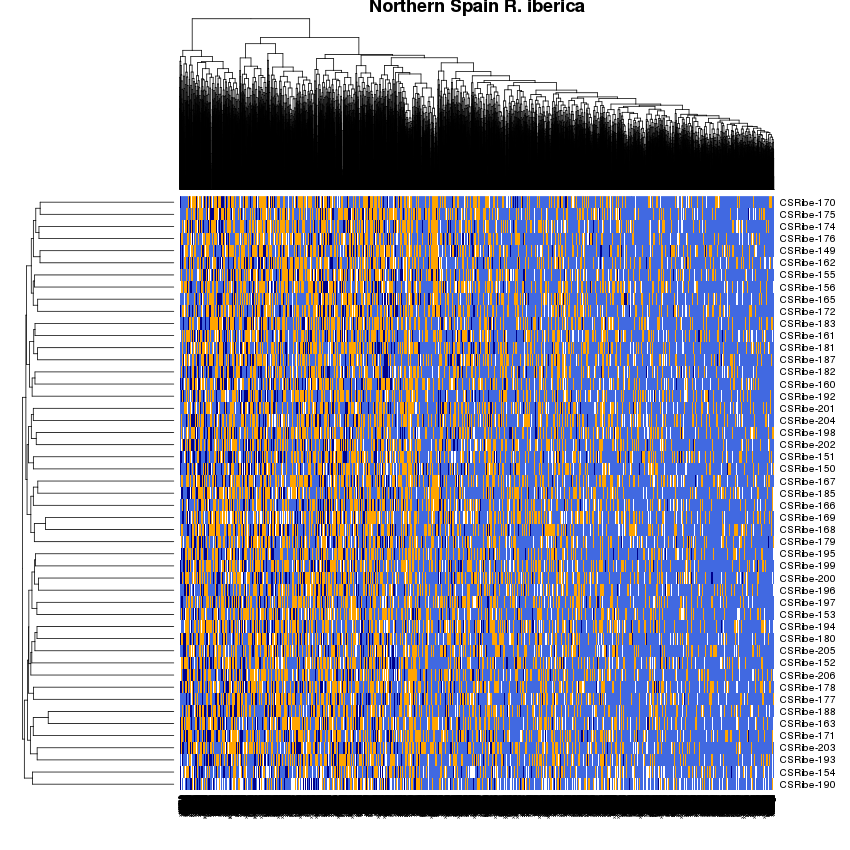

In [11]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/batch_1_plink_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


In [27]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/Sex_ID_info_altered.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 10977
Number of samples = 49
Number of loci with too few samples = 1352
Number of loci with low MAF = 0
Number of loci with enough data = 9624
Number of putative X linked snps = 46
Number of putative X linked tags = 46
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


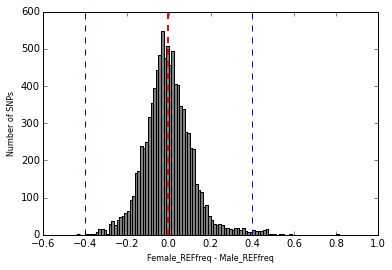


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 10977
Number of samples = 49
Number of loci with too few samples = 1351
Number of loci with low MAF = 0
Number of loci with enough data = 9624
Number of putative X linked snps = 28
Number of putative X linked tags = 28
Number of putative Z linked markers = 1
Number of putative Z linked tags = 1

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 34

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:60: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")
/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:52: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")



Number of males: 15
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2

 ## After merging tags accross methods ## 

Final number of XY tags = 47
Final number of ZW tags = 1


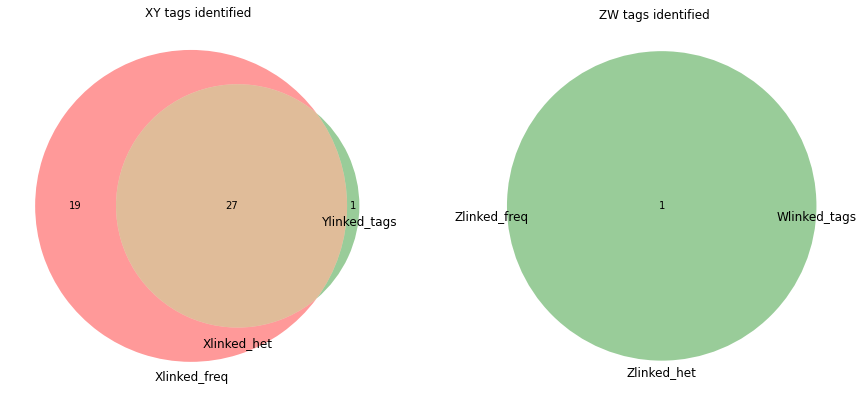

In [28]:
CS_XYset, CS_ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [29]:
vcf_path = "/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/batch_1.vcf"

MISC.filter_vcf(vcf_path,CS_XYset, "Central_Spain_XY_linked_snps_freq_het.vcf")

In [30]:
%%bash

wd=/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/  ## just change this line

## All data 
sed 's/_/-/g' $wd/Central_Spain_XY_linked_snps_freq_het.vcf > $wd/XY_batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/XY_batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_batch_1_plink

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//XY_batch_1_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//XY_batch_1_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//XY_batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//XY_batch_1_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//XY_batch_1_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//XY_batch_1_plink-temporary.fam
written.
47 variants loaded from .bim file.
49 people (0 males, 0 females, 49 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2//XY_batch_1_

In [31]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('XY_batch_1_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:


## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



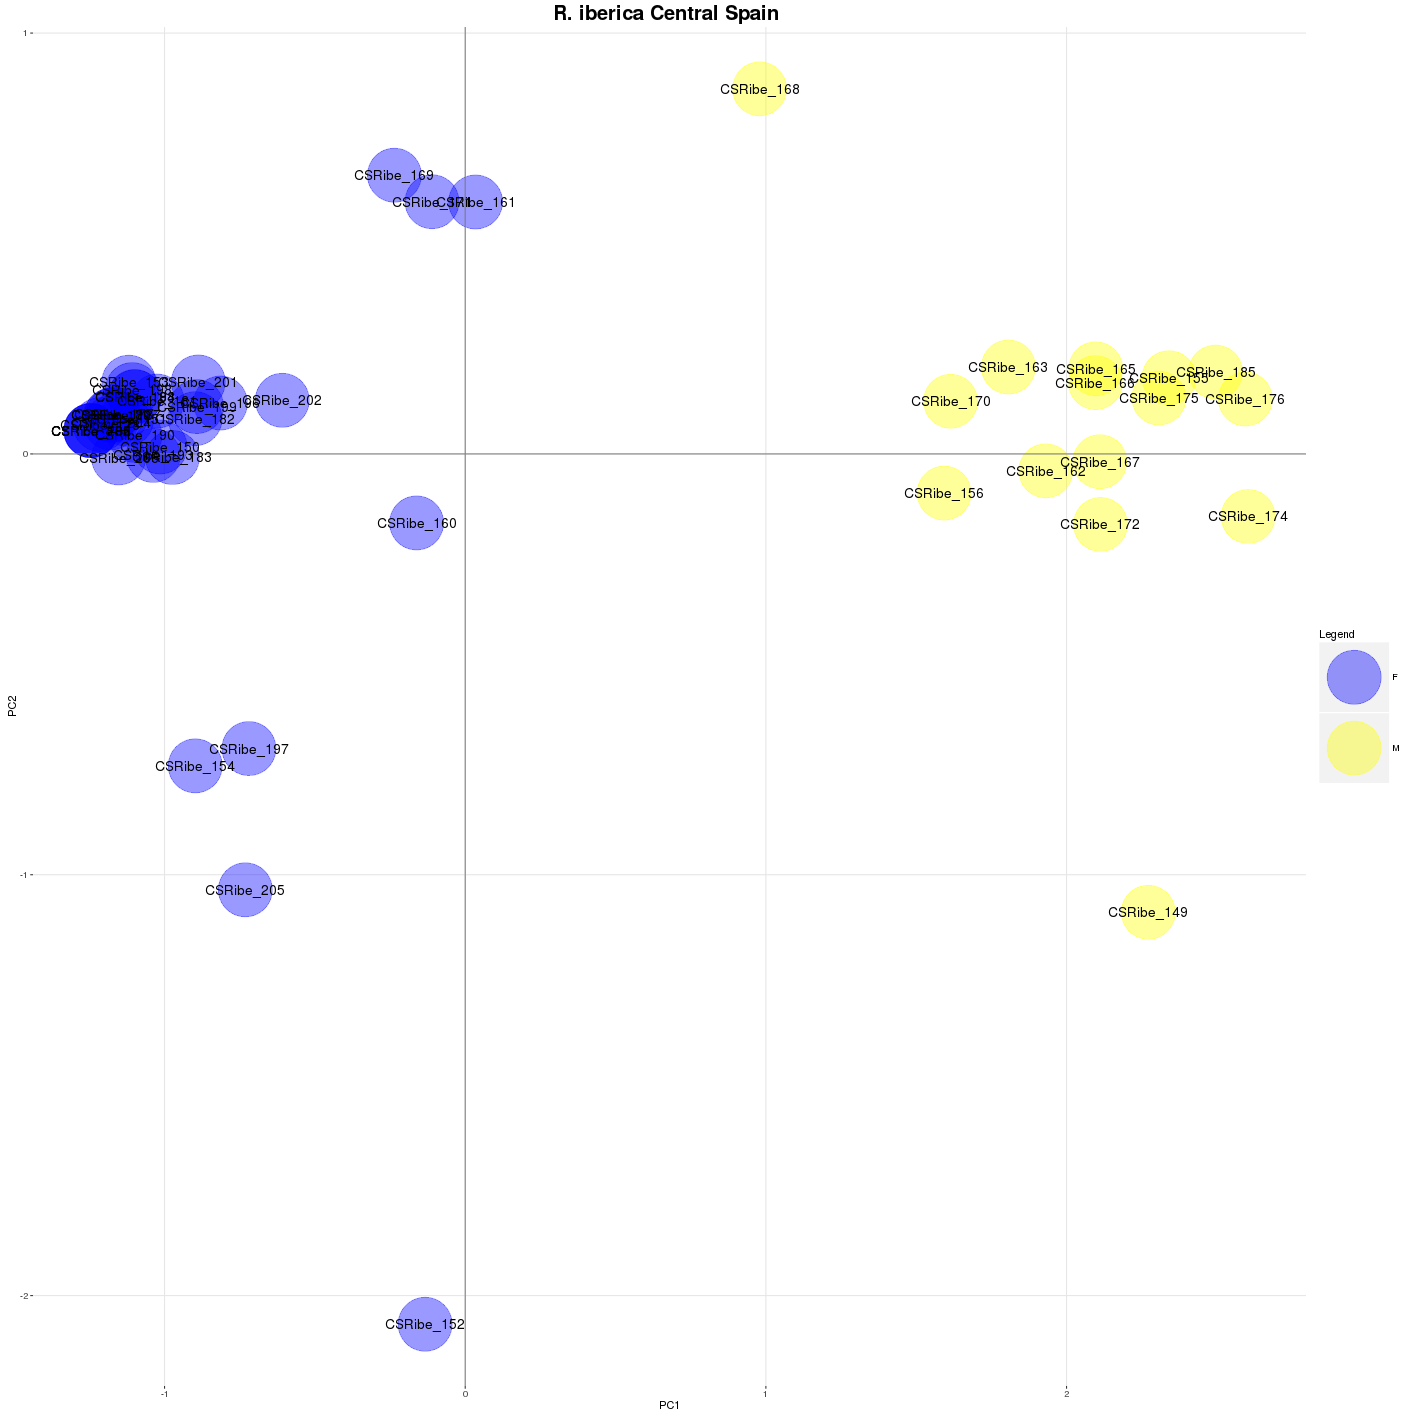

In [32]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

sexes <- read.delim("sex_info_altered.txt", header = F)

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Central Spain ", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("blue", "yellow"), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

There is a lot of variation at these loci, especially in females - could be quite a lot of diversity on the X. Would probably find more sex linked markers by removing some of these females - can try another time. 

In [33]:

%%bash

wd=/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/XY_batch_1_plink.raw  $wd/XY_batch_1_plink_heatmap_input


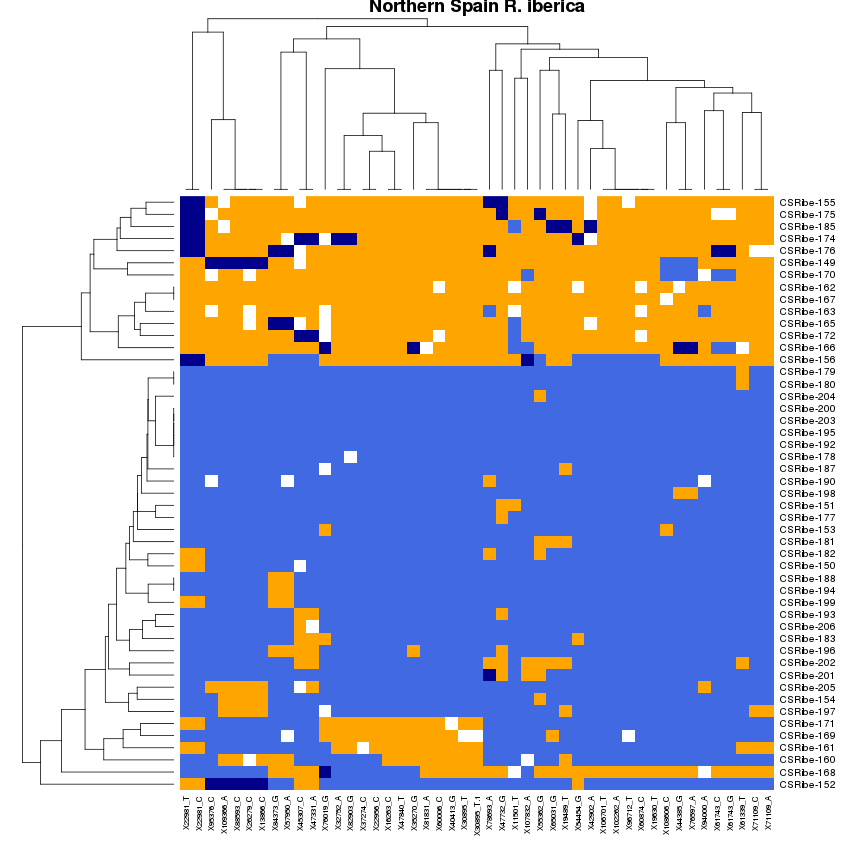

In [34]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Ribe_CS/Populations_kept2/XY_batch_1_plink_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")


## All iberica populations (Broad analyses)

In [35]:
%%bash

wd=/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_plink

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/batch_1_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/batch_1_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 16k variants complete.
/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/batch_1_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/batch_1_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/batch_1_plink-temporary.fam
written.
16788 variants loaded from .bim file.
209 people (0 males, 0 females, 209 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/djeffrie/Data/RADseq/Ribe

In [36]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:


## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



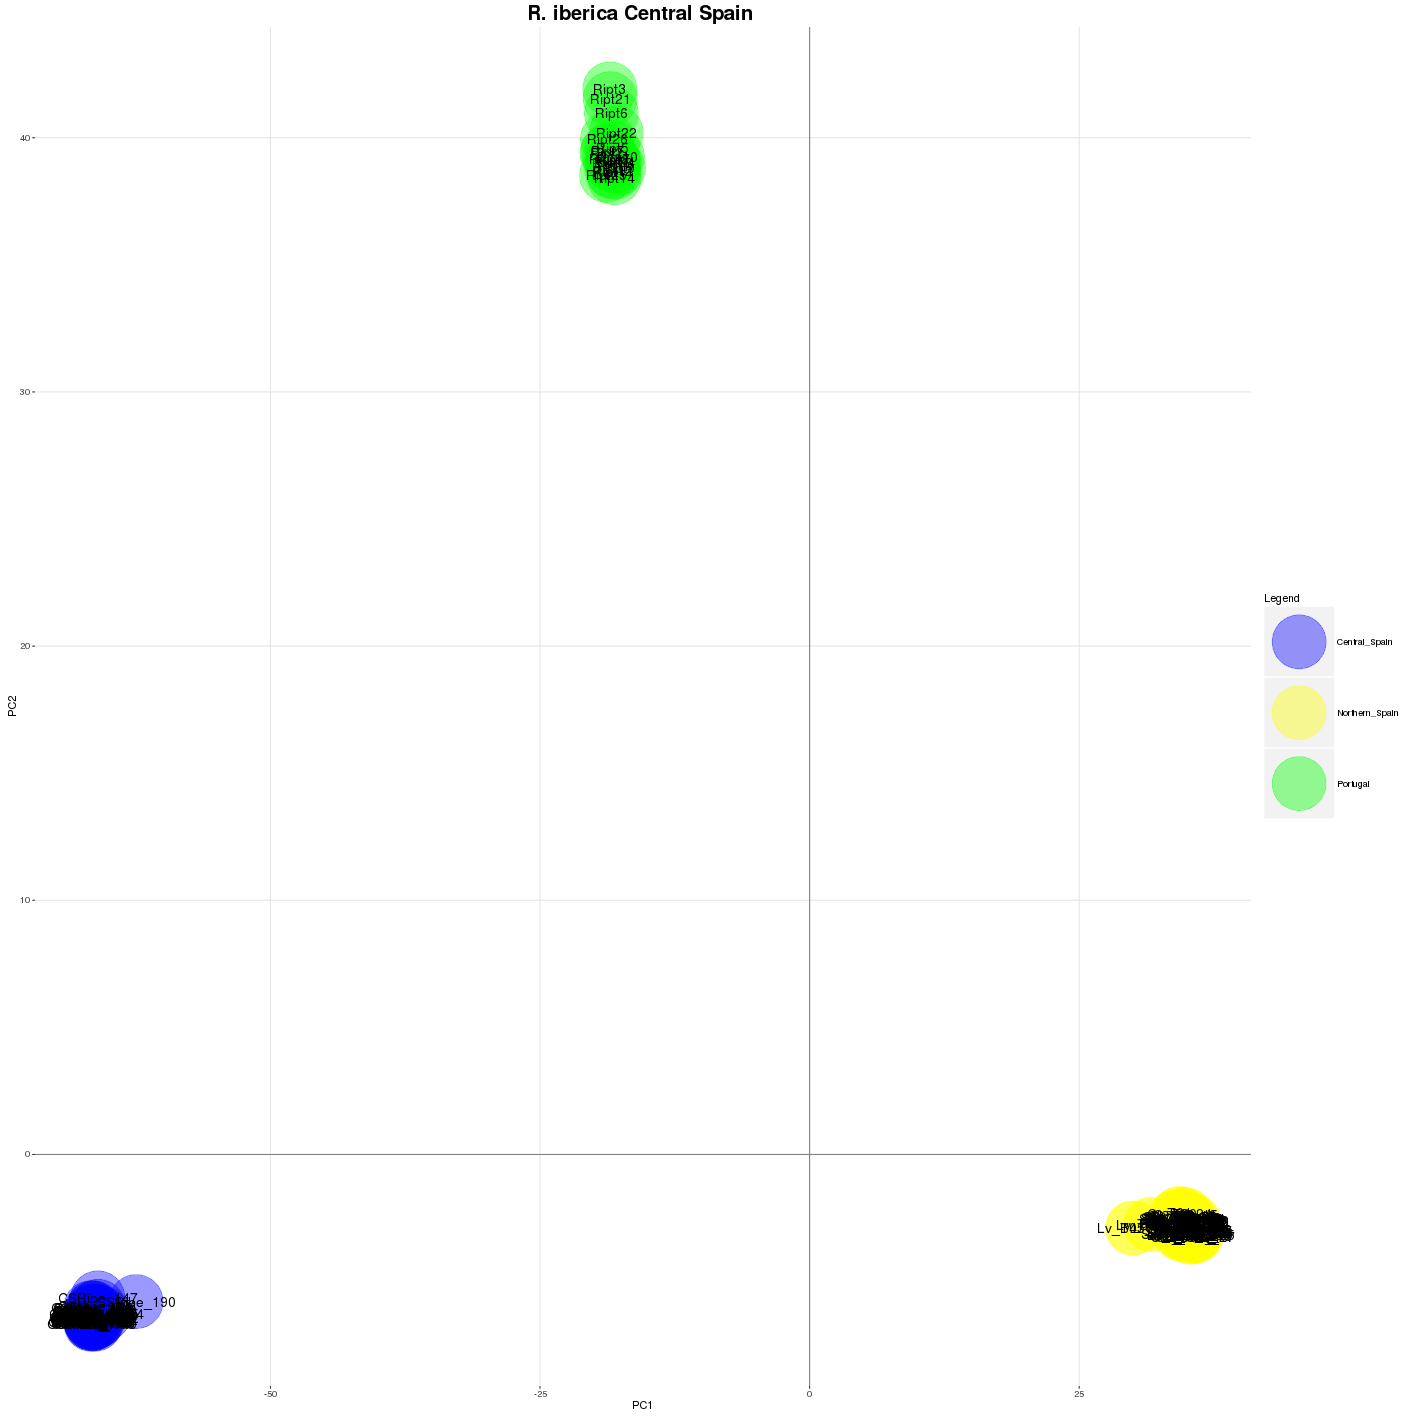

In [39]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

sexes <- read.delim("../popmap_all_broad.txt", header = F)

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Central Spain ", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("blue", "yellow", "green"), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

### Sex linked tags in Cetral spainish population.

In [42]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_CSRibe_altered_sexes/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_CSRibe_altered_sexes/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_CSRibe_altered_sexes/Sex_ID_info_altered.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 9180
Number of samples = 49
Number of loci with too few samples = 786
Number of loci with low MAF = 0
Number of loci with enough data = 8393
Number of putative X linked snps = 42
Number of putative X linked tags = 42
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


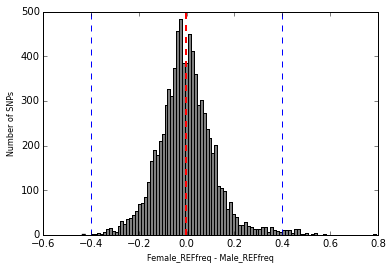


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 9180
Number of samples = 49
Number of loci with too few samples = 786
Number of loci with low MAF = 0
Number of loci with enough data = 8393
Number of putative X linked snps = 26
Number of putative X linked tags = 26
Number of putative Z linked markers = 1
Number of putative Z linked tags = 1

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 34
Number of males: 15
Number of Putative Y linked tags: 9
Number of Putative W linked tags: 1

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Ribe_ALL/Populations_CSRibe_altered_sexes

 ## After merging tags accross methods ## 

Final number of XY tags = 52
Final number of ZW tags = 2


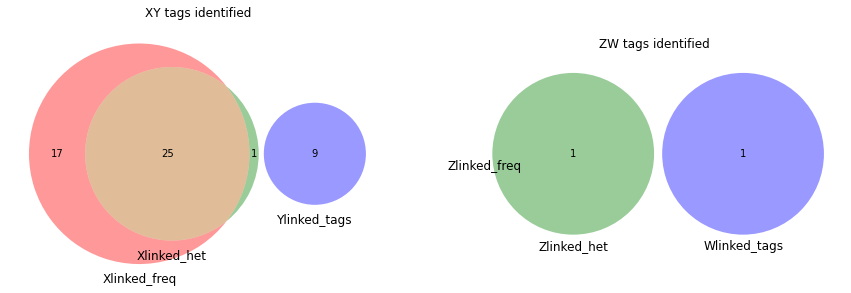

In [43]:
CS_XYset, CS_ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [51]:
CS_XYset = set(CS_XYset)

<matplotlib_venn._common.VennDiagram instance at 0x7fed1c0f3a70>

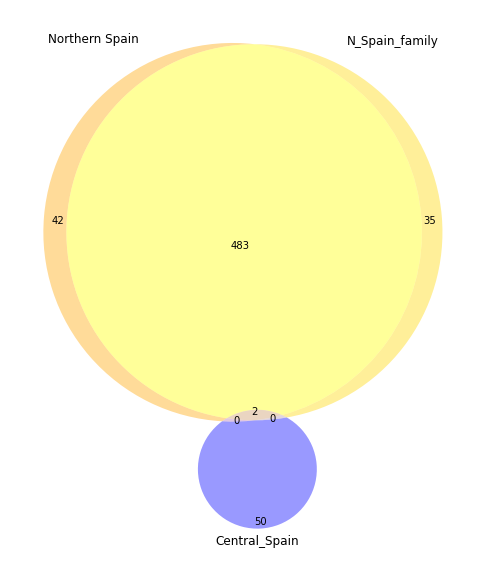

In [58]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

plt.figure(figsize = (10,10))

venn3([N_Spain_XYset, Fam_XYset, CS_XYset], set_labels=("Northern Spain", "N_Spain_family", "Central_Spain"), set_colors=('orange','gold', 'blue') )

### Now lets see what each population looks like at the sex linked markers found in all populations.


In [60]:
All_SLMs = list(N_Spain_XYset) + list(Fam_XYset) + list(CS_XYset)

In [61]:
vcf_path = "/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/batch_1.vcf"

MISC.filter_vcf(vcf_path,All_SLMs, "Ribe_all_XY_linked_snps_freq_het.vcf")

In [62]:
%%bash

wd=/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/  ## just change this line

## All data 
sed 's/_/-/g' $wd/Ribe_all_XY_linked_snps_freq_het.vcf > $wd/Ribe_all_XY_linked_snps_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/Ribe_all_XY_linked_snps_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/Ribe_all_XY_linked_snps_plink

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad//Ribe_all_XY_linked_snps_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad//Ribe_all_XY_linked_snps_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad//Ribe_all_XY_linked_snps_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad//Ribe_all_XY_linked_snps_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad//Ribe_all_XY_linked_snps_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad//Ribe_all_XY_linked_snps_plink-temporary.fam
written.
193 variants loaded from .bim file.
209 people (0 males, 0 females, 209 ambiguous) l

In [63]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('Ribe_all_XY_linked_snps_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:


## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



In [64]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

sexes <- read.delim("../Sex_ID_info_ALL.txt", header = F)

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. iberica Central Spain ", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("blue", "yellow"), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 


Error: Unequal parameter lengths: x (209), y (209), label (176)


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error: Unequal parameter lengths: x (209), y (209), label (176)

  warnings.warn(x, RRuntimeWarning)


In [66]:

%%bash

wd=/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/Ribe_all_XY_linked_snps_plink.raw  $wd/Ribe_all_XY_linked_snps_heatmap_input


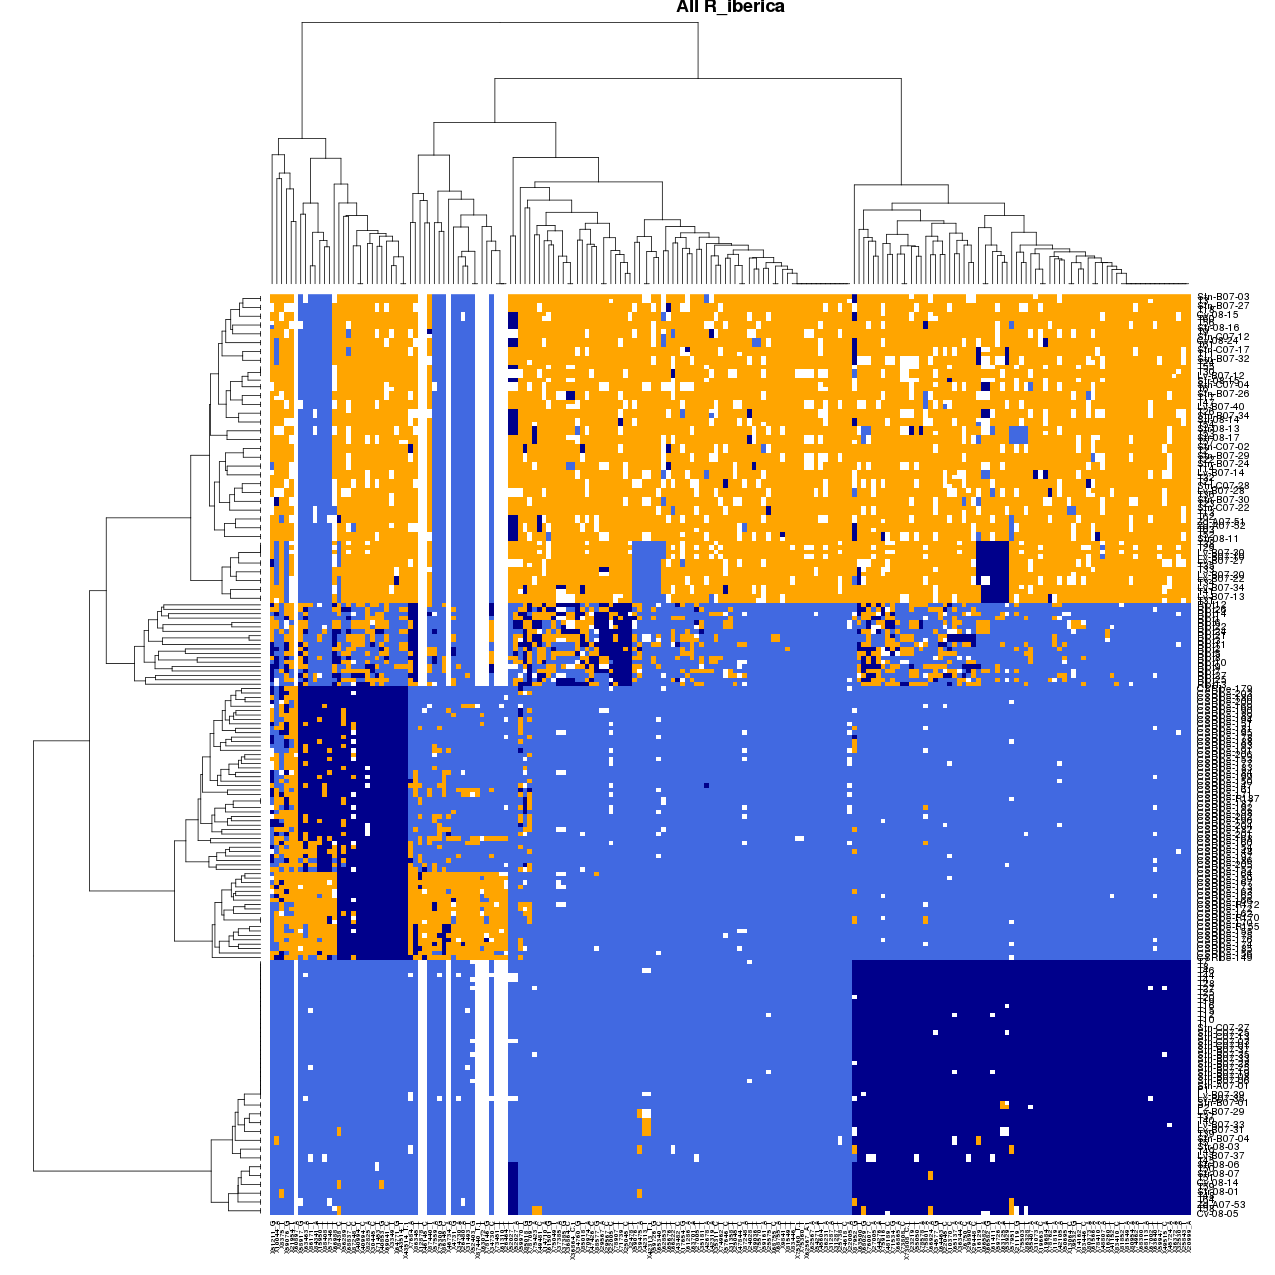

In [69]:
%%R -w 45 -h 45 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Ribe_ALL/Populations_all_broad//Ribe_all_XY_linked_snps_heatmap_input.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "All R_iberica")


## Adding the new data from our sampling trip in 2017!

In [3]:
%%bash

wd=/home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all  ## just change this line

## All data 
sed 's/_/-/g' $wd/batch_1.vcf > $wd/batch_1_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all/batch_1_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf: 68k variants complete.
/home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all/batch_1_altered_adegenet_plink-temporary.fam
written.
68061 variants loaded from .bim file

In [4]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("/home/djeffrie/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Riberica/New_RAD_data/Populations_all/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap_all.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
   /// adegenet 2.0.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



  warnings.warn(x, RRuntimeWarning)
/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



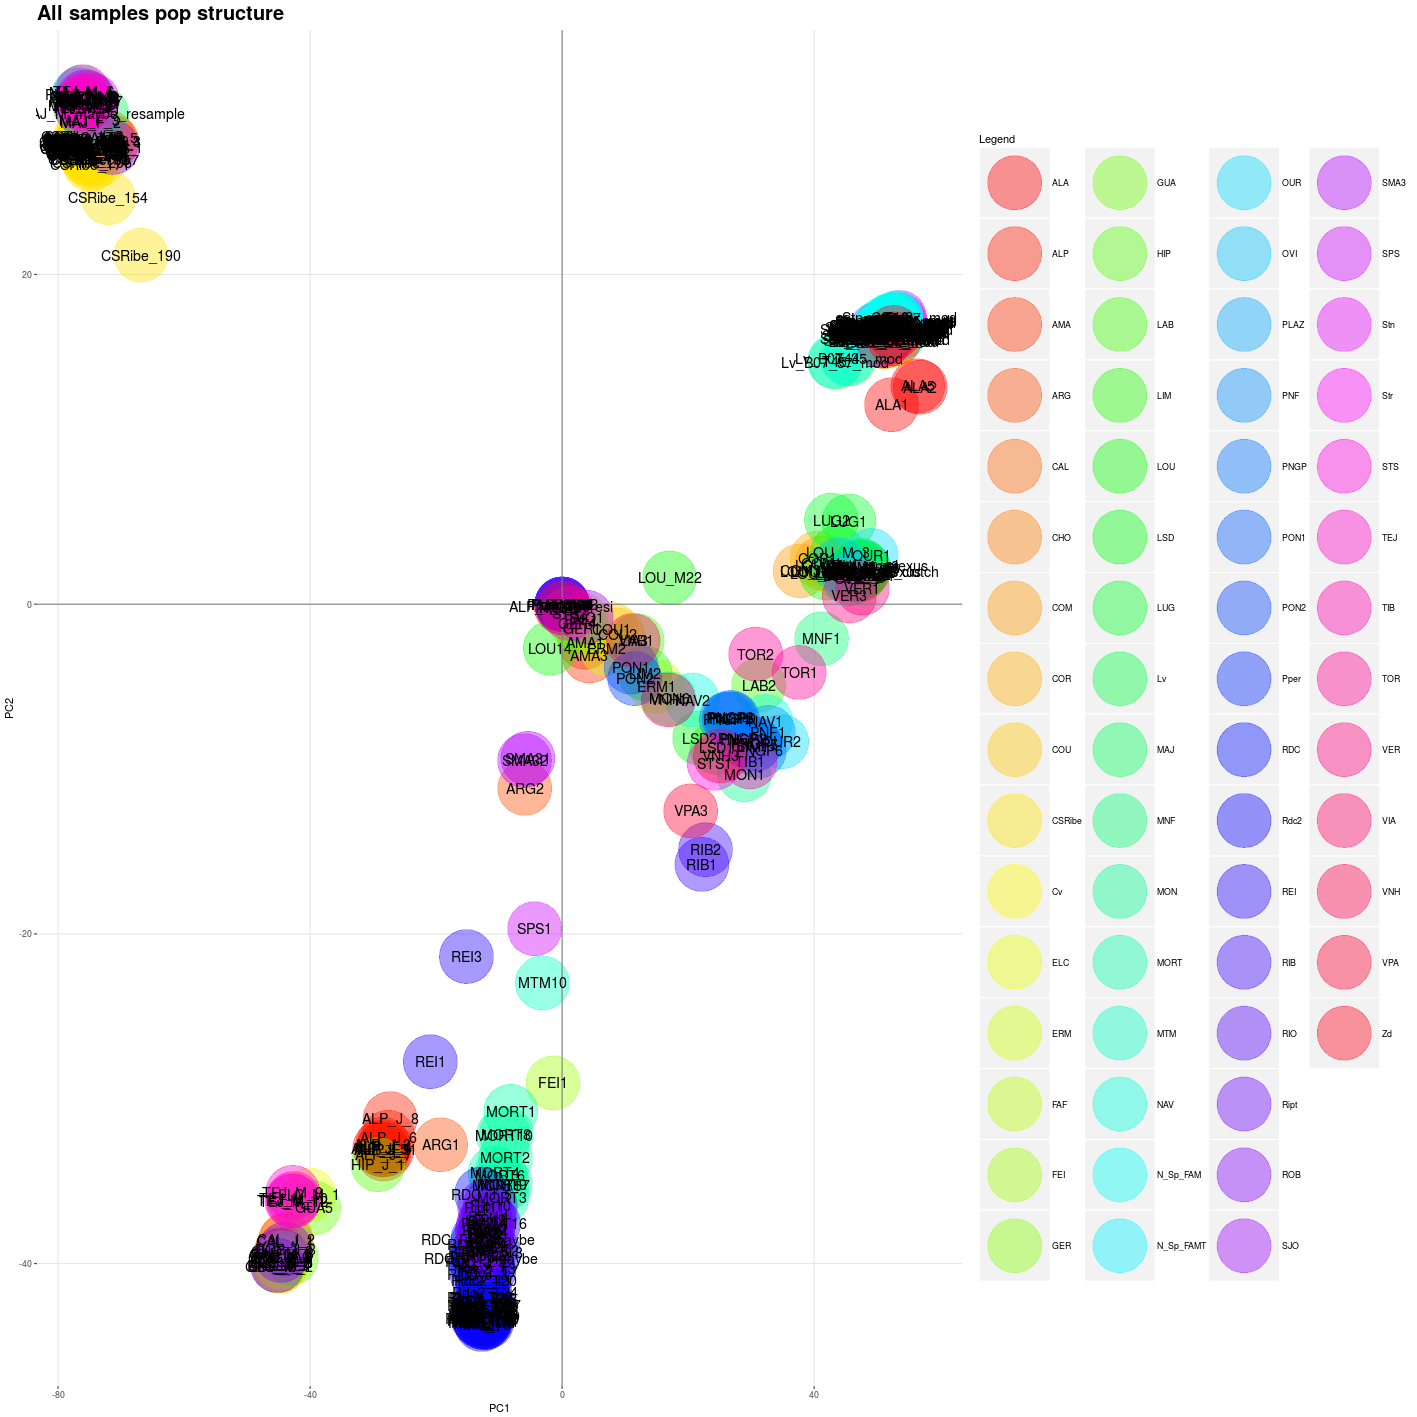

In [7]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "All samples pop structure", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(61), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

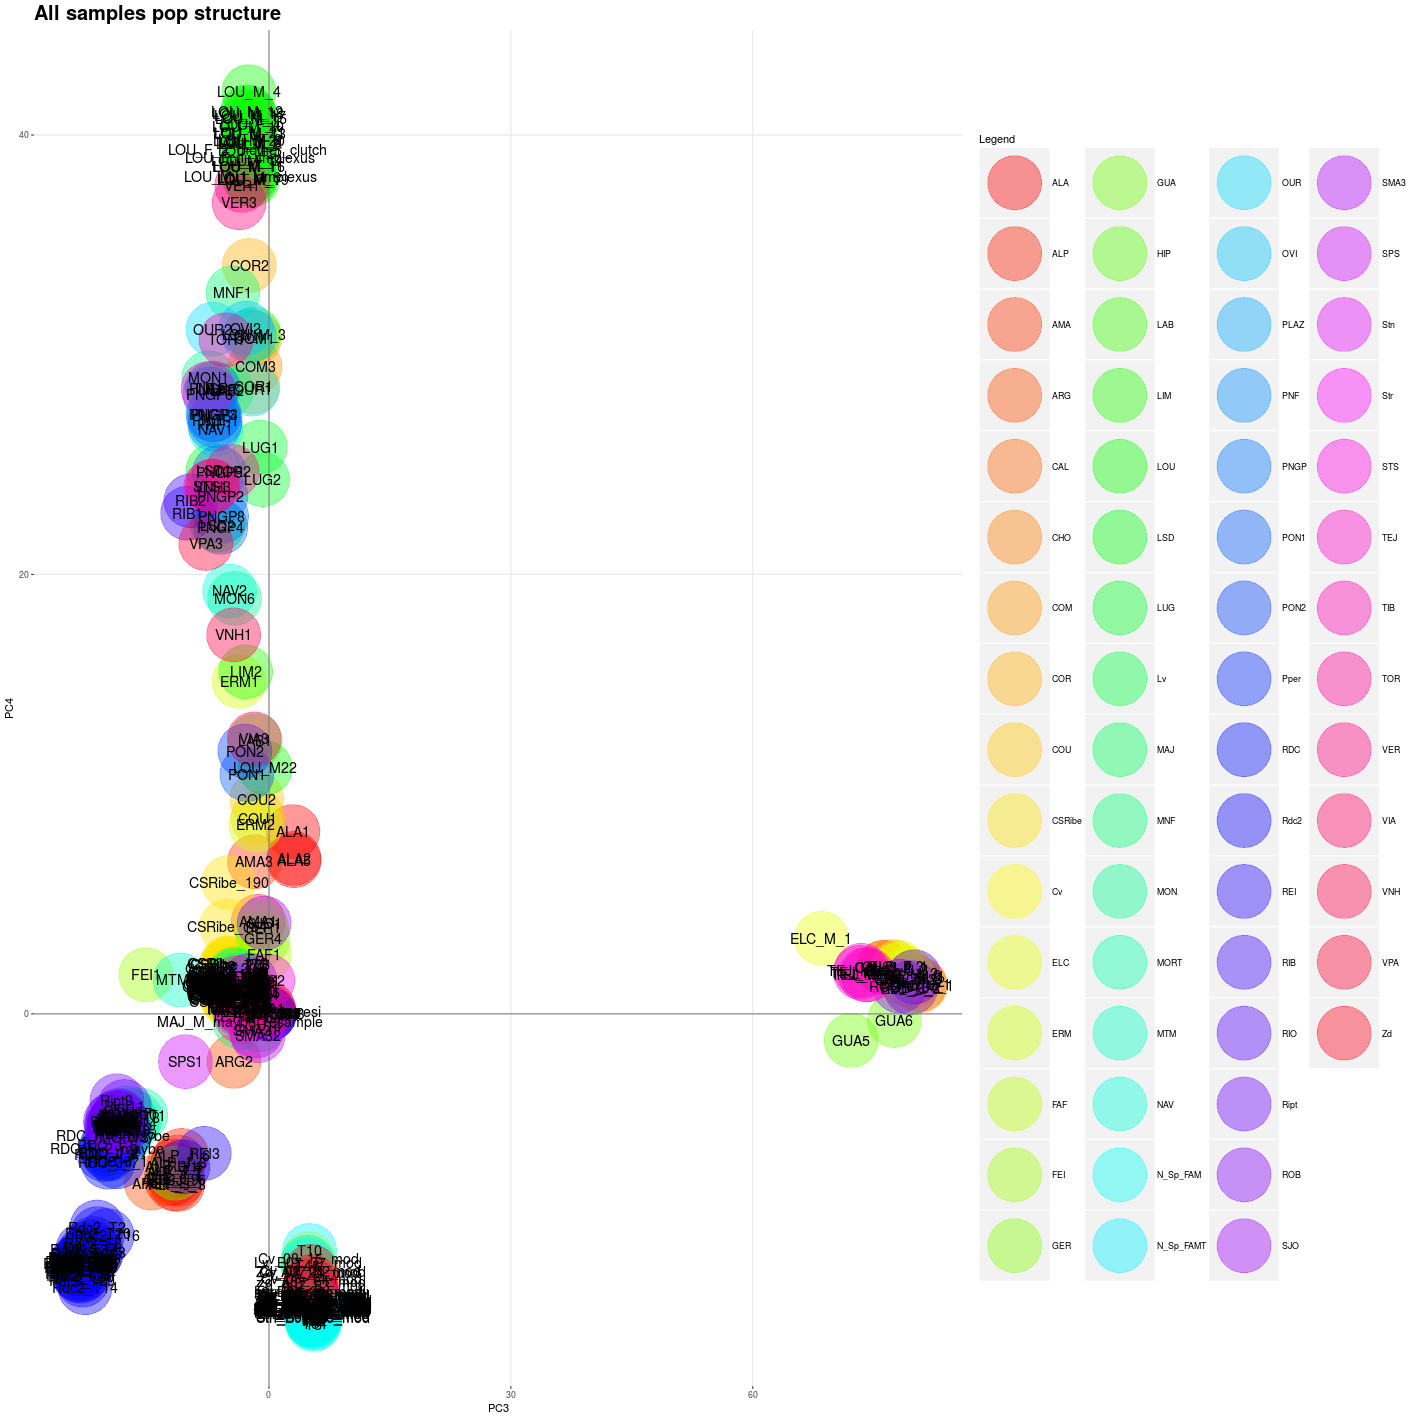

In [8]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(3,4), ## which components to plot
           Title = "All samples pop structure", ## plot title
           xtitle = "PC3", ## X axis title
           ytitle = "PC4", ## Y axis title 
           Palette = rainbow(61), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

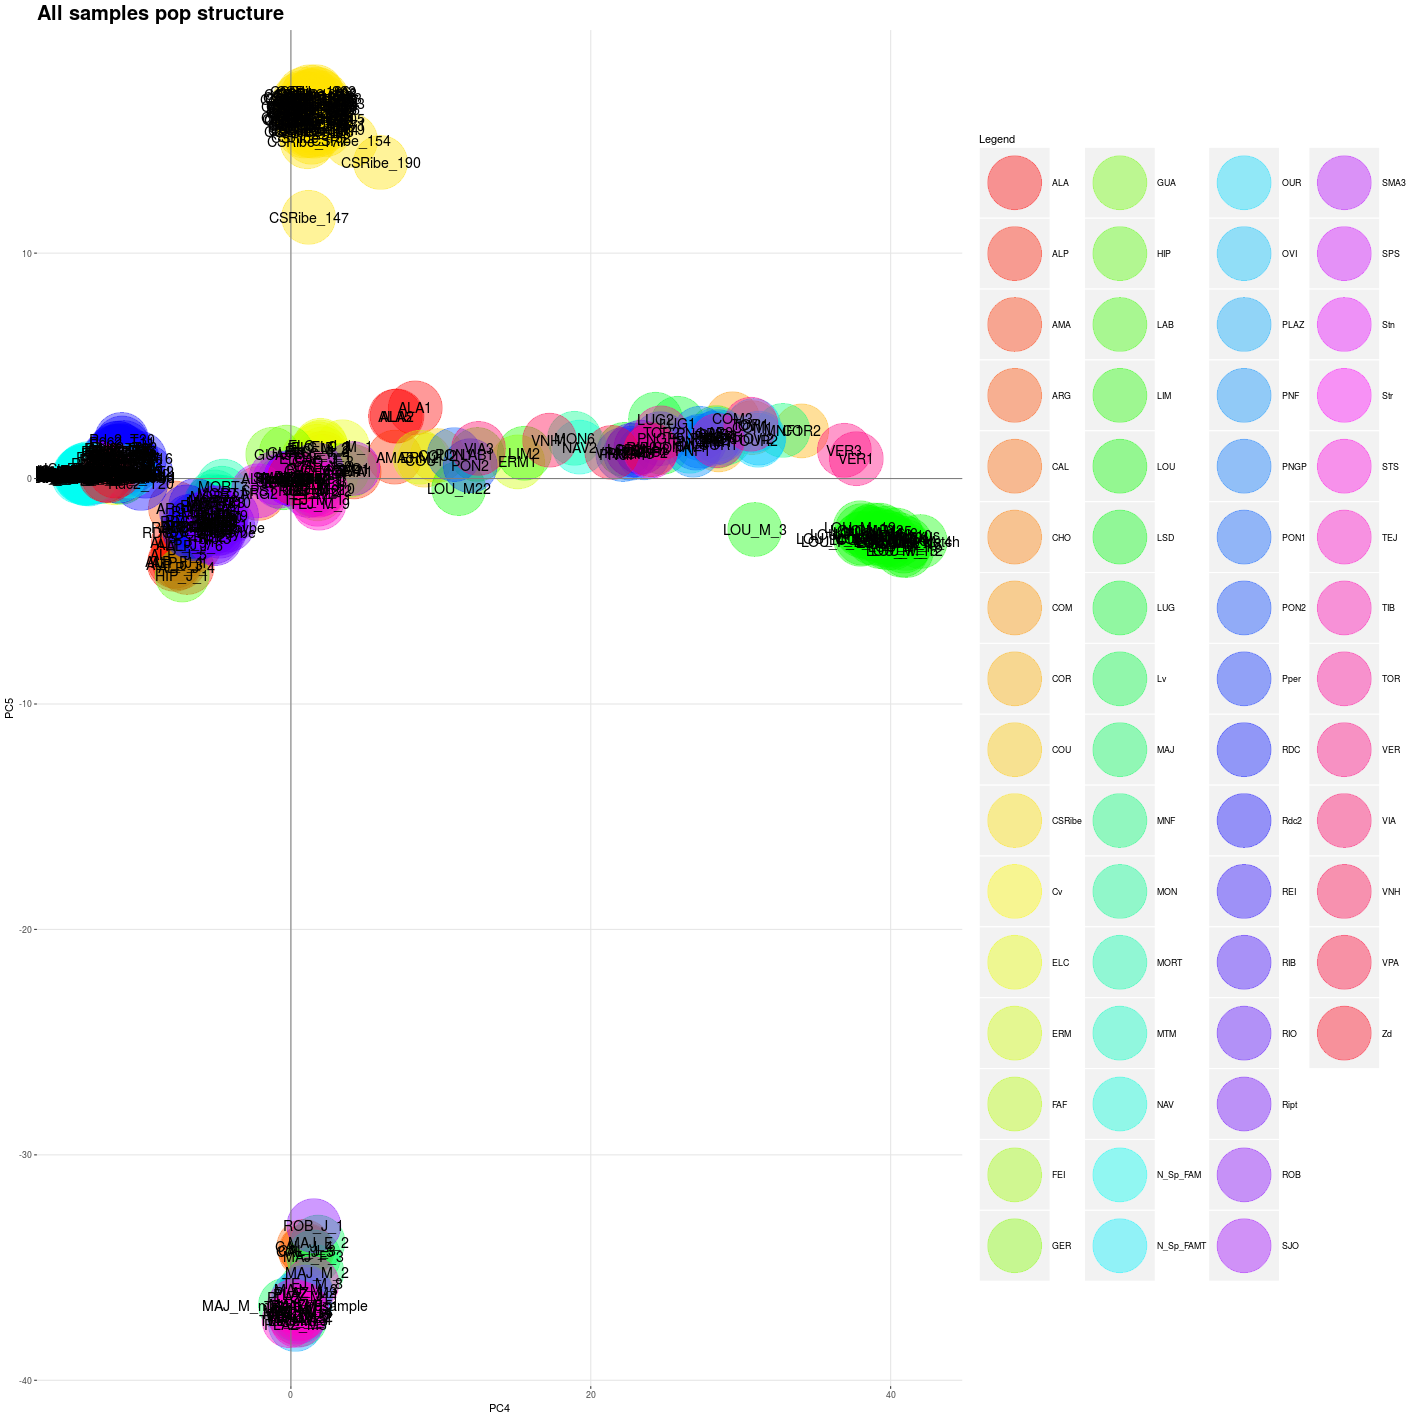

In [9]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(4,5), ## which components to plot
           Title = "All samples pop structure", ## plot title
           xtitle = "PC4", ## X axis title
           ytitle = "PC5", ## Y axis title 
           Palette = rainbow(61), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

In [24]:
%%R
pca1$eig

  [1] 7.388665e+02 1.666338e+02 7.875432e+01 2.160042e+01 1.347391e+01
  [6] 9.506743e+00 8.447280e+00 7.736277e+00 7.039319e+00 6.881359e+00
 [11] 6.706478e+00 6.491283e+00 5.978965e+00 5.760545e+00 5.632851e+00
 [16] 5.616834e+00 5.512141e+00 5.469819e+00 5.441061e+00 5.398763e+00
 [21] 5.353832e+00 5.300557e+00 5.242115e+00 5.196396e+00 5.140852e+00
 [26] 5.113317e+00 5.077596e+00 5.064553e+00 5.011186e+00 4.947723e+00
 [31] 4.937045e+00 4.920352e+00 4.897884e+00 4.868705e+00 4.841235e+00
 [36] 4.812441e+00 4.797792e+00 4.779620e+00 4.762391e+00 4.737385e+00
 [41] 4.699202e+00 4.667073e+00 4.653758e+00 4.625844e+00 4.586371e+00
 [46] 4.552187e+00 4.534359e+00 4.491672e+00 4.464498e+00 4.443966e+00
 [51] 4.434809e+00 4.420165e+00 4.371815e+00 4.366539e+00 4.338208e+00
 [56] 4.321046e+00 4.295482e+00 4.247292e+00 4.236965e+00 4.217533e+00
 [61] 4.193145e+00 4.180212e+00 4.124209e+00 4.108183e+00 4.052873e+00
 [66] 4.033350e+00 4.027772e+00 3.994954e+00 3.978642e+00 3.964366e+00
 [71] 